In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, XGBRegressor
import xgboost

c:\users\jhkim6\pycharmprojects\gc\venv\lib\site-packages\xgboost\compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression

In [4]:
from joblib import dump, load

In [5]:
import json

In [6]:
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family': 'Malgun Gothic'})
import sklearn

# 마이너스 부호 깨짐 현상 해결
matplotlib.rcParams['axes.unicode_minus'] = False

In [7]:
# row 출력제한 해제
pd.set_option('display.max_row', 500)

# column 출력제한 해제
pd.set_option('display.max_columns', 100)

In [8]:
from impyute.imputation.cs import mice
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [9]:
from impyute.imputation.cs import mice, fast_knn

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
from itertools import product
from scipy.stats import gaussian_kde
from scipy import stats

In [12]:
# import keras
# from keras import layers
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.callbacks import EarlyStopping

In [13]:
# import torch 
# from torch import nn,optim
# from torch.utils.data import DataLoader, Dataset
# import torch.nn.functional as F

# Data Load

In [14]:
with open('../input/DM_건강검진결과_토탈_피봇241014.json', encoding='utf-8') as f:
    js = json.loads(f.read())
raw = pd.DataFrame(js)

In [15]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227553 entries, 0 to 1227552
Columns: 136 entries, 검진년도 to 심장주위지방CT
dtypes: int64(4), object(132)
memory usage: 1.2+ GB


In [16]:
raw.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', 'BRDT', '검진당시나이', 'CU_INF_CONT',
       'ETL_REG_DTM', '백혈구(WBC)', '공복시혈당(FBS)',
       ...
       'Cortisol(스트레스호르몬)', '성장관련인자(IGF1)', 'Testosterone(테스토스테론)',
       '에스트라디올(Estradiol)', 'FSH(난포자극호르몬)', 'NK세포활성도검사', 'P(인)',
       '류마티스인자 (RA Factor)', '심장칼슘CT', '심장주위지방CT'],
      dtype='object', length=136)

## config 설정

In [17]:
# scaling_bool = True
scaling_bool = False

In [18]:
sample_len = 2000

In [19]:
XGB_bool = True
pyTorch_bool = False

In [20]:
# 높을수록 False, 낮을수록 True
# target_cols_direction = [False, True, True, True, True, True,]
# target_cols_direction = [False, True, True,]
# target_cols_direction = [False, True, True, True, True, True, 
#                          True, True,] # NLR, EBM
target_cols_direction = ['center', 
                         'center', 'center',] # NLR, EBM

In [21]:
target_cols_ratio = [4, 4, 2, ]

In [22]:
target_cols_kde = ['백혈구(WBC)_kde', 'NLR_kde', 'EBM_kde',]

In [23]:
csv_path = './output/면역기능_면역세포생성기능.csv'

In [24]:
model_path_man = './model/0201_man.pkl'

In [25]:
model_path_woman = './model/0201_woman.pkl'

## 연령대 제한

In [26]:
len(raw)

1227553

In [27]:
raw = raw[(raw['검진당시나이'] >= 20) & (raw['검진당시나이'] < 70)]
raw.reset_index(drop=True, inplace=True)

In [28]:
len(raw)

1213899

In [29]:
# df = raw.drop(['CU_INF_CONT', 'BRDT', 'ETL_REG_DTM', '검진완료일자',                           
#                # text
#                '심전도', '아질산염 (Nitrite)',
#                '갑상선초음파 (Thyroid Sono)', '위내시경 (Endo)', '상복부초음파 (Abdominal Sono)', '대장내시경',
#                '흉부X-선 (Chest PA)', '골밀도검사(BMD)', '경동맥초음파 (Carotid Sono)', '요추 CT', '뇌 CT', '동맥경화검사', '경추 CT',
#                '심장초음파 (Echocardio Sono)', '뇌MRI', '뇌MRA', '골밀도검사(허리)', '골밀도검사 (T-Score)', 
#                '위암혈액검사(Pepsinogen I)', 'Gastrin(가스트린)', 'Helicobactor pylori IgG(혈액)', 
#                'Helicobactor Pylori IgM(혈액)', '심장칼슘CT', '심장주위지방CT',
#               ], axis=1)

In [30]:
cols = ['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이',
#                '체중', '신장', '허리둘레', # 기본신체정보
                '백혈구(WBC)', '림프구 (Lymphocyte)', '분획호중구 (Seg Neutroph)', '호산구 (Eosinophil)',
                '단핵구 (Monocyte)', '호염기구 (Basophil)'
               ]

df = raw[cols]

In [31]:
df.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,백혈구(WBC),림프구 (Lymphocyte),분획호중구 (Seg Neutroph),호산구 (Eosinophil),단핵구 (Monocyte),호염기구 (Basophil)
0,2010,7282,2520,1,42,6.56,46.5,42,1.1,9.9,0.5
1,2010,7490,3638,1,39,6.5,41,48,3,8,0
2,2010,7915,3997,1,36,5.14,22.8,68.3,2.1,6.2,0.6
3,2010,8056,4745,1,42,7.0,39,50,3,8,0
4,2010,8457,3929,1,38,7.01,46.2,45.3,2.4,6,0.1


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 11 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   검진년도                  1213899 non-null  object
 1   UID                   1213899 non-null  int64 
 2   CU_REC_ID             1213899 non-null  int64 
 3   SEX                   1213899 non-null  int64 
 4   검진당시나이                1213899 non-null  int64 
 5   백혈구(WBC)              1055721 non-null  object
 6   림프구 (Lymphocyte)      1026299 non-null  object
 7   분획호중구 (Seg Neutroph)  833780 non-null   object
 8   호산구 (Eosinophil)      1017102 non-null  object
 9   단핵구 (Monocyte)        1018786 non-null  object
 10  호염기구 (Basophil)       1004106 non-null  object
dtypes: int64(4), object(7)
memory usage: 101.9+ MB


In [33]:
df.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '백혈구(WBC)',
       '림프구 (Lymphocyte)', '분획호중구 (Seg Neutroph)', '호산구 (Eosinophil)',
       '단핵구 (Monocyte)', '호염기구 (Basophil)'],
      dtype='object')

In [34]:
# df.columns = ['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '체중', '신장', '허리둘레', '체질량지수', 
#              '갑상선자극호르몬', 'Free T4'
#              ]

In [35]:
df.describe()

,UID,CU_REC_ID,SEX,검진당시나이
count,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06
mean,5.086762e+05,1.491305e+06,1.369421e+00,4.074524e+01
std,3.652092e+05,7.933459e+05,4.826483e-01,8.917396e+00
min,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01
25%,2.212800e+05,6.799645e+05,1.000000e+00,3.400000e+01
50%,3.806200e+05,1.409842e+06,1.000000e+00,4.000000e+01
75%,8.361275e+05,2.173650e+06,2.000000e+00,4.800000e+01
max,1.473645e+06,2.871445e+06,2.000000e+00,6.900000e+01


## 그룹별 결측값을 대체, 종합검진과 공단검진 차이(누락)에 대한 대체

In [36]:
df.isnull().sum()

검진년도                         0
UID                          0
CU_REC_ID                    0
SEX                          0
검진당시나이                       0
백혈구(WBC)                158178
림프구 (Lymphocyte)        187600
분획호중구 (Seg Neutroph)    380119
호산구 (Eosinophil)        196797
단핵구 (Monocyte)          195113
호염기구 (Basophil)         209793
dtype: int64

In [37]:
df_group = df.groupby(['UID', '검진년도'])

In [38]:
temp = df.columns.to_list()
for idx in ['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이']:
    temp.remove(idx)

In [39]:
temp

['백혈구(WBC)',
 '림프구 (Lymphocyte)',
 '분획호중구 (Seg Neutroph)',
 '호산구 (Eosinophil)',
 '단핵구 (Monocyte)',
 '호염기구 (Basophil)']

In [40]:
import time
start = time.time()
for col in temp:
    print('column :', col)
    df[col] = df_group[col].transform(lambda x: x.interpolate('nearest').ffill().bfill())
end = time.time()
print(f"{end - start:.5f} sec")

column : 백혈구(WBC)
column : 림프구 (Lymphocyte)
column : 분획호중구 (Seg Neutroph)
column : 호산구 (Eosinophil)
column : 단핵구 (Monocyte)
column : 호염기구 (Basophil)
3408.49175 sec


In [41]:
df.isnull().sum()

검진년도                         0
UID                          0
CU_REC_ID                    0
SEX                          0
검진당시나이                       0
백혈구(WBC)                 96592
림프구 (Lymphocyte)        127383
분획호중구 (Seg Neutroph)    327314
호산구 (Eosinophil)        137069
단핵구 (Monocyte)          135275
호염기구 (Basophil)         151198
dtype: int64

## nemeric으로 치환 못하는 수치들 결측치로 변환

In [42]:
numeric_col = df.columns

In [43]:
df[numeric_col] = df[numeric_col].apply(pd.to_numeric, errors='coerce')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 11 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   검진년도                  1213899 non-null  int64  
 1   UID                   1213899 non-null  int64  
 2   CU_REC_ID             1213899 non-null  int64  
 3   SEX                   1213899 non-null  int64  
 4   검진당시나이                1213899 non-null  int64  
 5   백혈구(WBC)              1114257 non-null  float64
 6   림프구 (Lymphocyte)      1084766 non-null  float64
 7   분획호중구 (Seg Neutroph)  883969 non-null   float64
 8   호산구 (Eosinophil)      1075133 non-null  float64
 9   단핵구 (Monocyte)        1076836 non-null  float64
 10  호염기구 (Basophil)       1061163 non-null  float64
dtypes: float64(6), int64(5)
memory usage: 101.9 MB


In [45]:
df.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,백혈구(WBC),림프구 (Lymphocyte),분획호중구 (Seg Neutroph),호산구 (Eosinophil),단핵구 (Monocyte),호염기구 (Basophil)
count,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06,1.114257e+06,1.084766e+06,8.839690e+05,1.075133e+06,1.076836e+06,1.061163e+06
mean,2.021881e+03,5.086762e+05,1.491305e+06,1.369421e+00,4.074524e+01,2.265106e+02,-1.944670e+03,-2.373501e+03,-1.990529e+03,-1.986676e+03,-2.022427e+03
std,1.696427e+00,3.652092e+05,7.933459e+05,4.826483e-01,8.917396e+00,1.140601e+03,2.061241e+06,2.283381e+06,2.070455e+06,2.068817e+06,2.084039e+06
min,2.010000e+03,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01,0.000000e+00,-2.146826e+09,-2.146826e+09,-2.146826e+09,-2.146826e+09,-2.146826e+09
25%,2.021000e+03,2.212800e+05,6.799645e+05,1.000000e+00,3.400000e+01,4.800000e+00,2.930000e+01,4.960000e+01,1.400000e+00,5.800000e+00,4.000000e-01
50%,2.022000e+03,3.806200e+05,1.409842e+06,1.000000e+00,4.000000e+01,5.680000e+00,3.430000e+01,5.500000e+01,2.300000e+00,6.900000e+00,6.000000e-01
75%,2.023000e+03,8.361275e+05,2.173650e+06,2.000000e+00,4.800000e+01,6.800000e+00,3.940000e+01,6.060000e+01,3.900000e+00,8.000000e+00,9.000000e-01
max,2.024000e+03,1.473645e+06,2.871445e+06,2.000000e+00,6.900000e+01,2.134000e+04,2.738000e+03,3.964000e+03,3.759400e+03,6.770000e+02,1.940000e+02


In [46]:
df_result = df.copy()

# 이상치 제거

In [47]:
len(df_result)

1213899

In [48]:
# IQR 기준 이상치 확인하는 함수
def findOutliers_column(x, column):
    q1 = x[column].quantile(0.25)
    q3 = x[column].quantile(0.75)
    iqr = q3 - q1
    threshold = 1.5
    minimum = q1 - (iqr * threshold)
    maximum = q3 + (iqr * threshold)
    print('minimum :', minimum, 'maximum :', maximum)
    y = x[(x[column] > maximum) | (x[column] < minimum)]
#     y = x[(x[column] <= maximum) & (x[column] >= minimum)]
#     print(y.info())
#     print(y.index)
    return y, minimum, maximum

def findOutliers_column_out(x, column, minimum, maximum):
    y = x[(x[column] > maximum) | (x[column] < minimum)]
    return y
    
# IQR 기준 이상치 확인하는 함수
def findOutliers(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    threshold = 1.5
    minimum = q1 - (iqr * threshold)
    maximum = q3 + (iqr * threshold)
    print(minimum)
    y = x[(x > maximum) | (x < minimum)]
#     return len(y)
    return y

## 이상치 컬럼 min, max 확인 및 drop

In [49]:
temp = df.columns.to_list()
for idx in ['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이']:
    temp.remove(idx)

In [50]:
# IQR 기준 이상치 개수 확인
# target_cols = [
#                '검진당시나이', 
# #                '체중', '신장', '허리둘레', '체질량지수(BMI)', #기본신체정보
#                'AST(SGOT)', 'ALT(SGPT)', 'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)', # 해독기능
#                '총빌리루빈', '직접빌리루빈', '간접빌리루빈', # 배설기능
#                ]
target_cols = temp

minimums = []
maximums = []

for col in target_cols:
    target_outlier, temp_min, temp_max = findOutliers_column(df_result, col)
    print(col, ':', len(df_result[col]),"/ IQR outliers: ", len(target_outlier), '/ ratio :', len(target_outlier)/len(df_result[col]))
    print()
    minimums.append(temp_min)
    maximums.append(temp_max)

for idx, col in enumerate(target_cols):    
    target_outlier = findOutliers_column_out(df_result, col, minimums[idx], maximums[idx])
    df_result = df_result.drop(target_outlier.index)
    df_result.reset_index(drop=True, inplace=True)

minimum : 1.7999999999999998 maximum : 9.8
백혈구(WBC) : 1213899 / IQR outliers:  63615 / ratio : 0.052405513144009506

minimum : 14.150000000000004 maximum : 54.55
림프구 (Lymphocyte) : 1213899 / IQR outliers:  13681 / ratio : 0.011270295139875723

minimum : 33.1 maximum : 77.1
분획호중구 (Seg Neutroph) : 1213899 / IQR outliers:  11979 / ratio : 0.00986820155548361

minimum : -2.35 maximum : 7.65
호산구 (Eosinophil) : 1213899 / IQR outliers:  70791 / ratio : 0.058317042851176254

minimum : 2.4999999999999996 maximum : 11.3
단핵구 (Monocyte) : 1213899 / IQR outliers:  20374 / ratio : 0.016783933424444702

minimum : -0.35 maximum : 1.65
호염기구 (Basophil) : 1213899 / IQR outliers:  15327 / ratio : 0.01262625638541592



In [51]:
target_cols

['백혈구(WBC)',
 '림프구 (Lymphocyte)',
 '분획호중구 (Seg Neutroph)',
 '호산구 (Eosinophil)',
 '단핵구 (Monocyte)',
 '호염기구 (Basophil)']

In [52]:
target_cols_org = target_cols

In [53]:
minimums

[1.7999999999999998,
 14.150000000000004,
 33.1,
 -2.35,
 2.4999999999999996,
 -0.35]

In [54]:
maximums

[9.8, 54.55, 77.1, 7.65, 11.3, 1.65]

In [55]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042462 entries, 0 to 1042461
Data columns (total 11 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   검진년도                  1042462 non-null  int64  
 1   UID                   1042462 non-null  int64  
 2   CU_REC_ID             1042462 non-null  int64  
 3   SEX                   1042462 non-null  int64  
 4   검진당시나이                1042462 non-null  int64  
 5   백혈구(WBC)              943864 non-null   float64
 6   림프구 (Lymphocyte)      921201 non-null   float64
 7   분획호중구 (Seg Neutroph)  771689 non-null   float64
 8   호산구 (Eosinophil)      915736 non-null   float64
 9   단핵구 (Monocyte)        918197 non-null   float64
 10  호염기구 (Basophil)       903453 non-null   float64
dtypes: float64(6), int64(5)
memory usage: 87.5 MB


In [56]:
df_result.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,백혈구(WBC),림프구 (Lymphocyte),분획호중구 (Seg Neutroph),호산구 (Eosinophil),단핵구 (Monocyte),호염기구 (Basophil)
0,2010,7282,2520,1,42,6.56,46.5,42.0,1.1,9.9,0.5
1,2010,7490,3638,1,39,6.50,41.0,48.0,3.0,8.0,0.0
2,2010,7915,3997,1,36,5.14,22.8,68.3,2.1,6.2,0.6
3,2010,8056,4745,1,42,7.00,39.0,50.0,3.0,8.0,0.0
4,2010,8457,3929,1,38,7.01,46.2,45.3,2.4,6.0,0.1


In [57]:
len(df_result)

1042462

In [58]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042462 entries, 0 to 1042461
Data columns (total 11 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   검진년도                  1042462 non-null  int64  
 1   UID                   1042462 non-null  int64  
 2   CU_REC_ID             1042462 non-null  int64  
 3   SEX                   1042462 non-null  int64  
 4   검진당시나이                1042462 non-null  int64  
 5   백혈구(WBC)              943864 non-null   float64
 6   림프구 (Lymphocyte)      921201 non-null   float64
 7   분획호중구 (Seg Neutroph)  771689 non-null   float64
 8   호산구 (Eosinophil)      915736 non-null   float64
 9   단핵구 (Monocyte)        918197 non-null   float64
 10  호염기구 (Basophil)       903453 non-null   float64
dtypes: float64(6), int64(5)
memory usage: 87.5 MB


In [59]:
df_result.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,백혈구(WBC),림프구 (Lymphocyte),분획호중구 (Seg Neutroph),호산구 (Eosinophil),단핵구 (Monocyte),호염기구 (Basophil)
count,1.042462e+06,1.042462e+06,1.042462e+06,1.042462e+06,1.042462e+06,943864.000000,921201.000000,771689.000000,915736.000000,918197.000000,903453.000000
mean,2.021874e+03,5.128111e+05,1.505810e+06,1.373354e+00,4.065090e+01,5.729676,34.617311,55.293100,2.569488,6.882869,0.624434
std,1.722024e+00,3.682685e+05,7.963278e+05,4.836951e-01,8.938344e+00,1.330606,7.139903,7.694775,1.569830,1.572816,0.342125
min,2.010000e+03,3.200000e+01,1.540000e+02,1.000000e+00,2.000000e+01,1.800000,14.200000,33.100000,0.000000,2.500000,0.000000
25%,2.021000e+03,2.219010e+05,6.828522e+05,1.000000e+00,3.400000e+01,4.780000,29.700000,50.000000,1.400000,5.800000,0.400000
50%,2.022000e+03,3.823290e+05,1.469242e+06,1.000000e+00,4.000000e+01,5.600000,34.500000,55.200000,2.200000,6.800000,0.600000
75%,2.023000e+03,8.414630e+05,2.188498e+06,2.000000e+00,4.800000e+01,6.550000,39.500000,60.500000,3.400000,8.000000,0.900000
max,2.024000e+03,1.473645e+06,2.871445e+06,2.000000e+00,6.900000e+01,9.800000,54.500000,77.100000,7.650000,11.300000,1.650000


# 변수 생성

## NLR

In [60]:
df_result['NLR'] = df_result['분획호중구 (Seg Neutroph)'] / df_result['림프구 (Lymphocyte)']

In [61]:
df_result['NLR'] = df_result['NLR'].round(2)

## EBM

In [62]:
df_result['EBM'] = df_result['호산구 (Eosinophil)'] + df_result['단핵구 (Monocyte)'] + df_result['호염기구 (Basophil)']

In [63]:
df_result['EBM'] = df_result['EBM'].round(2)

# 스크리닝

## 백혈구(WBC)  스크리닝

In [64]:
screening = 10

In [65]:
scr_col = '백혈구(WBC)'

In [66]:
df_result[df_result[scr_col] > screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,백혈구(WBC),림프구 (Lymphocyte),분획호중구 (Seg Neutroph),호산구 (Eosinophil),단핵구 (Monocyte),호염기구 (Basophil),NLR,EBM


In [67]:
len(df_result[df_result[scr_col] > screening])

0

In [68]:
df_result.loc[df_result[scr_col] > screening, scr_col] = screening

In [69]:
df_result[df_result[scr_col] > screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,백혈구(WBC),림프구 (Lymphocyte),분획호중구 (Seg Neutroph),호산구 (Eosinophil),단핵구 (Monocyte),호염기구 (Basophil),NLR,EBM


In [70]:
len(df_result[df_result[scr_col] > screening])

0

# target (건강지수) 계산

In [71]:
len(df_result)

1042462

## Linear Regression coefficient 계산

In [72]:
def LR_coef(df):
    df_ = df.copy()
#     df_.reset_index(drop=True, inplace=True)
    df_.fillna(df_.mean().round(2), inplace=True)
    print(len(df_))
    
    df_temp = pd.DataFrame()

    for age in range(df_['검진당시나이'].min(), df_['검진당시나이'].max()):
        temp_ = df_[df_['검진당시나이'] == age].sample(n = sample_len, replace=True)
        df_temp = pd.concat([df_temp, temp_])
        
    X_train, X_test, y_train, y_test = train_test_split(df_temp[target_cols], df_temp['검진당시나이'], test_size=0.25, random_state=87)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    print('r2_score :',r2_score(y_test, y_pred))
    print('MAE :',mean_absolute_error(y_test, y_pred))
    print('model.coef_ :',model.coef_)
    print('model.intercept_ :',model.intercept_)
    
    df_['target_org'] = (model.coef_[0] * df_[target_cols[0]]) 
    + (model.coef_[1] * df_[target_cols[1]]) 
    + (model.coef_[2] * df_[target_cols[2]]) 
    + (model.coef_[3] * df_[target_cols[3]]) 
    + (model.coef_[4] * df_[target_cols[4]]) 
    + (model.coef_[5] * df_[target_cols[5]]) 
    + (model.coef_[6] * df_[target_cols[6]])
    + (model.coef_[7] * df_[target_cols[7]])
    
    df_['target'] = ((df_['target_org'] - df_['target_org'].min()) / (df_['target_org'].max() - df_['target_org'].min()))
        
    print('min :', df_['target_org'].min())
    print('max :', df_['target_org'].max())
    
    df_['target'] = (df_['target'] * 100) + 50
    
    df['target'] = df_['target']
    
    return df

In [73]:
# target_cols

In [74]:
# df_man = df_result[df_result['SEX'] == 1]
# df_man = LR_coef(df_man)

In [75]:
# df_man[df_man['target'].isna()]

In [76]:
# df_woman = df_result[df_result['SEX'] == 2]
# df_woman = LR_coef(df_woman)

In [77]:
# df_target = pd.concat([df_man, df_woman])

In [78]:
# len(df_target)

In [79]:
# df_target.dropna(subset=target_cols, how='all', inplace=True)
# df_target.reset_index(drop=True, inplace=True)

In [80]:
# len(df_target)

In [81]:
# df_target[df_target['target'].isna()]

In [82]:
# df_target.info()

In [83]:
# df_target.head()

In [84]:
# df_target['target'] = np.round(df_target['target'])
# df_target['target'] = df_target['target'].astype(int)

In [85]:
# len(df_target)

In [86]:
# df_target.describe()

In [87]:
# df_target[df_target['target'] == 50]

In [88]:
# df_target[df_target['target'] == 150]

## target (건강지수) 컬럼들간 mean으로 계산

In [89]:
# df_target = pd.DataFrame()

# for age in range(int(df_result['검진당시나이'].min()), int(df_result['검진당시나이'].max()) + 1):
# # for age in range(int(df_result['검진당시나이'].min()), 21):
    
#     df_cols = pd.DataFrame()
#     for col in target_cols:
#         df_temp = df_result[df_result['검진당시나이'] == age].copy()
#         df_temp['target_' + col] = ((df_temp[col] - df_temp[col].min()) / (df_temp[col].max() - df_temp[col].min()))
# #         print(age, df_temp[col].min(), df_temp[col].max(), df_temp[col].mean())
#         temp = df_temp['target_' + col].copy()
#         df_cols = pd.concat([df_cols, temp], axis=1)
    
#     df_cols['target'] = np.round(df_cols.mean(axis='columns') * 100) + 50
# #     df_target = pd.concat([df_target,pd.concat([df_result[df_result['검진당시나이'] == age].copy(), df_cols], axis=1)])
    
#     df_age = pd.concat([df_result[df_result['검진당시나이'] == age].copy(), df_cols['target']], axis=1)        
    
#     df_target = pd.concat([df_target, df_age])
    
# df_target.reset_index(drop=True, inplace=True)
# df_target.dropna(subset=['target'], inplace=True)
# df_target['target'] = df_target['target'].astype(int)

In [90]:
# len(df_target)

In [91]:
# df_target.head()

In [92]:
# df_target.info()

## gaussian_kde

<AxesSubplot:>

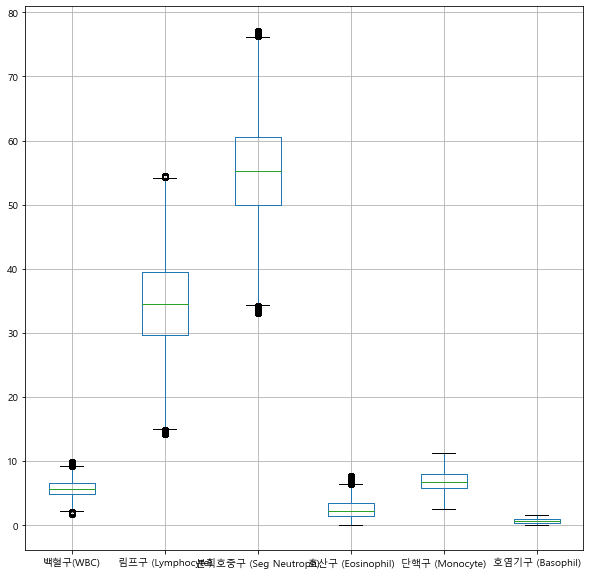

In [93]:
plt.rcParams["figure.figsize"] = (10, 10)
df_result.boxplot(column=target_cols)

In [94]:
df_result.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,백혈구(WBC),림프구 (Lymphocyte),분획호중구 (Seg Neutroph),호산구 (Eosinophil),단핵구 (Monocyte),호염기구 (Basophil),NLR,EBM
0,2010,7282,2520,1,42,6.56,46.5,42.0,1.1,9.9,0.5,0.90,11.5
1,2010,7490,3638,1,39,6.50,41.0,48.0,3.0,8.0,0.0,1.17,11.0
2,2010,7915,3997,1,36,5.14,22.8,68.3,2.1,6.2,0.6,3.00,8.9
3,2010,8056,4745,1,42,7.00,39.0,50.0,3.0,8.0,0.0,1.28,11.0
4,2010,8457,3929,1,38,7.01,46.2,45.3,2.4,6.0,0.1,0.98,8.5


In [95]:
target_cols

['백혈구(WBC)',
 '림프구 (Lymphocyte)',
 '분획호중구 (Seg Neutroph)',
 '호산구 (Eosinophil)',
 '단핵구 (Monocyte)',
 '호염기구 (Basophil)']

In [96]:
len(target_cols)

6

In [97]:
target_cols_temp = []

In [98]:
target_cols_temp.append(target_cols[0]) # 백혈구(WBC)
target_cols_temp.append('NLR')
target_cols_temp.append('EBM')

In [99]:
target_cols = target_cols_temp

In [100]:
target_cols

['백혈구(WBC)', 'NLR', 'EBM']

<AxesSubplot:>

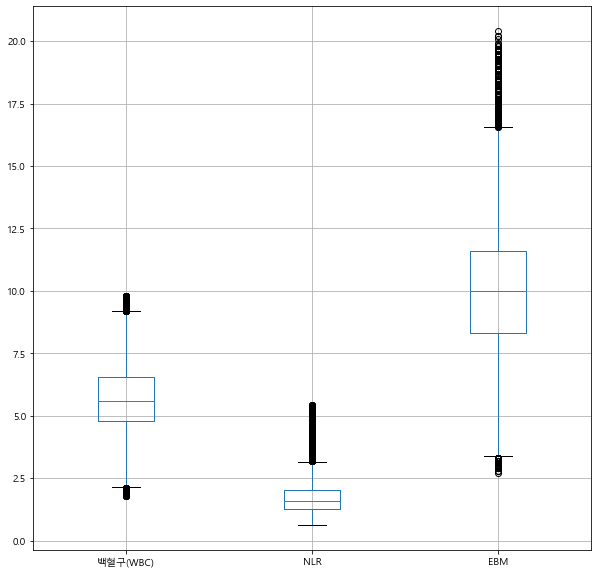

In [101]:
plt.rcParams["figure.figsize"] = (10, 10)
df_result.boxplot(column=target_cols)

In [102]:
target_cols_direction

['center', 'center', 'center']

In [103]:
def kde_col(df, cols):
    
    threshold = 100
    max_threshold = 150
    
    df_target = pd.DataFrame() # return DF
    
    # 연령대별로 sample_len개 샘플링
    tmp_data = df.groupby(['SEX', '검진당시나이']).apply(
        lambda x: x.sample(sample_len, replace=True, random_state=42))

    tmp_data.reset_index(drop=True, inplace=True)
    
    # 성연령별 모델 생성
    for sex, age in product([1, 2], range(df['검진당시나이'].min(), df['검진당시나이'].max() + 1)):    
        tmp_data2 = tmp_data[tmp_data['SEX'] == sex]
        tmp_data3 = tmp_data2[tmp_data2['검진당시나이'] == age]
        
        df_temp = df[df['SEX'] == sex]
        df_temp = df_temp[df_temp['검진당시나이'] == age]
        df_temp.reset_index(drop=True, inplace=True)
            
        df_age = pd.DataFrame()
        
        for index, col in enumerate(cols):
        
            input_data = tmp_data3[col].copy()
            
            # 결측치가 많을 때 평균을 넣게 되면 평균쪽으로 쏠림
#             try:
#                 input_data.fillna(input_data.mean().round(0), inplace=True)
#             except:                
#                 input_data.fillna(tmp_data2[col].mean().round(0), inplace=True)

            input_data.dropna(inplace = True)
                
            input_data = input_data.sort_values()
            
            if len(input_data.value_counts()) > 1:
                # kde 모델
                kde = gaussian_kde(input_data)
                result = kde(input_data)
                max_value = result.max()            

                df_col = df_temp[col].copy()
                df_col.fillna(df_col.mean().round(0), inplace=True)

                # 방향성이 있을 경우
                max_idx = result.argmax()  # 최대값의 인덱스
                std_value = input_data.iloc[max_idx] # 인덱스 최대값의 밸류값

                '''
                display print
                '''
#                 print('')
#                 print('@@ col :',col)
#                 plt.rcParams["figure.figsize"] = (5, 5)
#                 print('sex :',sex)
#                 print('age :',age)
#                 fig = plt.figure()
#                 ax = fig.add_subplot(111)
#                 x_eval = np.linspace(50, 140, num=200)
#                 ax.plot(input_data, result, 'k-')                
#                 plt.show()
#                 print('max_value: ',max_value)
#                 print('std_value: ',std_value)

                arr = []

                temp = pd.DataFrame(kde(df_col), columns=['kde'])

                if target_cols_direction[index]:
                    # center right
                    temp['trigger'] = (df_col >= std_value)
                elif target_cols_direction[index] == False:
                    # center left
                    temp['trigger'] = (df_col < std_value)

                if target_cols_direction[index] != 'center':
                    temp['output'] = [(temp['kde'].iloc[idx] / max_value) * threshold if trigger else (1 + (1 - (temp['kde'].iloc[idx] / max_value))) * threshold
                                      for idx, trigger in temp['trigger'].iteritems()]
                else:                
                    temp['output'] = [(temp['kde'].iloc[idx] / max_value) * (threshold * 1.5) for idx, value in temp['kde'].iteritems()]

    #             temp['gap'] = abs(temp['output'] - threshold)            
    #             a = 11
    #             temp['adjusted_gap'] = [np.log(temp['gap'].iloc[idx]) * a if gap> np.e else gap for idx, gap in temp['gap'].iteritems()]            
    #             temp[col + '_kde'] = [threshold - temp['adjusted_gap'].iloc[idx] if trigger else threshold + temp['adjusted_gap'].iloc[idx] for idx, trigger in temp['trigger'].iteritems()]

                temp[col + '_kde'] = temp['output']
                temp[col + '_kde'] = temp[col + '_kde'].round(2)
            else:
                temp[col + '_kde'] = threshold
            
            df_age = pd.concat([df_age, temp[col + '_kde']], axis=1)

        df_temp = pd.concat([df_temp, df_age], axis=1)
        df_target = pd.concat([df_target, df_temp])
        df_target.reset_index(drop=True, inplace=True)
    
    # Null 이면 100
    for col in target_cols:
        for idx in df_target[col][df_target[col].isnull()].index:        
            df_target.loc[idx, col + '_kde'] = threshold
            
    df_target['kde_mean'] = df_target.iloc[:, (5+len(cols)):(5+len(cols)+len(cols))].mean('columns').round(2)
    
#     for col in target_cols:
#         df_target.drop([col + '_kde'], axis = 1, inplace = True)
    
    df_target.sort_values(by='CU_REC_ID', inplace=True)
    
    return df_target

In [104]:
import time
start = time.time()
df_target = kde_col(df_result, target_cols)
end = time.time()
print(f"{end - start:.5f} sec")

519.58691 sec


## 검진 항목 별 가중치 

In [105]:
df_target.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,백혈구(WBC),림프구 (Lymphocyte),분획호중구 (Seg Neutroph),호산구 (Eosinophil),단핵구 (Monocyte),호염기구 (Basophil),NLR,EBM,백혈구(WBC)_kde,NLR_kde,EBM_kde,kde_mean
543666,2010,585711,154,1,52,5.10,34.8,56.1,1.6,7.1,0.4,1.61,9.1,149.51,140.73,135.10,3.03
458132,2010,593983,156,1,48,7.10,28.7,60.5,3.2,7.0,0.6,2.11,10.8,70.68,71.93,148.46,3.60
251190,2010,612330,185,1,39,4.93,44.0,NaN,1.6,6.9,0.2,NaN,8.7,141.66,100.00,127.57,2.90
22603,2010,645901,212,1,28,4.82,47.9,NaN,4.4,7.1,0.6,NaN,12.1,131.23,100.00,101.79,4.03
690908,2010,710490,213,2,28,5.36,43.3,NaN,0.9,5.8,0.4,NaN,7.1,146.92,100.00,104.68,2.37


In [106]:
target_cols_kde

['백혈구(WBC)_kde', 'NLR_kde', 'EBM_kde']

In [107]:
target_cols_ratio

[4, 4, 2]

In [108]:
sum(target_cols_ratio)

10

In [109]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1042462 entries, 543666 to 153966
Data columns (total 17 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   검진년도                  1042462 non-null  int64  
 1   UID                   1042462 non-null  int64  
 2   CU_REC_ID             1042462 non-null  int64  
 3   SEX                   1042462 non-null  int64  
 4   검진당시나이                1042462 non-null  int64  
 5   백혈구(WBC)              943864 non-null   float64
 6   림프구 (Lymphocyte)      921201 non-null   float64
 7   분획호중구 (Seg Neutroph)  771689 non-null   float64
 8   호산구 (Eosinophil)      915736 non-null   float64
 9   단핵구 (Monocyte)        918197 non-null   float64
 10  호염기구 (Basophil)       903453 non-null   float64
 11  NLR                   769616 non-null   float64
 12  EBM                   893456 non-null   float64
 13  백혈구(WBC)_kde          1042462 non-null  float64
 14  NLR_kde               1042462 

In [110]:
df_target['kde_mean'] = (
      (target_cols_ratio[0] * df_target[target_cols_kde[0]])
    + (target_cols_ratio[1] * df_target[target_cols_kde[1]])
    + (target_cols_ratio[2] * df_target[target_cols_kde[2]])      
) / sum(target_cols_ratio)

In [111]:
df_target['kde_mean'] = np.round(df_target['kde_mean'], 2)

In [112]:
df_target['kde_mean'].min()

2.76

In [113]:
df_target['kde_mean'].max()

150.0

In [114]:
df_target.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,백혈구(WBC),림프구 (Lymphocyte),분획호중구 (Seg Neutroph),호산구 (Eosinophil),단핵구 (Monocyte),호염기구 (Basophil),NLR,EBM,백혈구(WBC)_kde,NLR_kde,EBM_kde,kde_mean
count,1.042462e+06,1.042462e+06,1.042462e+06,1.042462e+06,1.042462e+06,943864.000000,921201.000000,771689.000000,915736.000000,918197.000000,903453.000000,769616.000000,893456.000000,1.042462e+06,1.042462e+06,1.042462e+06,1.042462e+06
mean,2.021874e+03,5.128111e+05,1.505810e+06,1.373354e+00,4.065090e+01,5.729676,34.617311,55.293100,2.569488,6.882869,0.624434,1.724096,10.070328,1.049553e+02,1.021217e+02,1.061126e+02,1.040533e+02
std,1.722024e+00,3.682685e+05,7.963278e+05,4.836951e-01,8.938344e+00,1.330606,7.139903,7.694775,1.569830,1.572816,0.342125,0.644780,2.399730,3.929043e+01,3.699675e+01,3.759355e+01,2.464466e+01
min,2.010000e+03,3.200000e+01,1.540000e+02,1.000000e+00,2.000000e+01,1.800000,14.200000,33.100000,0.000000,2.500000,0.000000,0.610000,2.700000,0.000000e+00,0.000000e+00,0.000000e+00,2.760000e+00
25%,2.021000e+03,2.219010e+05,6.828522e+05,1.000000e+00,3.400000e+01,4.780000,29.700000,50.000000,1.400000,5.800000,0.400000,1.270000,8.300000,8.173000e+01,9.006000e+01,8.894000e+01,9.093000e+01
50%,2.022000e+03,3.823290e+05,1.469242e+06,1.000000e+00,4.000000e+01,5.600000,34.500000,55.200000,2.200000,6.800000,0.600000,1.600000,10.000000,1.109300e+02,1.000000e+02,1.091200e+02,1.048700e+02
75%,2.023000e+03,8.414630e+05,2.188498e+06,2.000000e+00,4.800000e+01,6.550000,39.500000,60.500000,3.400000,8.000000,0.900000,2.030000,11.600000,1.402000e+02,1.338100e+02,1.394700e+02,1.221600e+02
max,2.024000e+03,1.473645e+06,2.871445e+06,2.000000e+00,6.900000e+01,9.800000,54.500000,77.100000,7.650000,11.300000,1.650000,5.420000,20.400000,1.500000e+02,1.500000e+02,1.500500e+02,1.500000e+02


<AxesSubplot:>

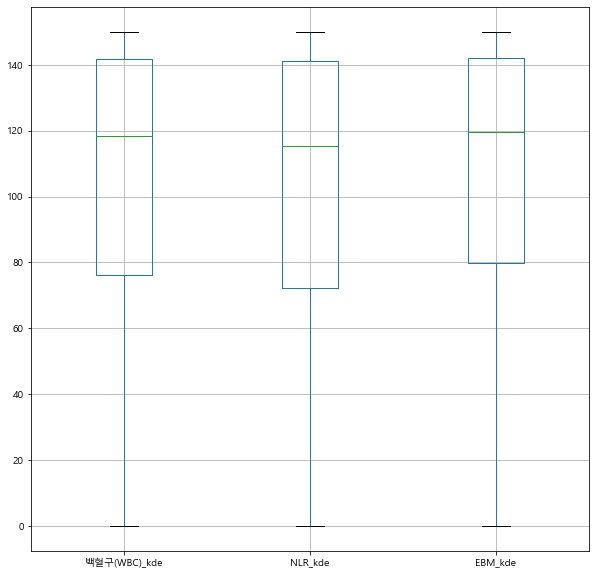

In [115]:
plt.rcParams["figure.figsize"] = (10, 10)
df_boxplot = df_target.copy()
df_boxplot.replace(100, np.NaN, inplace=True)
df_boxplot.boxplot(column=                   
                   ['백혈구(WBC)_kde', 'NLR_kde', 'EBM_kde'],
                  )

<AxesSubplot:>

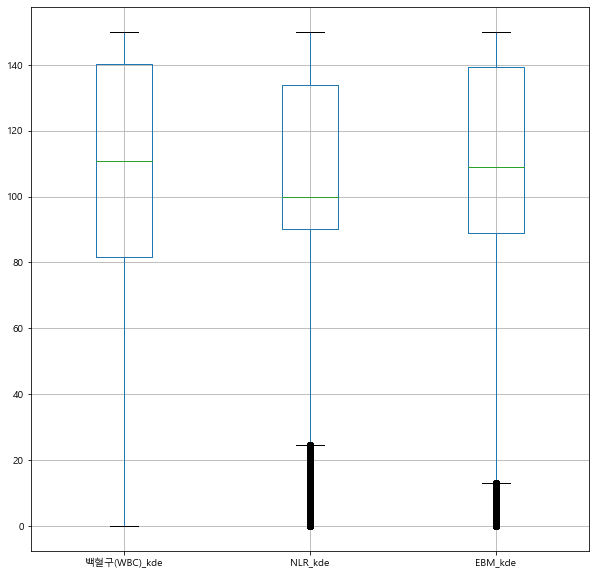

In [116]:
plt.rcParams["figure.figsize"] = (10, 10)
df_boxplot = df_target.copy()
# df_boxplot.replace(100, np.NaN, inplace=True)
df_boxplot.boxplot(column=                   
                   ['백혈구(WBC)_kde', 'NLR_kde', 'EBM_kde'],
                  )

## target Scaling

In [117]:
# df_target['target'] = ((df_target['kde_mean'] - df_target['kde_mean'].min()) / (df_target['kde_mean'].max() - df_target['kde_mean'].min()))
df_target['target'] = ((df_target['kde_mean'] - 0) / (200 - 0))

In [118]:
df_target['target'] = (df_target['target'] * 100) + 50

In [119]:
df_target['target'] = df_target['target'].round(0)

In [120]:
df_target['target'].value_counts().reset_index().sort_values('index')

,index,target
74,51.0,4
73,52.0,7
72,53.0,32
71,54.0,99
70,55.0,157
69,56.0,231
68,57.0,288
67,58.0,353
66,59.0,511
65,60.0,588


In [121]:
df_target.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,백혈구(WBC),림프구 (Lymphocyte),분획호중구 (Seg Neutroph),호산구 (Eosinophil),단핵구 (Monocyte),호염기구 (Basophil),NLR,EBM,백혈구(WBC)_kde,NLR_kde,EBM_kde,kde_mean,target
count,1.042462e+06,1.042462e+06,1.042462e+06,1.042462e+06,1.042462e+06,943864.000000,921201.000000,771689.000000,915736.000000,918197.000000,903453.000000,769616.000000,893456.000000,1.042462e+06,1.042462e+06,1.042462e+06,1.042462e+06,1.042462e+06
mean,2.021874e+03,5.128111e+05,1.505810e+06,1.373354e+00,4.065090e+01,5.729676,34.617311,55.293100,2.569488,6.882869,0.624434,1.724096,10.070328,1.049553e+02,1.021217e+02,1.061126e+02,1.040533e+02,1.020274e+02
std,1.722024e+00,3.682685e+05,7.963278e+05,4.836951e-01,8.938344e+00,1.330606,7.139903,7.694775,1.569830,1.572816,0.342125,0.644780,2.399730,3.929043e+01,3.699675e+01,3.759355e+01,2.464466e+01,1.232566e+01
min,2.010000e+03,3.200000e+01,1.540000e+02,1.000000e+00,2.000000e+01,1.800000,14.200000,33.100000,0.000000,2.500000,0.000000,0.610000,2.700000,0.000000e+00,0.000000e+00,0.000000e+00,2.760000e+00,5.100000e+01
25%,2.021000e+03,2.219010e+05,6.828522e+05,1.000000e+00,3.400000e+01,4.780000,29.700000,50.000000,1.400000,5.800000,0.400000,1.270000,8.300000,8.173000e+01,9.006000e+01,8.894000e+01,9.093000e+01,9.500000e+01
50%,2.022000e+03,3.823290e+05,1.469242e+06,1.000000e+00,4.000000e+01,5.600000,34.500000,55.200000,2.200000,6.800000,0.600000,1.600000,10.000000,1.109300e+02,1.000000e+02,1.091200e+02,1.048700e+02,1.020000e+02
75%,2.023000e+03,8.414630e+05,2.188498e+06,2.000000e+00,4.800000e+01,6.550000,39.500000,60.500000,3.400000,8.000000,0.900000,2.030000,11.600000,1.402000e+02,1.338100e+02,1.394700e+02,1.221600e+02,1.110000e+02
max,2.024000e+03,1.473645e+06,2.871445e+06,2.000000e+00,6.900000e+01,9.800000,54.500000,77.100000,7.650000,11.300000,1.650000,5.420000,20.400000,1.500000e+02,1.500000e+02,1.500500e+02,1.500000e+02,1.250000e+02


<AxesSubplot:>

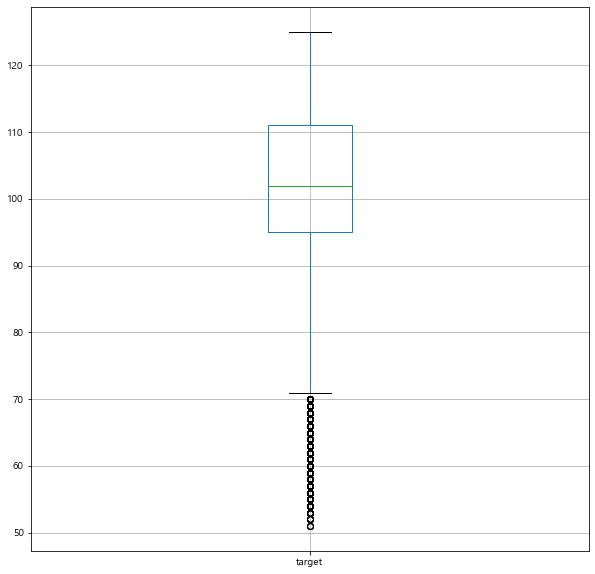

In [122]:
plt.rcParams["figure.figsize"] = (10, 10)
df_boxplot = df_target.copy()
# df_boxplot.replace(100, np.NaN, inplace=True)
df_boxplot.boxplot(column=['target'])

<AxesSubplot:>

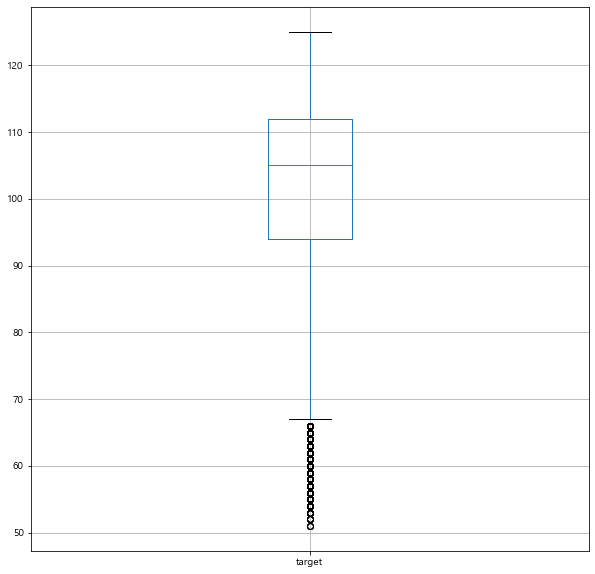

In [123]:
plt.rcParams["figure.figsize"] = (10, 10)
df_boxplot = df_target.copy()
df_boxplot.replace(100, np.NaN, inplace=True)
df_boxplot.boxplot(column=['target'])

<AxesSubplot:>

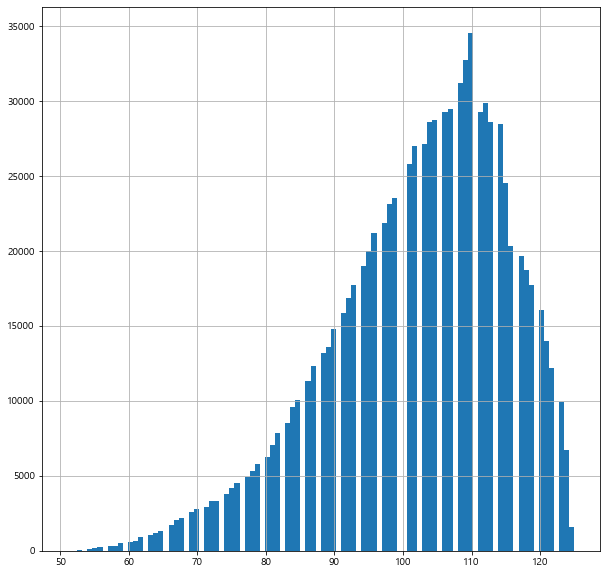

In [124]:
df_boxplot['target'].hist(bins=100)

<AxesSubplot:>

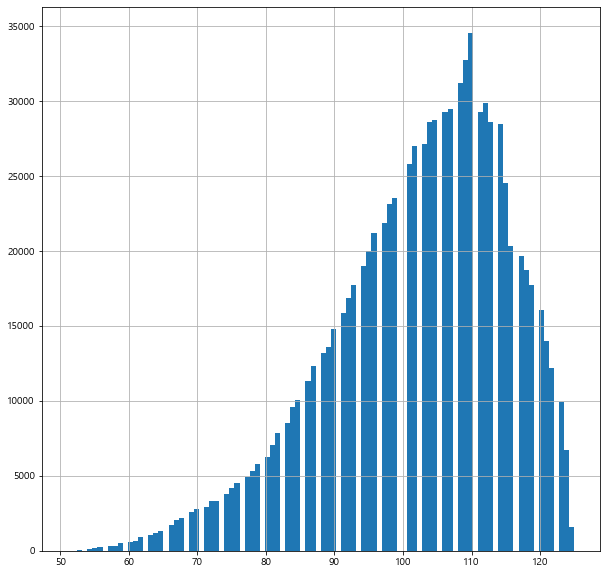

In [125]:
df_boxplot['target'].hist(bins=100)

## target 계산 결과

<AxesSubplot:xlabel='검진당시나이'>

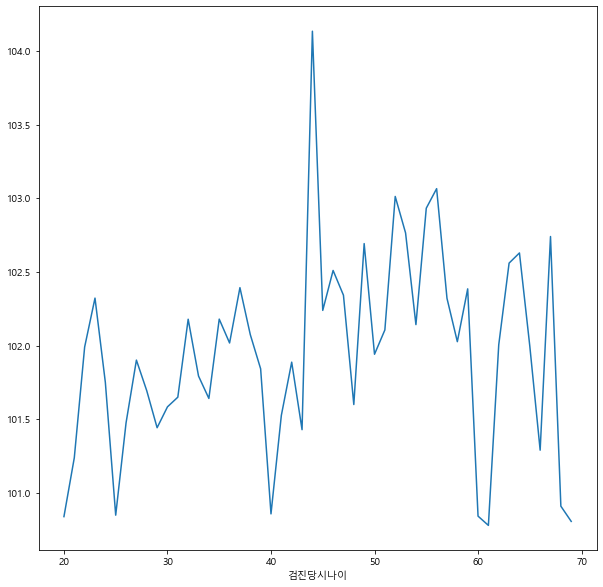

In [126]:
plt.rcParams["figure.figsize"] = (10, 10)
df_target.groupby('검진당시나이').mean()['target'].plot()

<AxesSubplot:xlabel='검진당시나이'>

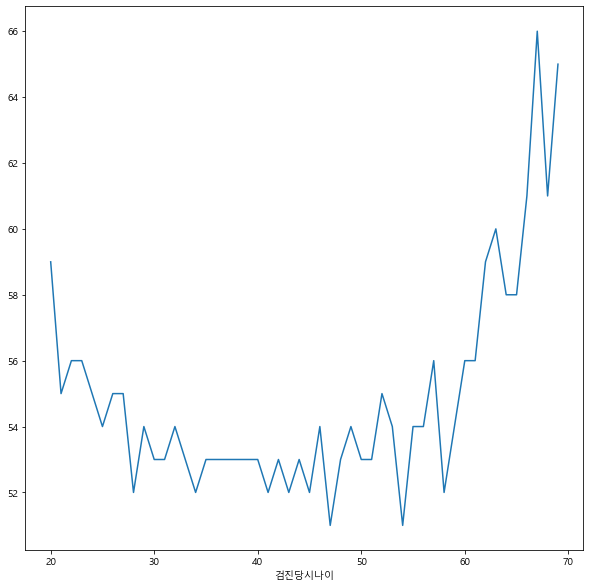

In [127]:
plt.rcParams["figure.figsize"] = (10, 10)
df_target.groupby('검진당시나이').min()['target'].plot()

<AxesSubplot:xlabel='검진당시나이'>

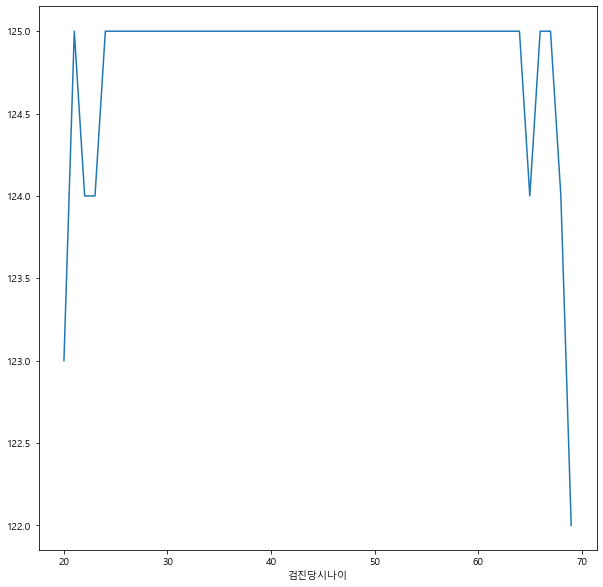

In [128]:
plt.rcParams["figure.figsize"] = (10, 10)
df_target.groupby('검진당시나이').max()['target'].plot()

In [129]:
df_target.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,백혈구(WBC),림프구 (Lymphocyte),분획호중구 (Seg Neutroph),호산구 (Eosinophil),단핵구 (Monocyte),호염기구 (Basophil),NLR,EBM,백혈구(WBC)_kde,NLR_kde,EBM_kde,kde_mean,target
543666,2010,585711,154,1,52,5.10,34.8,56.1,1.6,7.1,0.4,1.61,9.1,149.51,140.73,135.10,143.12,122.0
458132,2010,593983,156,1,48,7.10,28.7,60.5,3.2,7.0,0.6,2.11,10.8,70.68,71.93,148.46,86.74,93.0
251190,2010,612330,185,1,39,4.93,44.0,NaN,1.6,6.9,0.2,NaN,8.7,141.66,100.00,127.57,122.18,111.0
22603,2010,645901,212,1,28,4.82,47.9,NaN,4.4,7.1,0.6,NaN,12.1,131.23,100.00,101.79,112.85,106.0
690908,2010,710490,213,2,28,5.36,43.3,NaN,0.9,5.8,0.4,NaN,7.1,146.92,100.00,104.68,119.70,110.0


# 결측행 제거

In [130]:
# df_result.dropna(axis=0).info()

In [131]:
# df_result.dropna(axis=0, inplace=True)

# 남성 모델

In [132]:
df_target['SEX'].value_counts()

1    653255
2    389207
Name: SEX, dtype: int64

In [133]:
df_man = df_target[df_target['SEX'] == 1]
len(df_man)

653255

In [134]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,백혈구(WBC),림프구 (Lymphocyte),분획호중구 (Seg Neutroph),호산구 (Eosinophil),단핵구 (Monocyte),호염기구 (Basophil),NLR,EBM,백혈구(WBC)_kde,NLR_kde,EBM_kde,kde_mean,target
543666,2010,585711,154,1,52,5.10,34.8,56.1,1.6,7.1,0.4,1.61,9.1,149.51,140.73,135.10,143.12,122.0
458132,2010,593983,156,1,48,7.10,28.7,60.5,3.2,7.0,0.6,2.11,10.8,70.68,71.93,148.46,86.74,93.0
251190,2010,612330,185,1,39,4.93,44.0,NaN,1.6,6.9,0.2,NaN,8.7,141.66,100.00,127.57,122.18,111.0
22603,2010,645901,212,1,28,4.82,47.9,NaN,4.4,7.1,0.6,NaN,12.1,131.23,100.00,101.79,112.85,106.0
398557,2010,491012,226,1,45,5.28,47.2,NaN,0.9,8.3,0.4,NaN,9.6,148.53,100.00,150.00,129.41,115.0


# 결측치 처리

## 결측치 삭제

In [135]:
# df_man.dropna(inplace=True)

In [136]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,백혈구(WBC),림프구 (Lymphocyte),분획호중구 (Seg Neutroph),호산구 (Eosinophil),단핵구 (Monocyte),호염기구 (Basophil),NLR,EBM,백혈구(WBC)_kde,NLR_kde,EBM_kde,kde_mean,target
543666,2010,585711,154,1,52,5.10,34.8,56.1,1.6,7.1,0.4,1.61,9.1,149.51,140.73,135.10,143.12,122.0
458132,2010,593983,156,1,48,7.10,28.7,60.5,3.2,7.0,0.6,2.11,10.8,70.68,71.93,148.46,86.74,93.0
251190,2010,612330,185,1,39,4.93,44.0,NaN,1.6,6.9,0.2,NaN,8.7,141.66,100.00,127.57,122.18,111.0
22603,2010,645901,212,1,28,4.82,47.9,NaN,4.4,7.1,0.6,NaN,12.1,131.23,100.00,101.79,112.85,106.0
398557,2010,491012,226,1,45,5.28,47.2,NaN,0.9,8.3,0.4,NaN,9.6,148.53,100.00,150.00,129.41,115.0


## 결측치 평균으로 대체

In [137]:
# 결측치를 평균으로 대체 하는 함수
fill_mean_func = lambda g: g.fillna(g.mean().round(2))

In [138]:
# 나이로 group by, 결측치를 평균으로 대체
# df_man = df_man.groupby('검진당시나이').apply(fill_mean_func)

## 검진 항목 all 결측치 지우기

In [139]:
target_cols

['백혈구(WBC)', 'NLR', 'EBM']

In [140]:
len(df_man)

653255

In [141]:
df_man.dropna(subset=target_cols, how='all', inplace=True)

In [142]:
len(df_man)

595522

In [143]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,백혈구(WBC),림프구 (Lymphocyte),분획호중구 (Seg Neutroph),호산구 (Eosinophil),단핵구 (Monocyte),호염기구 (Basophil),NLR,EBM,백혈구(WBC)_kde,NLR_kde,EBM_kde,kde_mean,target
543666,2010,585711,154,1,52,5.10,34.8,56.1,1.6,7.1,0.4,1.61,9.1,149.51,140.73,135.10,143.12,122.0
458132,2010,593983,156,1,48,7.10,28.7,60.5,3.2,7.0,0.6,2.11,10.8,70.68,71.93,148.46,86.74,93.0
251190,2010,612330,185,1,39,4.93,44.0,NaN,1.6,6.9,0.2,NaN,8.7,141.66,100.00,127.57,122.18,111.0
22603,2010,645901,212,1,28,4.82,47.9,NaN,4.4,7.1,0.6,NaN,12.1,131.23,100.00,101.79,112.85,106.0
398557,2010,491012,226,1,45,5.28,47.2,NaN,0.9,8.3,0.4,NaN,9.6,148.53,100.00,150.00,129.41,115.0


## fillna

In [144]:
df_man.mean().round(2)

검진년도                       2022.00
UID                      514697.72
CU_REC_ID               1490240.93
SEX                           1.00
검진당시나이                       42.13
백혈구(WBC)                      5.86
림프구 (Lymphocyte)             34.82
분획호중구 (Seg Neutroph)         54.66
호산구 (Eosinophil)              2.76
단핵구 (Monocyte)                7.11
호염기구 (Basophil)               0.63
NLR                           1.69
EBM                          10.50
백혈구(WBC)_kde                105.50
NLR_kde                     102.59
EBM_kde                     107.12
kde_mean                    104.66
target                      102.33
dtype: float64

In [145]:
df_man.fillna(df_man.mean().round(2), inplace=True)

In [146]:
# df_man.fillna(0, inplace=True)

## IterativeImputer

In [147]:
# df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(df_target))
# df_impute.columns = df.columns
# df_target = df_impute

## MICE(Multivariate Imputation by Chained Equation) Imputation

In [148]:
# import time
# start = time.time()
# np_imputed = mice(df_man.values) # mice 학습시작
# df_man = pd.DataFrame(np_imputed)
# end = time.time()
# print(f"{end - start:.5f} sec")

# 중복 제거

In [149]:
len(df_man)

595522

In [150]:
# 동일한 검진년도에 중복건을 제외하기 위해서 sort value 한다음 중복시 첫 번째것만 남겨둠
df_man.sort_values(by=['UID', '검진년도', 'CU_REC_ID'], ascending=[True, True, False], inplace=True)

In [151]:
df_man.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,백혈구(WBC),림프구 (Lymphocyte),분획호중구 (Seg Neutroph),호산구 (Eosinophil),단핵구 (Monocyte),호염기구 (Basophil),NLR,EBM,백혈구(WBC)_kde,NLR_kde,EBM_kde,kde_mean,target
2126,2011,32,11757,1,24,5.20,34.5,58.40,1.5,5.3,0.30,1.69,7.1,122.80,148.04,39.73,116.28,108.0
599742,2021,50,642497,1,55,9.00,26.0,59.00,7.0,7.0,1.00,2.27,15.0,16.30,58.12,40.80,37.93,69.0
275452,2019,62,421626,1,40,6.17,43.4,47.90,3.2,4.9,0.60,1.10,8.7,115.27,105.64,136.08,115.58,108.0
305489,2020,62,565527,1,41,5.98,45.5,44.60,2.0,7.2,0.70,0.98,9.9,146.12,87.22,145.27,122.39,111.0
332905,2021,62,699357,1,42,5.13,47.0,41.40,5.5,5.5,0.60,0.88,11.6,147.13,58.35,123.59,106.91,103.0
388124,2023,62,2170394,1,44,5.80,42.8,46.00,5.6,4.8,0.80,1.07,11.2,149.77,118.46,129.37,133.17,117.0
550197,2022,76,1377275,1,52,6.07,35.0,57.00,2.0,5.0,1.00,1.63,8.0,128.57,138.79,95.88,126.12,113.0
550196,2022,76,1359161,1,52,6.07,35.0,57.00,2.0,5.0,1.00,1.63,8.0,128.57,138.79,95.88,126.12,113.0
71007,2024,77,2575587,1,30,5.23,29.0,62.00,2.0,7.0,0.00,2.14,9.0,147.43,68.96,136.26,113.81,107.0
630921,2022,79,1369378,1,58,5.27,34.0,58.00,3.0,5.0,0.00,1.71,8.0,148.59,120.93,102.33,128.27,114.0


In [152]:
len(df_man)

595522

In [153]:
df_man[target_cols]

,백혈구(WBC),NLR,EBM
2126,5.20,1.69,7.1
599742,9.00,2.27,15.0
275452,6.17,1.10,8.7
305489,5.98,0.98,9.9
332905,5.13,0.88,11.6
...,...,...,...
193349,7.34,1.42,12.5
651875,9.02,1.98,9.5
651874,9.02,1.98,9.5
47243,4.52,1.31,12.1


## first만 남겨두고 중복 제거

In [154]:
df_man = df_man.drop_duplicates(subset=['UID', '검진년도'], keep='first')

In [155]:
len(df_man)

505517

In [156]:
df_man.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,백혈구(WBC),림프구 (Lymphocyte),분획호중구 (Seg Neutroph),호산구 (Eosinophil),단핵구 (Monocyte),호염기구 (Basophil),NLR,EBM,백혈구(WBC)_kde,NLR_kde,EBM_kde,kde_mean,target
2126,2011,32,11757,1,24,5.20,34.5,58.40,1.5,5.3,0.30,1.69,7.1,122.80,148.04,39.73,116.28,108.0
599742,2021,50,642497,1,55,9.00,26.0,59.00,7.0,7.0,1.00,2.27,15.0,16.30,58.12,40.80,37.93,69.0
275452,2019,62,421626,1,40,6.17,43.4,47.90,3.2,4.9,0.60,1.10,8.7,115.27,105.64,136.08,115.58,108.0
305489,2020,62,565527,1,41,5.98,45.5,44.60,2.0,7.2,0.70,0.98,9.9,146.12,87.22,145.27,122.39,111.0
332905,2021,62,699357,1,42,5.13,47.0,41.40,5.5,5.5,0.60,0.88,11.6,147.13,58.35,123.59,106.91,103.0
388124,2023,62,2170394,1,44,5.80,42.8,46.00,5.6,4.8,0.80,1.07,11.2,149.77,118.46,129.37,133.17,117.0
550197,2022,76,1377275,1,52,6.07,35.0,57.00,2.0,5.0,1.00,1.63,8.0,128.57,138.79,95.88,126.12,113.0
71007,2024,77,2575587,1,30,5.23,29.0,62.00,2.0,7.0,0.00,2.14,9.0,147.43,68.96,136.26,113.81,107.0
630921,2022,79,1369378,1,58,5.27,34.0,58.00,3.0,5.0,0.00,1.71,8.0,148.59,120.93,102.33,128.27,114.0
639453,2023,79,2667016,1,59,4.98,36.0,59.00,1.0,4.0,0.00,1.64,5.0,143.20,140.48,9.03,115.28,108.0


In [157]:
df_man.reset_index(drop=True, inplace=True)

In [158]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,백혈구(WBC),림프구 (Lymphocyte),분획호중구 (Seg Neutroph),호산구 (Eosinophil),단핵구 (Monocyte),호염기구 (Basophil),NLR,EBM,백혈구(WBC)_kde,NLR_kde,EBM_kde,kde_mean,target
0,2011,32,11757,1,24,5.20,34.5,58.4,1.5,5.3,0.3,1.69,7.1,122.80,148.04,39.73,116.28,108.0
1,2021,50,642497,1,55,9.00,26.0,59.0,7.0,7.0,1.0,2.27,15.0,16.30,58.12,40.80,37.93,69.0
2,2019,62,421626,1,40,6.17,43.4,47.9,3.2,4.9,0.6,1.10,8.7,115.27,105.64,136.08,115.58,108.0
3,2020,62,565527,1,41,5.98,45.5,44.6,2.0,7.2,0.7,0.98,9.9,146.12,87.22,145.27,122.39,111.0
4,2021,62,699357,1,42,5.13,47.0,41.4,5.5,5.5,0.6,0.88,11.6,147.13,58.35,123.59,106.91,103.0


In [159]:
df_man.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505517 entries, 0 to 505516
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   검진년도                  505517 non-null  int64  
 1   UID                   505517 non-null  int64  
 2   CU_REC_ID             505517 non-null  int64  
 3   SEX                   505517 non-null  int64  
 4   검진당시나이                505517 non-null  int64  
 5   백혈구(WBC)              505517 non-null  float64
 6   림프구 (Lymphocyte)      505517 non-null  float64
 7   분획호중구 (Seg Neutroph)  505517 non-null  float64
 8   호산구 (Eosinophil)      505517 non-null  float64
 9   단핵구 (Monocyte)        505517 non-null  float64
 10  호염기구 (Basophil)       505517 non-null  float64
 11  NLR                   505517 non-null  float64
 12  EBM                   505517 non-null  float64
 13  백혈구(WBC)_kde          505517 non-null  float64
 14  NLR_kde               505517 non-null  float64
 15  

# 연령별 개수 현황(검진당시나이)

<AxesSubplot:xlabel='index'>

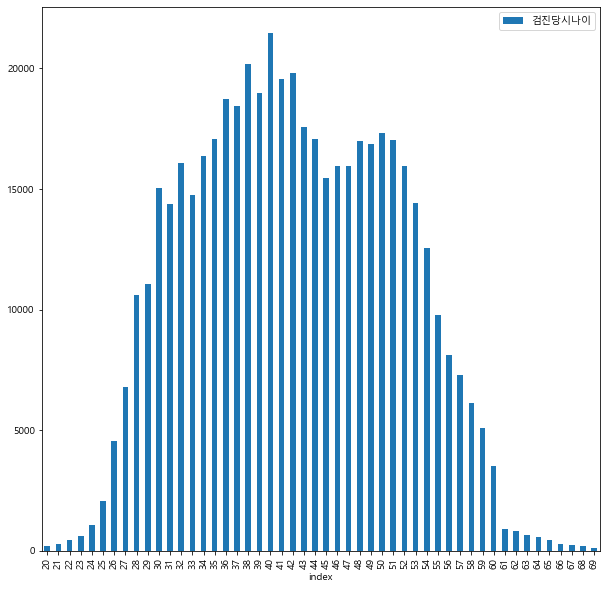

In [160]:
df_man['검진당시나이'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='검진당시나이')

In [161]:
df_man['검진당시나이'].value_counts().reset_index().sort_values('index')

,index,검진당시나이
47,20,190
45,21,255
42,22,440
40,23,587
36,24,1045
35,25,2055
33,26,4548
30,27,6805
26,28,10621
25,29,11046


# 검진항목 시각화

In [162]:
df_man.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,백혈구(WBC),림프구 (Lymphocyte),분획호중구 (Seg Neutroph),호산구 (Eosinophil),단핵구 (Monocyte),호염기구 (Basophil),NLR,EBM,백혈구(WBC)_kde,NLR_kde,EBM_kde,kde_mean,target
count,505517.000000,5.055170e+05,5.055170e+05,505517.0,505517.000000,505517.000000,505517.000000,505517.000000,505517.000000,505517.000000,505517.000000,505517.000000,505517.000000,505517.000000,505517.000000,505517.000000,505517.000000,505517.000000
mean,2021.950844,5.084628e+05,1.480420e+06,1.0,42.137170,5.856562,34.796255,54.660844,2.753470,7.102232,0.629504,1.689136,10.481070,105.424352,102.595327,107.117905,104.631452,102.316605
std,1.658397,3.629455e+05,8.193529e+05,0.0,8.828067,1.306195,6.889754,6.720616,1.564227,1.515140,0.333823,0.556434,2.282053,41.033853,38.704131,39.306526,25.504650,12.756237
min,2010.000000,3.200000e+01,1.540000e+02,1.0,20.000000,1.800000,14.200000,33.100000,0.000000,2.500000,0.000000,0.610000,2.700000,0.000000,0.000000,0.000000,2.760000,51.000000
25%,2021.000000,2.223730e+05,6.411440e+05,1.0,35.000000,4.900000,30.100000,50.900000,1.600000,6.000000,0.400000,1.330000,9.000000,76.420000,85.050000,83.480000,88.810000,94.000000
50%,2022.000000,3.813450e+05,1.390261e+06,1.0,42.000000,5.700000,34.820000,54.660000,2.500000,7.000000,0.600000,1.690000,10.500000,117.720000,100.000000,116.190000,108.280000,104.000000
75%,2023.000000,8.365870e+05,2.198471e+06,1.0,49.000000,6.670000,39.300000,58.400000,3.600000,8.000000,0.900000,1.870000,12.000000,141.780000,137.000000,141.340000,123.670000,112.000000
max,2024.000000,1.473599e+06,2.871357e+06,1.0,69.000000,9.800000,54.500000,77.100000,7.640000,11.300000,1.650000,5.410000,20.400000,150.000000,150.000000,150.050000,150.000000,125.000000


<AxesSubplot:xlabel='검진당시나이'>

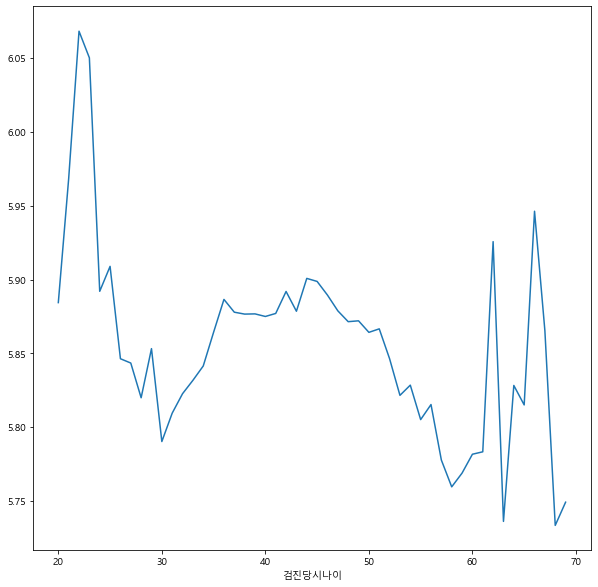

In [163]:
df_man.groupby('검진당시나이').mean()[target_cols[0]].plot()

<AxesSubplot:xlabel='검진당시나이'>

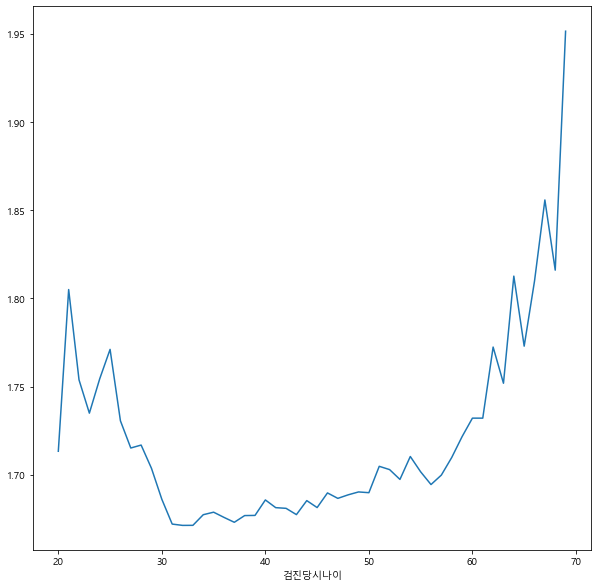

In [164]:
df_man.groupby('검진당시나이').mean()[target_cols[1]].plot()

<AxesSubplot:xlabel='검진당시나이'>

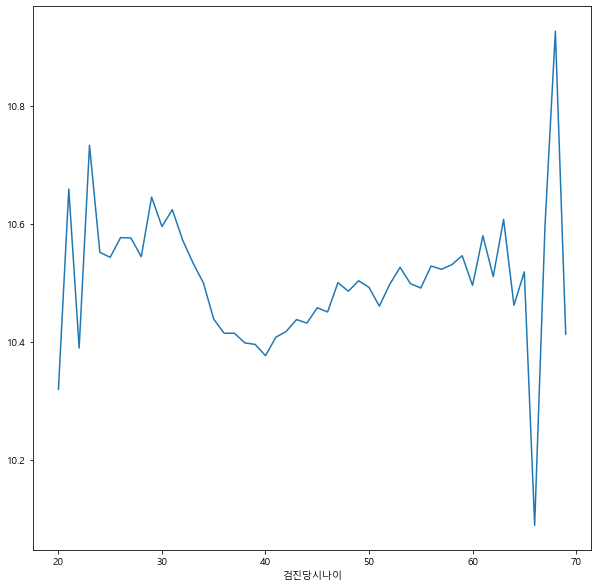

In [165]:
df_man.groupby('검진당시나이').mean()[target_cols[2]].plot()

<AxesSubplot:xlabel='검진당시나이', ylabel='target'>

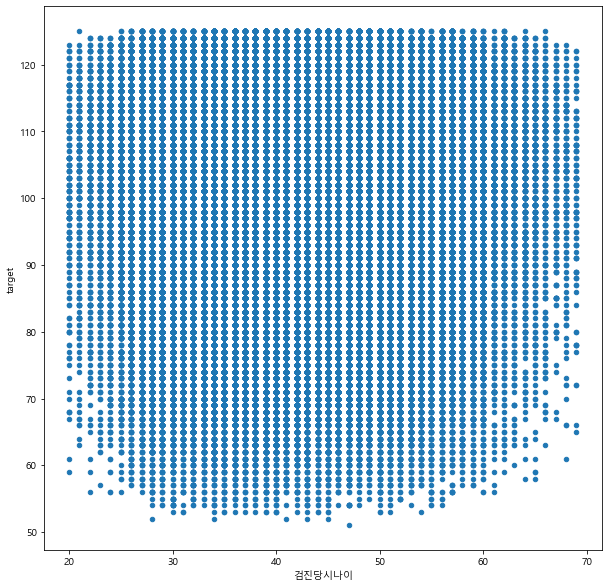

In [166]:
df_man.plot.scatter(x='검진당시나이', y='target')

# 건강지수 Sampling

<AxesSubplot:xlabel='index'>

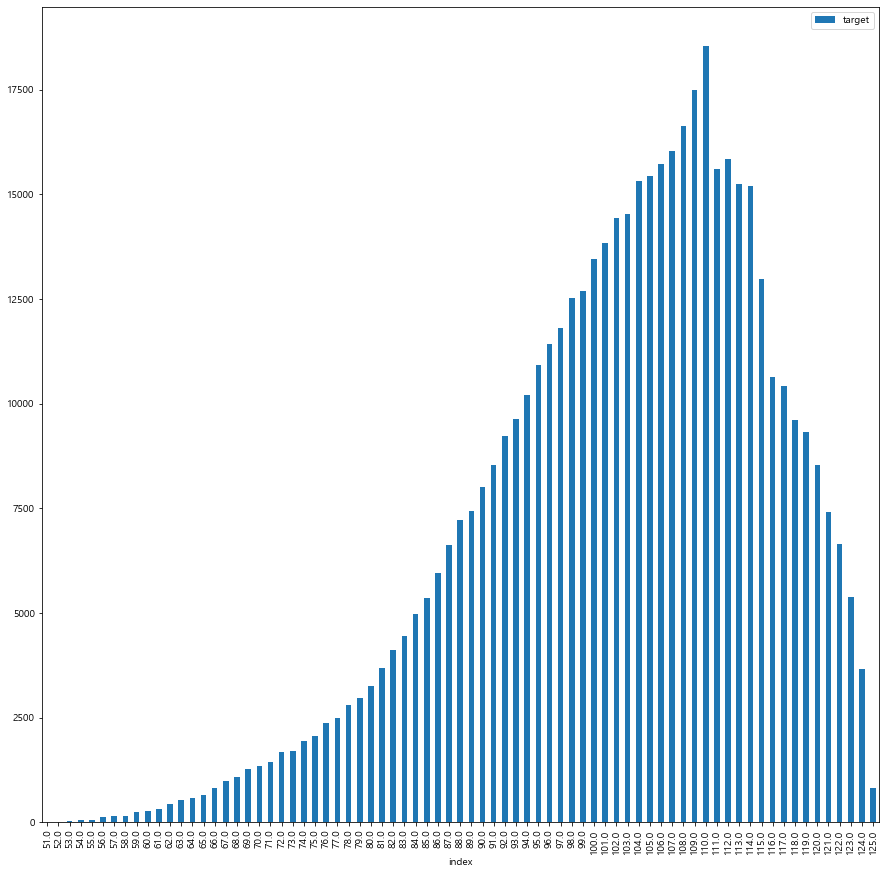

In [167]:
plt.rcParams["figure.figsize"] = (15, 15)
df_man['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [168]:
df_man['target'].value_counts().reset_index().sort_values('index')

,index,target
74,51.0,1
73,52.0,5
72,53.0,24
71,54.0,54
70,55.0,63
69,56.0,123
68,57.0,144
67,58.0,165
66,59.0,253
65,60.0,279


In [169]:
df_man_sampling = pd.DataFrame()

# for target in range(int(df_man['target'].min()), 100):
for target in range(50, 100):
    
#     print(target, 200 - target)
    left_len = len(df_man[df_man['target'] == target])
    right_len = len(df_man[df_man['target'] == (200 - target)])
    
#     print(target, left_len, right_len)
    
    if left_len >= right_len:
        if left_len > 0:
            df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == target].sample(left_len, replace=True, random_state=87)])
        if right_len > 0:
            df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == (200 - target)].sample(left_len, replace=True, random_state=87)])
    else:
        if left_len > 0:
            df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == target].sample(right_len, replace=True, random_state=87)])
        if right_len > 0:
            df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == (200 - target)].sample(right_len, replace=True, random_state=87)])   

df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == 100]])                    

In [170]:
# df_man = df_man_sampling.copy()

<AxesSubplot:xlabel='index'>

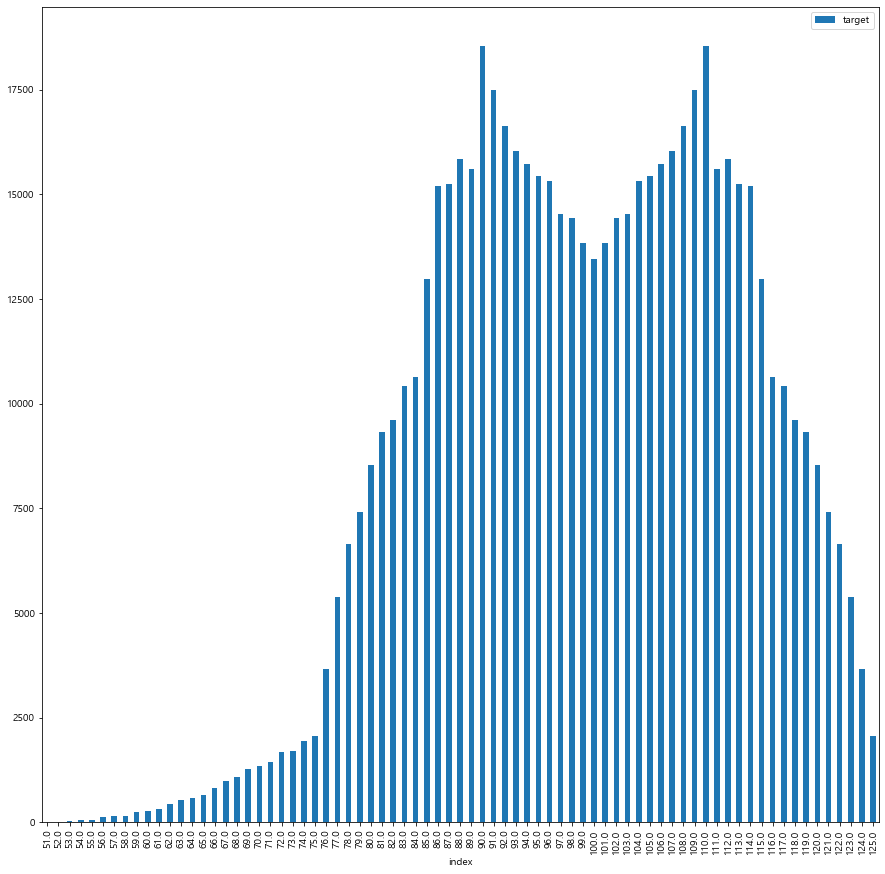

In [171]:
plt.rcParams["figure.figsize"] = (15, 15)
df_man_sampling['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [172]:
df_man_sampling['target'].value_counts().reset_index().sort_values('index')

,index,target
74,51.0,1
73,52.0,5
72,53.0,24
71,54.0,54
70,55.0,63
69,56.0,123
68,57.0,144
67,58.0,165
66,59.0,253
65,60.0,279


# 나이별 확인하기

In [173]:
# target = 'target'

In [174]:
# df_man_sample = None
                 
# for idx in range(int(df_man[target].min()), int(df_man[target].max() + 1)):    
#     if len(df_man[df_man[target] == idx]) > 0:
#         temp_ = df_man[df_man[target] == idx].sample(n = sample_len, replace=True)
# #     df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(temp))
# #     print(df_impute.columns)
# #     df_impute.columns = df_man.columns
    
# #     np_imputed = mice(temp.values)
# #     np_imputed = fast_knn(temp.values, k=5)
# #     df_impute = pd.DataFrame(np_immputed)
# #     temp = df_impute
    
#         df_man_sample = pd.concat([df_man_sample, temp_])

# df_man_sample.sample(frac=1).reset_index(drop=True, inplace=True)

In [175]:
# df_man = df_man_sample

In [176]:
# int(df_man['검진당시나이'].value_counts().mean())

In [177]:
# df_man['검진당시나이'].min()

In [178]:
# df_man['검진당시나이'].max()

In [179]:
# df_man.columns

In [180]:
# df_temp = None
# # sample_len = int(df_man['검진당시나이'].value_counts().mean())
# # sample_len = 1000
                 
# for age in range(df_man['검진당시나이'].min(), df_man['검진당시나이'].max()):
#     temp_ = df_man[df_man['검진당시나이'] == age].sample(n = sample_len, replace=True)
# #     df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(temp))
# #     print(df_impute.columns)
# #     df_impute.columns = df_man.columns
    
# #     np_imputed = mice(temp.values)
# #     np_imputed = fast_knn(temp.values, k=5)
# #     df_impute = pd.DataFrame(np_immputed)
# #     temp = df_impute
    
#     df_temp = pd.concat([df_temp, temp_])

In [181]:
# df_temp.info()

In [182]:
# df_temp.reset_index(drop=True, inplace=True)

In [183]:
# df_man = df_temp.copy()

In [184]:
# df_man['검진당시나이'].value_counts()

In [185]:
# df_man[df_man['검진당시나이']==38]

In [186]:
# df_man[df_man['검진당시나이']==38]['UID'].value_counts()

# model train

In [187]:
df_man.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '백혈구(WBC)',
       '림프구 (Lymphocyte)', '분획호중구 (Seg Neutroph)', '호산구 (Eosinophil)',
       '단핵구 (Monocyte)', '호염기구 (Basophil)', 'NLR', 'EBM', '백혈구(WBC)_kde',
       'NLR_kde', 'EBM_kde', 'kde_mean', 'target'],
      dtype='object')

In [188]:
# train_columns = [
# #                '체중', '신장', '허리둘레', '체질량지수(BMI)',
#                'AST(SGOT)', 'ALT(SGPT)', 'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)', # 해독기능
#                '총빌리루빈', '직접빌리루빈', '간접빌리루빈', # 배설기능
#                  ]

In [189]:
target_cols

['백혈구(WBC)', 'NLR', 'EBM']

In [190]:
train_columns = target_cols

In [191]:
target_col = 'target'

## Min Max Scaling

In [192]:
from sklearn.preprocessing import MinMaxScaler

In [193]:
scaling_bool

False

In [194]:
if scaling_bool:
    scaler = MinMaxScaler()
    data_scaler = scaler.fit_transform(df_man_sampling[train_columns])
    df_man_scaled = pd.DataFrame(data=data_scaler, columns=train_columns)

## train_test_split

In [195]:
if scaling_bool:
    X_train, X_test, y_train, y_test = train_test_split(df_man_scaled[train_columns], df_man_sampling[target_col], test_size=0.25, random_state=87)
else :
    X_train, X_test, y_train, y_test = train_test_split(df_man_sampling[train_columns], df_man_sampling[target_col], test_size=0.25, random_state=87)

## Linear Regression

In [196]:
# model = LinearRegression()

In [197]:
# model.fit(X_train, y_train)

In [198]:
# model.intercept_

In [199]:
# model.coef_

## Randomized SearchCV, 파라미터 튜닝

In [200]:
model = XGBRegressor()

In [201]:
# A parameter grid for XGBoost
params = {
    'n_estimators':[500],
#     'min_child_weight':[4,5], 
#     'gamma':[i/10.0 for i in range(3,6)],  
#     'subsample':[i/10.0 for i in range(6,11)],
#     'colsample_bytree':[i/10.0 for i in range(6,11)], 
#     'max_depth': [2,3,4,6,7],
    'objective': ['reg:squarederror', 'reg:tweedie'],
    'booster': ['gbtree', 'gblinear'],
    'eval_metric': ['rmse'],
    'eta': [i/10.0 for i in range(3,6)],
}

In [202]:
# run randomized search
n_iter_search = 10

random_search = RandomizedSearchCV(model, param_distributions=params,
                                   n_iter=n_iter_search, cv=5, scoring='neg_mean_squared_error')

In [203]:
import time
start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))# best parameter

RandomizedSearchCV took 1992.18 seconds for 10 candidates parameter settings.


In [204]:
# best parameter
random_search.best_params_

{'objective': 'reg:tweedie',
 'n_estimators': 500,
 'eval_metric': 'rmse',
 'eta': 0.4,
 'booster': 'gbtree'}

In [205]:
# best score
random_search.best_score_

-3.317879083813498

In [206]:
model = random_search.best_estimator_
model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.4,
             eval_metric='rmse', gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.400000006,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=8,
             num_parallel_tree=1, objective='reg:tweedie', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

## Keras

In [207]:
# def build_model():
#     model = keras.Sequential([
#         layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
#         layers.Dense(64, activation='relu'),
#         layers.Dense(16, activation='relu'),
#         layers.Dense(4, activation='relu'),
#         layers.Dense(1)
#     ])

#     optimizer = keras.optimizers.RMSprop(0.001)
    
#     model.compile(loss='mse',
#                 optimizer=optimizer,
#                 metrics=['mae', 'mse'])
    
#     return model

In [208]:
# model = build_model()

In [209]:
# # 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
# class PrintDot(keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs):
#         if epoch % 10 == 0: print('')
#         print('.', end='')

# EPOCHS = 100

# # patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
# early_stop = EarlyStopping(monitor='val_loss', patience=10)

# history = model.fit(
#     X_train, y_train,
#     epochs=EPOCHS, validation_split=0.2, verbose=0,
#     callbacks=[early_stop, PrintDot()])
# #     callbacks=[PrintDot()])

In [210]:
# model.summary()

In [211]:
# hist = pd.DataFrame(history.history)
# hist['epoch'] = history.epoch
# hist.tail()

In [212]:
# def plot_history(history):
#     hist = pd.DataFrame(history.history)
#     hist['epoch'] = history.epoch

#     plt.figure(figsize=(8,12))

#     plt.subplot(2,1,1)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Abs Error [MPG]')
#     plt.plot(hist['epoch'], hist['mae'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
# #     plt.ylim([0,5])
#     plt.legend()

#     plt.subplot(2,1,2)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Square Error [$MPG^2$]')
#     plt.plot(hist['epoch'], hist['mse'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
# #     plt.ylim([0,20])
#     plt.legend()
#     plt.show()

In [213]:
# plot_history(history)

## pyTorch 신경망

In [214]:
np.shape(X_train)[1]

3

In [215]:
# class Regressor(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.fc1 = nn.Linear(np.shape(X_train)[1], 100) #첫 번째 레이어 
#         self.fc2 = nn.Linear(100, 50) #두 번째 레이어
#         self.fc3 = nn.Linear(50, 1) #출력 레이어 
# #         self.dropout = nn.Dropout(0.5) #연산 마다 50%의 노드를 랜덤하게 없앤다
# #         self.relu = nn.ReLU()
        
#     def forward(self, x):
#         x = F.relu(self.fc1(x)) #활성화 함수 적용                 
# #         x = self.dropout(F.relu(self.fc2(x))) #은닉층에서 전달할 때, 50% 를 dropout 
#         x = F.relu(self.fc2(x)) #활성화 함수 적용 
#         x = F.relu(self.fc3(x))
# #         x = self.fc1(x)
# #         x = self.fc2(x)
# #         x = self.fc3(x)
# #         x = self.relu(x)
#         return x

In [216]:
# model = Regressor()
# reg_loss = nn.MSELoss()
# # optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-7)
# optimizer = optim.Adam(model.parameters(), lr=0.001)

In [217]:
# epochs = 1000

In [218]:
# X_train  = torch.Tensor(X_train.to_numpy())
# X_test  = torch.Tensor(X_test.to_numpy())
# y_train  = torch.Tensor(y_train.to_numpy().reshape(-1, 1))
# y_test  = torch.Tensor(y_test.to_numpy().reshape(-1, 1))

In [219]:
# losses = []

# # 총 100번의 에포크 동안 모델 학습
# for epoch in range(epochs):
#     optimizer.zero_grad()      # 옵티마이저의 기울기 초기화
#     y_pred = model(X_train)          # 순전파 연산으로 예측값 계산
#     loss = reg_loss(y_pred, y_train)  # 손실 함수로 비용 계산
#     loss.backward()            # 역전파 연산으로 기울기 계산
#     optimizer.step()           # 옵티마이저를 통해 파라미터 업데이트

#     # 10번째 에포크마다 현재 에포크와 손실 값 출력
#     if epoch % 100 == 0:
#         print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, epochs, loss.item()))

#     # 손실 값을 리스트에 추가하여 추적
#     losses.append(loss.item())

In [220]:
# plt.plot(losses)

## coef 계산

In [221]:
# df_coef = pd.concat([pd.DataFrame(train_columns).reset_index(drop=True), pd.DataFrame(model.coef_).reset_index(drop=True)], axis=1)

In [222]:
# df_coef.columns = ['검사항목', 'coef']

In [223]:
# df_coef['coef'] = df_coef['coef'].round(4)

In [224]:
# df_coef['abs_coef'] = df_coef['coef'].abs()

In [225]:
# df_coef.sort_values('abs_coef', ascending=False)

## Linear Regression Poly

In [226]:
# from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(degree=2, include_bias=False)

In [227]:
# X_train_poly = poly.fit_transform(X_train)
# X_test_poly = poly.fit_transform(X_test)

In [228]:
# slr = LinearRegression()

In [229]:
# slr.fit(X_train_poly, y_train)

In [230]:
# np.shape(X_train)

In [231]:
# np.shape(X_train_poly)

In [232]:
# np.shape(X_test)

In [233]:
# np.shape(X_test_poly)

In [234]:
# y_pred_poly = slr.predict(X_test_poly)

In [235]:
# '''
# 성능 평가
# '''
# # MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
# print('MAE :',mean_absolute_error(y_test, y_pred_poly))
# # MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
# print('MSE :', mean_squared_error(y_test, y_pred_poly))
# #  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
# print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred_poly)))

In [236]:
# from sklearn.metrics import r2_score
# r2_score(y_test, y_pred_poly)

# model save

In [237]:
import pickle
with open(model_path_man,'wb') as f:
    pickle.dump(model, f)

In [238]:
import pickle
with open(model_path_man, 'rb') as f:
    model = pickle.load(f)

# 성능 평가

## pyTorch 예측

In [239]:
pyTorch_bool

False

In [240]:
if pyTorch_bool:
    # Get predictions, 
    with torch.no_grad():
        model.eval()
        y_pred = model(X_test)
        y_pred = y_pred.numpy()

## XGBRegressor

In [241]:
XGB_bool

True

In [242]:
if XGB_bool:
    y_pred = model.predict(X_test)

In [243]:
'''
성능 평가
'''
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
print('MAE :',mean_absolute_error(y_test, y_pred))
# MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
print('MSE :', mean_squared_error(y_test, y_pred))
#  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE : 1.3589655394816709
MSE : 3.288858321514263
RMSE : 1.8135209735523499


In [244]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9809392779560435

In [245]:
model.score(X_test, y_test)

0.9809392779560435

## feature importance

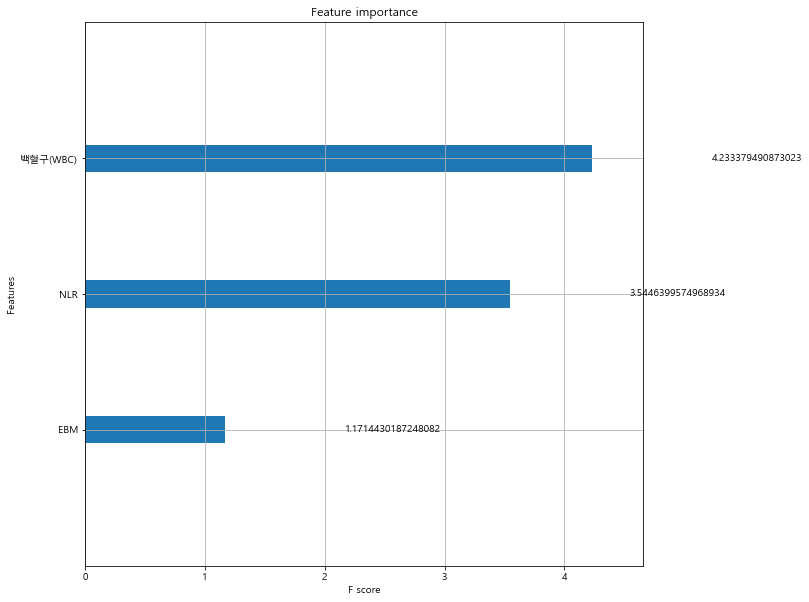

In [246]:
if XGB_bool:
    plt.rcParams["figure.figsize"] = (10, 10)
    xgboost.plot_importance(model, importance_type='gain')

In [247]:
model.feature_importances_

array([0.47303167, 0.39607292, 0.13089535], dtype=float32)

In [248]:
df_feature = pd.concat([pd.DataFrame(train_columns), pd.DataFrame(model.feature_importances_)], axis=1)
df_feature.columns = ['columns', 'feature_importance']

In [249]:
df_feature.sort_values('feature_importance', ascending=False)

,columns,feature_importance
0,백혈구(WBC),0.473032
1,NLR,0.396073
2,EBM,0.130895


# 실제지수 - 예측지수 결과

In [250]:
pd.DataFrame(y_test).reset_index(drop=True)

,target
0,111.0
1,120.0
2,92.0
3,113.0
4,101.0
...,...
160641,86.0
160642,102.0
160643,110.0
160644,106.0


In [251]:
pd.DataFrame(y_pred).reset_index(drop=True)

,0
0,110.217796
1,118.089737
2,92.589729
3,112.392883
4,102.414940
...,...
160641,88.497650
160642,101.601807
160643,108.904015
160644,104.275909


In [252]:
df_test = pd.concat([pd.DataFrame(y_test).reset_index(drop=True), pd.DataFrame(y_pred).reset_index(drop=True)], axis=1)

In [253]:
df_test.head()

,target,0
0,111.0,110.217796
1,120.0,118.089737
2,92.0,92.589729
3,113.0,112.392883
4,101.0,102.414940


In [254]:
df_test.columns

Index(['target', 0], dtype='object')

In [255]:
df_test.columns = ['실제지수', '예측지수']

In [256]:
df_test['diff'] = df_test['예측지수'] - df_test['실제지수']

In [257]:
df_test.head()

,실제지수,예측지수,diff
0,111.0,110.217796,-0.782204
1,120.0,118.089737,-1.910263
2,92.0,92.589729,0.589729
3,113.0,112.392883,-0.607117
4,101.0,102.414940,1.414940


In [258]:
df_test['diff_int'] = df_test['diff'].round(0)

In [259]:
len(df_test)

160646

In [260]:
df_test.head()

,실제지수,예측지수,diff,diff_int
0,111.0,110.217796,-0.782204,-1.0
1,120.0,118.089737,-1.910263,-2.0
2,92.0,92.589729,0.589729,1.0
3,113.0,112.392883,-0.607117,-1.0
4,101.0,102.414940,1.414940,1.0


<AxesSubplot:>

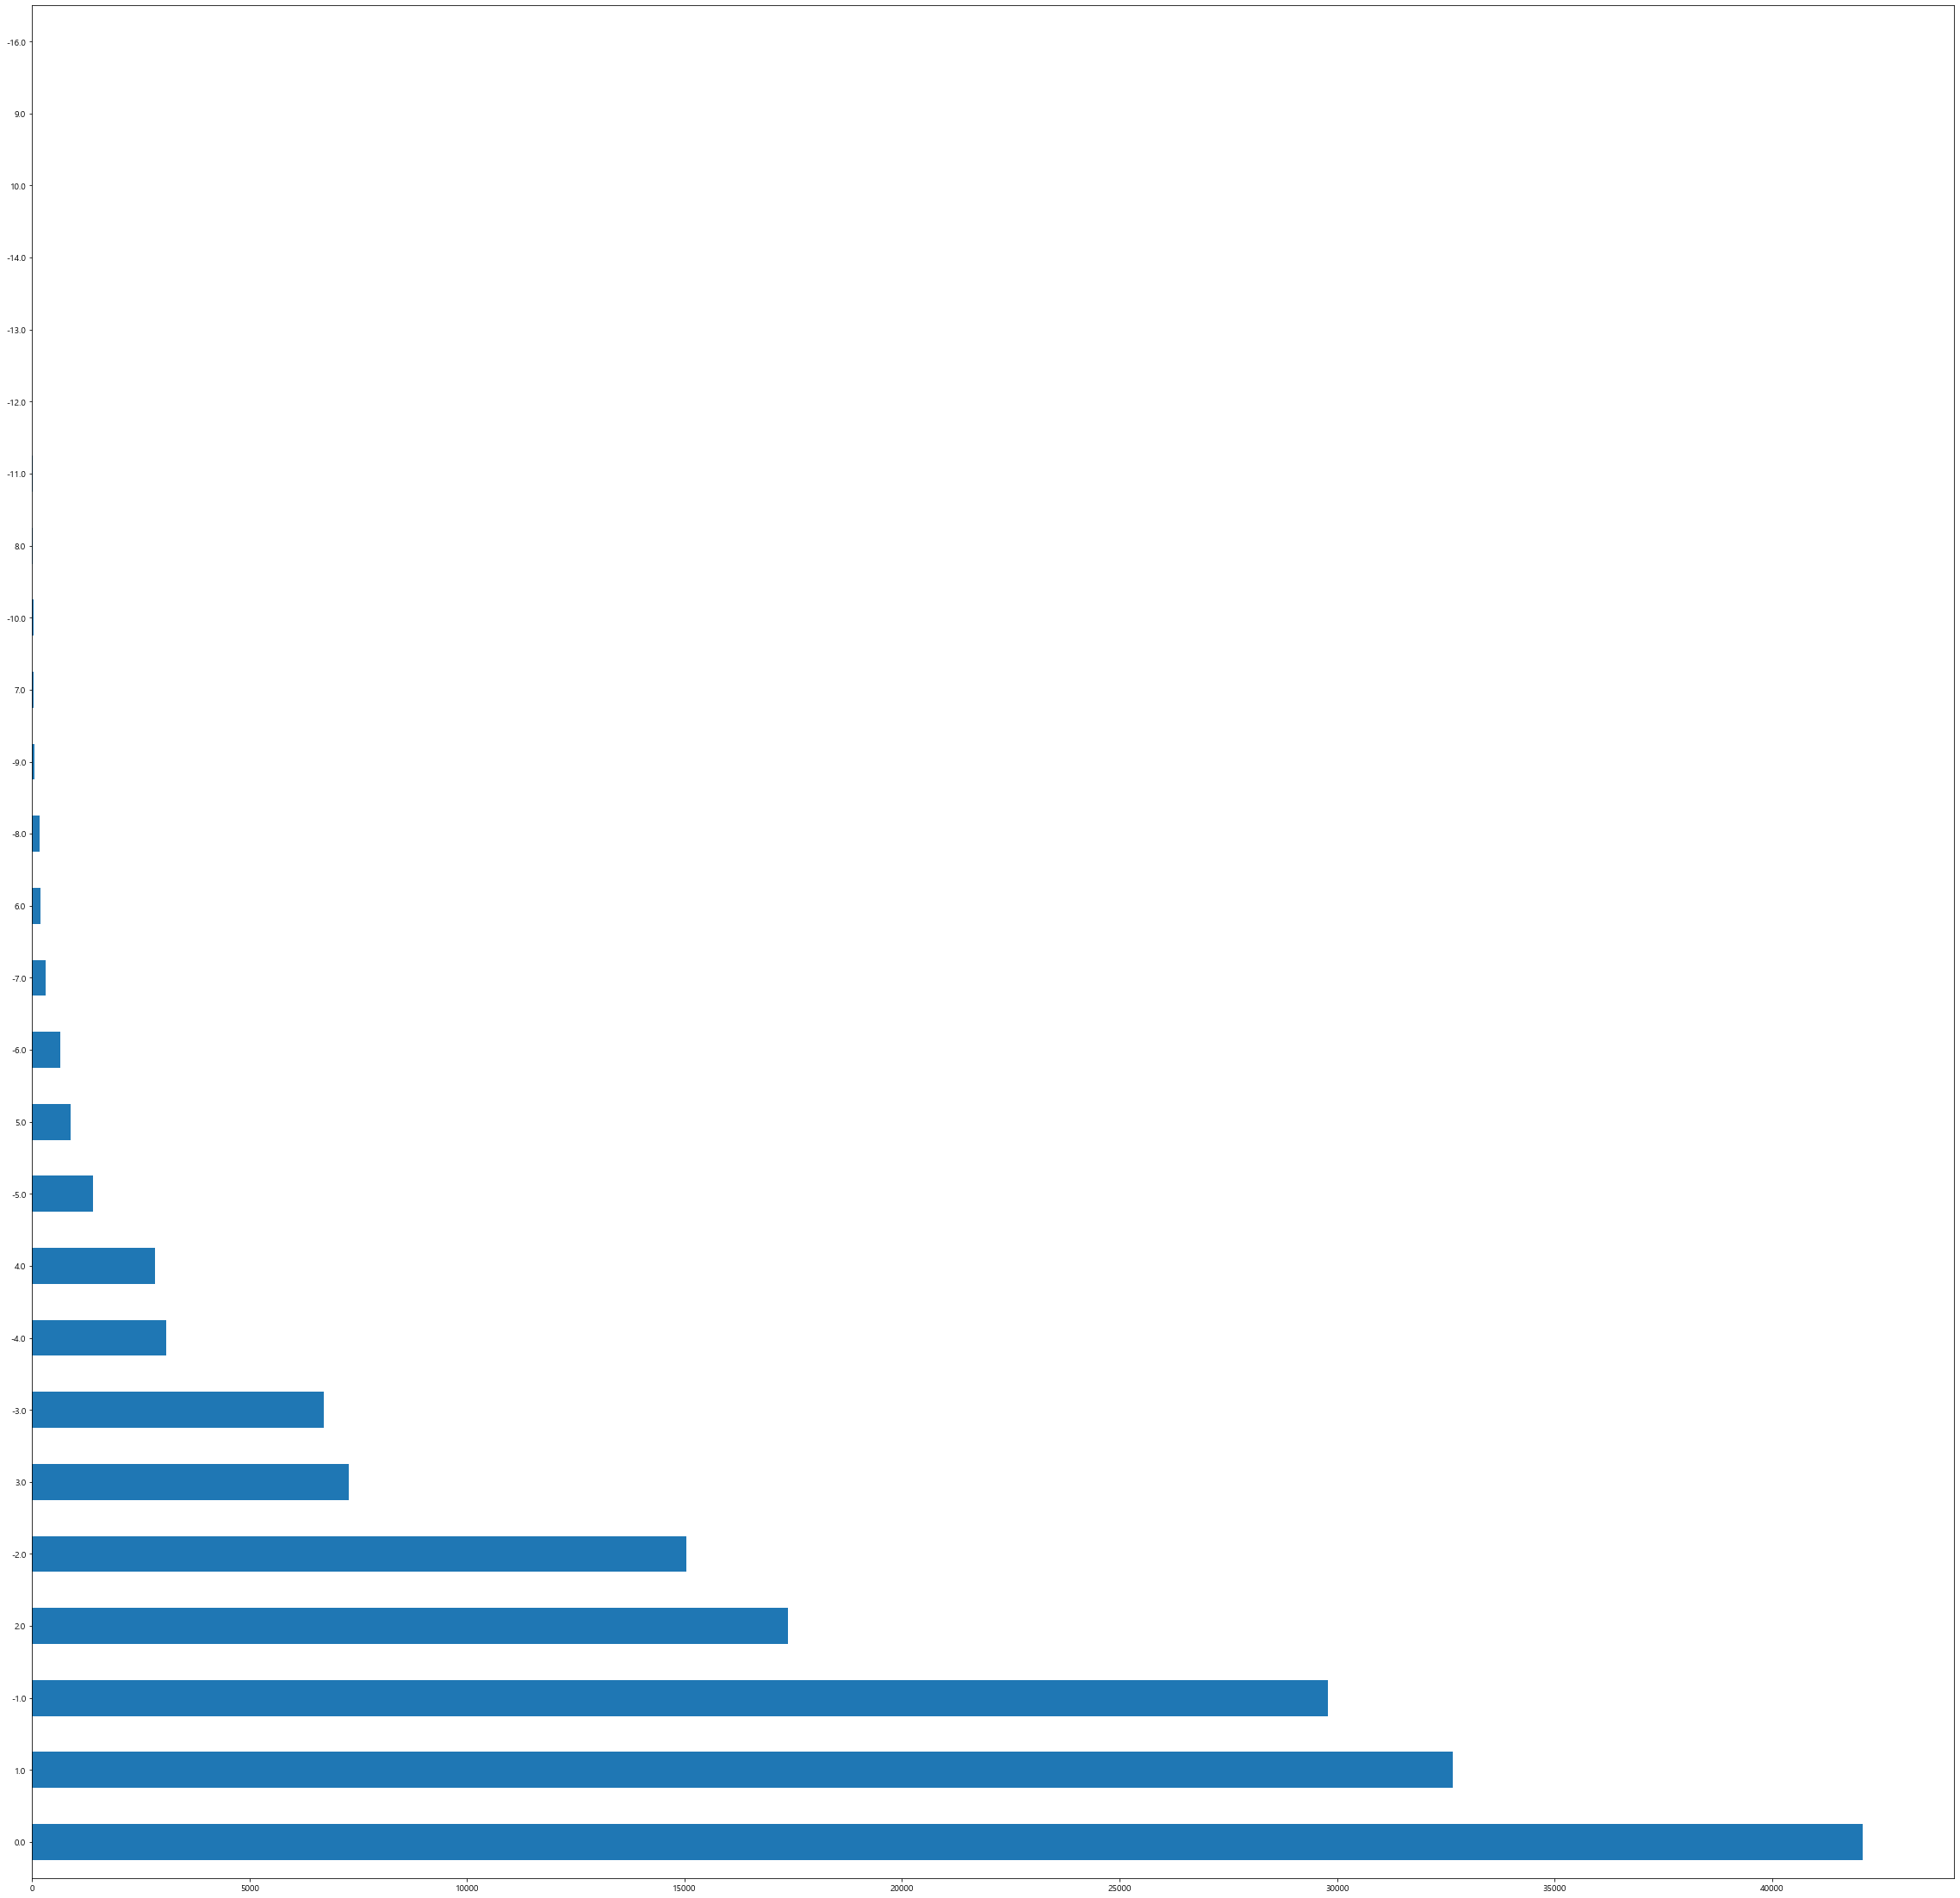

In [261]:
plt.figure(figsize=(40, 40))
df_test['diff_int'].value_counts().plot(kind='barh')
# plt.savefig('./output/png/숙취나이_결측치제거_20대_남자.png')

In [262]:
df_test['diff_int'].value_counts(ascending=False)

 0.0     42081
 1.0     32659
-1.0     29791
 2.0     17385
-2.0     15040
 3.0      7290
-3.0      6715
-4.0      3079
 4.0      2817
-5.0      1401
 5.0       885
-6.0       648
-7.0       312
 6.0       194
-8.0       165
-9.0        59
 7.0        39
-10.0       31
 8.0        22
-11.0       14
-12.0        5
-13.0        4
-14.0        3
 10.0        3
 9.0         3
-16.0        1
Name: diff_int, dtype: int64

In [263]:
df_test['예측지수'].round(0).value_counts()

110.0    4891
91.0     4489
92.0     4313
108.0    4310
109.0    4299
90.0     4287
89.0     4255
112.0    4088
93.0     4082
106.0    4080
107.0    4063
111.0    3998
94.0     3983
87.0     3935
113.0    3910
114.0    3876
96.0     3872
88.0     3867
95.0     3827
104.0    3777
105.0    3710
86.0     3697
103.0    3638
97.0     3619
98.0     3589
102.0    3517
101.0    3507
100.0    3436
99.0     3349
85.0     3128
115.0    3116
84.0     2811
83.0     2660
116.0    2613
117.0    2561
82.0     2510
118.0    2428
119.0    2371
81.0     2295
120.0    2295
80.0     2122
79.0     1877
121.0    1861
122.0    1610
78.0     1483
123.0    1191
77.0     1171
124.0     850
76.0      835
75.0      572
74.0      464
73.0      429
72.0      366
71.0      358
70.0      323
68.0      280
69.0      265
67.0      244
66.0      201
125.0     183
65.0      171
64.0      143
63.0      139
62.0       99
61.0       80
60.0       78
59.0       62
58.0       40
56.0       33
57.0       31
55.0       15
54.0  

# 예측 나이 분포

In [264]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model.eval()
        X_train_pred = model(X_train)
        X_train_pred = X_train_pred.numpy()

    df_train = pd.DataFrame(X_train_pred).reset_index(drop=True)
    y_test = pd.DataFrame(y_test.numpy())

In [265]:
if XGB_bool:
    df_train = pd.DataFrame(model.predict(X_train)).reset_index(drop=True)

In [266]:
# df_test = pd.DataFrame(model.predict(X_test)).reset_index(drop=True)

In [267]:
df_plot = pd.DataFrame(y_test.value_counts())

In [268]:
df_plot.columns = ['count']

In [269]:
df_plot.reset_index(inplace=True)

In [270]:
df_plot = df_plot.sort_values('index', ascending=True)

In [271]:
df_plot

,index,count
73,52.0,1
72,53.0,6
71,54.0,13
70,55.0,18
69,56.0,30
68,57.0,37
67,58.0,42
66,59.0,61
64,60.0,78
65,61.0,75


In [272]:
df_plot.set_index('index', inplace=True)

<AxesSubplot:xlabel='index'>

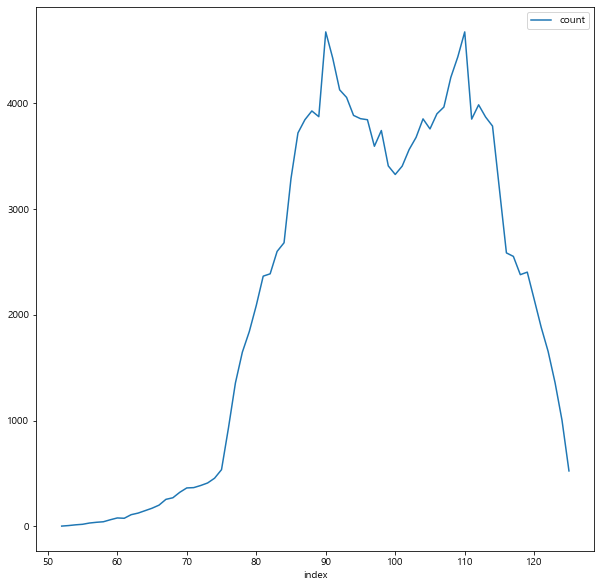

In [273]:
df_plot.plot()

In [274]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model.eval()
        X_test_pred = model(X_test)
        X_test_pred = X_test_pred.numpy()
    df_test = pd.DataFrame(X_test_pred).reset_index(drop=True)

In [275]:
if XGB_bool:
    df_test = pd.DataFrame(model.predict(X_test)).reset_index(drop=True)

In [276]:
df_plot = pd.DataFrame(df_test.round(0).value_counts())

In [277]:
df_plot.columns = ['count']

In [278]:
df_plot.reset_index(inplace=True)

In [279]:
df_plot = df_plot.sort_values(0, ascending=True)

In [280]:
df_plot.set_index(0, inplace=True)

In [281]:
df_plot

,count
0,
53.0,8
54.0,10
55.0,15
56.0,33
57.0,31
58.0,40
59.0,62
60.0,78
61.0,80


<AxesSubplot:xlabel='0'>

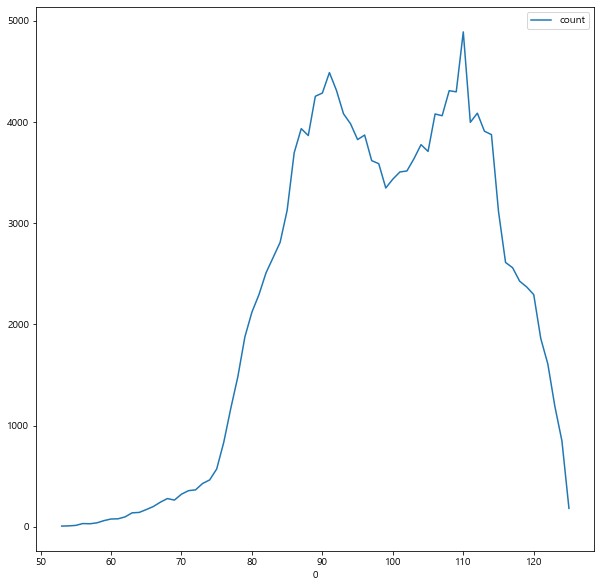

In [282]:
df_plot.plot()

# 시각화

In [283]:
# model.coef_

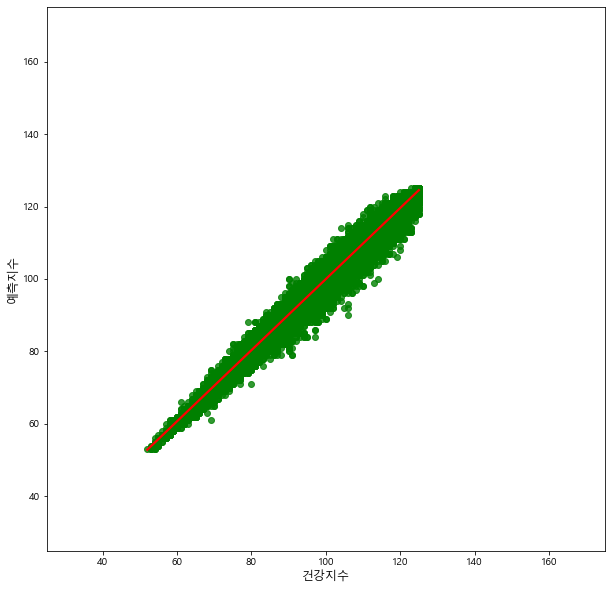

In [284]:
plt.rcParams["figure.figsize"] = (10, 10)
df_scatter = pd.concat([pd.DataFrame(y_test).reset_index(drop=True), df_test.round(0)], axis = 1)
df_scatter.columns = ['건강지수', '예측지수']

import seaborn as sns

# plt.figure(figsize=(10, 10))
# plt.scatter(df_scatterx='나이', y='예측나이', s=9, cmap='Reds', color='green', trendline="ols")
# plt.colorbar()
# sns.scatterplot(x=df_scatter['나이'], y=df_scatter['예측나이'], color='green')
sns.regplot(x=df_scatter['건강지수'], y=df_scatter['예측지수'], scatter_kws={'color':'green'}, line_kws={'color':'red'})
plt.xlabel('건강지수', fontsize=12)
plt.ylabel('예측지수', fontsize=12)
plt.xlim([25, 175])
plt.ylim([25, 175])
plt.show()

# 남성 데이터 전체 계산

In [285]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,백혈구(WBC),림프구 (Lymphocyte),분획호중구 (Seg Neutroph),호산구 (Eosinophil),단핵구 (Monocyte),호염기구 (Basophil),NLR,EBM,백혈구(WBC)_kde,NLR_kde,EBM_kde,kde_mean,target
0,2011,32,11757,1,24,5.20,34.5,58.4,1.5,5.3,0.3,1.69,7.1,122.80,148.04,39.73,116.28,108.0
1,2021,50,642497,1,55,9.00,26.0,59.0,7.0,7.0,1.0,2.27,15.0,16.30,58.12,40.80,37.93,69.0
2,2019,62,421626,1,40,6.17,43.4,47.9,3.2,4.9,0.6,1.10,8.7,115.27,105.64,136.08,115.58,108.0
3,2020,62,565527,1,41,5.98,45.5,44.6,2.0,7.2,0.7,0.98,9.9,146.12,87.22,145.27,122.39,111.0
4,2021,62,699357,1,42,5.13,47.0,41.4,5.5,5.5,0.6,0.88,11.6,147.13,58.35,123.59,106.91,103.0


In [286]:
df_man.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505517 entries, 0 to 505516
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   검진년도                  505517 non-null  int64  
 1   UID                   505517 non-null  int64  
 2   CU_REC_ID             505517 non-null  int64  
 3   SEX                   505517 non-null  int64  
 4   검진당시나이                505517 non-null  int64  
 5   백혈구(WBC)              505517 non-null  float64
 6   림프구 (Lymphocyte)      505517 non-null  float64
 7   분획호중구 (Seg Neutroph)  505517 non-null  float64
 8   호산구 (Eosinophil)      505517 non-null  float64
 9   단핵구 (Monocyte)        505517 non-null  float64
 10  호염기구 (Basophil)       505517 non-null  float64
 11  NLR                   505517 non-null  float64
 12  EBM                   505517 non-null  float64
 13  백혈구(WBC)_kde          505517 non-null  float64
 14  NLR_kde               505517 non-null  float64
 15  

In [287]:
df_man[df_man['UID'] == 168996]

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,백혈구(WBC),림프구 (Lymphocyte),분획호중구 (Seg Neutroph),호산구 (Eosinophil),단핵구 (Monocyte),호염기구 (Basophil),NLR,EBM,백혈구(WBC)_kde,NLR_kde,EBM_kde,kde_mean,target
78074,2022,168996,2259500,1,35,5.05,38.4,51.7,2.4,6.5,1.0,1.35,9.9,135.26,149.93,149.64,144.00,122.0
78075,2023,168996,2259499,1,36,5.72,42.1,46.7,4.0,6.5,0.7,1.11,11.2,141.50,123.13,134.84,132.82,116.0
78076,2024,168996,2281994,1,37,6.04,43.5,45.6,2.6,7.5,0.8,1.05,10.9,131.80,98.07,132.12,118.37,109.0


In [288]:
train_columns

['백혈구(WBC)', 'NLR', 'EBM']

In [289]:
if scaling_bool:
    df_pred = df_man_scaled.copy()
else:
    df_pred = df_man.copy()

In [290]:
len(df_pred)

505517

In [291]:
df_pred.reset_index(drop=True, inplace=True)

In [292]:
X_test

,백혈구(WBC),NLR,EBM
85989,5.56,1.16,7.00
222439,4.96,1.67,9.90
387427,7.80,1.69,9.00
3583,5.20,1.69,8.70
430985,6.12,1.09,6.30
...,...,...,...
249167,3.70,1.24,15.10
457590,8.00,1.48,10.90
460630,6.00,1.48,15.01
289804,4.70,0.95,9.10


In [293]:
df_pred.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '백혈구(WBC)',
       '림프구 (Lymphocyte)', '분획호중구 (Seg Neutroph)', '호산구 (Eosinophil)',
       '단핵구 (Monocyte)', '호염기구 (Basophil)', 'NLR', 'EBM', '백혈구(WBC)_kde',
       'NLR_kde', 'EBM_kde', 'kde_mean', 'target'],
      dtype='object')

In [294]:
df_pred[train_columns]

,백혈구(WBC),NLR,EBM
0,5.20,1.69,7.1
1,9.00,2.27,15.0
2,6.17,1.10,8.7
3,5.98,0.98,9.9
4,5.13,0.88,11.6
...,...,...,...
505512,6.26,2.56,10.2
505513,7.34,1.42,12.5
505514,9.02,1.98,9.5
505515,4.52,1.31,12.1


In [295]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model.eval()
        pred_data = model(torch.Tensor(df_pred[train_columns].to_numpy()))
        pred_data = pred_data.numpy()

In [296]:
if XGB_bool:
    # Get predictions
    # pred_data = model.predict(df_pred[train_columns])
    pred_data = model.predict(df_pred[train_columns])

In [297]:
pred_data = pred_data.round(0)

In [298]:
pred_data

array([105.,  67., 111., ...,  87., 111.,  96.], dtype=float32)

In [299]:
df_output = pd.concat([df_pred, pd.DataFrame(pred_data, columns=['예측지수']).reset_index(drop=True)], axis=1)

In [300]:
if scaling_bool:
    df_output = pd.concat([df_man[['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이']], df_output], axis=1)

In [301]:
df_output.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,백혈구(WBC),림프구 (Lymphocyte),분획호중구 (Seg Neutroph),호산구 (Eosinophil),단핵구 (Monocyte),호염기구 (Basophil),NLR,EBM,백혈구(WBC)_kde,NLR_kde,EBM_kde,kde_mean,target,예측지수
0,2011,32,11757,1,24,5.20,34.5,58.40,1.5,5.3,0.30,1.69,7.1,122.80,148.04,39.73,116.28,108.0,105.0
1,2021,50,642497,1,55,9.00,26.0,59.00,7.0,7.0,1.00,2.27,15.0,16.30,58.12,40.80,37.93,69.0,67.0
2,2019,62,421626,1,40,6.17,43.4,47.90,3.2,4.9,0.60,1.10,8.7,115.27,105.64,136.08,115.58,108.0,111.0
3,2020,62,565527,1,41,5.98,45.5,44.60,2.0,7.2,0.70,0.98,9.9,146.12,87.22,145.27,122.39,111.0,109.0
4,2021,62,699357,1,42,5.13,47.0,41.40,5.5,5.5,0.60,0.88,11.6,147.13,58.35,123.59,106.91,103.0,104.0
5,2023,62,2170394,1,44,5.80,42.8,46.00,5.6,4.8,0.80,1.07,11.2,149.77,118.46,129.37,133.17,117.0,113.0
6,2022,76,1377275,1,52,6.07,35.0,57.00,2.0,5.0,1.00,1.63,8.0,128.57,138.79,95.88,126.12,113.0,114.0
7,2024,77,2575587,1,30,5.23,29.0,62.00,2.0,7.0,0.00,2.14,9.0,147.43,68.96,136.26,113.81,107.0,108.0
8,2022,79,1369378,1,58,5.27,34.0,58.00,3.0,5.0,0.00,1.71,8.0,148.59,120.93,102.33,128.27,114.0,115.0
9,2023,79,2667016,1,59,4.98,36.0,59.00,1.0,4.0,0.00,1.64,5.0,143.20,140.48,9.03,115.28,108.0,107.0


## 예측지수 성능평가

In [302]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output['target'], df_output['예측지수'])

1.3644427388198617

# target으로 나이 계산

In [303]:
df_output['예측나이'] = ((100 - df_output['예측지수']) / 5) + df_output['검진당시나이']
df_output['예측나이'] = df_output['예측나이'].round(2)

In [304]:
df_output.head(30)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,백혈구(WBC),림프구 (Lymphocyte),분획호중구 (Seg Neutroph),호산구 (Eosinophil),단핵구 (Monocyte),호염기구 (Basophil),NLR,EBM,백혈구(WBC)_kde,NLR_kde,EBM_kde,kde_mean,target,예측지수,예측나이
0,2011,32,11757,1,24,5.20,34.5,58.40,1.5,5.3,0.30,1.69,7.1,122.80,148.04,39.73,116.28,108.0,105.0,23.0
1,2021,50,642497,1,55,9.00,26.0,59.00,7.0,7.0,1.00,2.27,15.0,16.30,58.12,40.80,37.93,69.0,67.0,61.6
2,2019,62,421626,1,40,6.17,43.4,47.90,3.2,4.9,0.60,1.10,8.7,115.27,105.64,136.08,115.58,108.0,111.0,37.8
3,2020,62,565527,1,41,5.98,45.5,44.60,2.0,7.2,0.70,0.98,9.9,146.12,87.22,145.27,122.39,111.0,109.0,39.2
4,2021,62,699357,1,42,5.13,47.0,41.40,5.5,5.5,0.60,0.88,11.6,147.13,58.35,123.59,106.91,103.0,104.0,41.2
5,2023,62,2170394,1,44,5.80,42.8,46.00,5.6,4.8,0.80,1.07,11.2,149.77,118.46,129.37,133.17,117.0,113.0,41.4
6,2022,76,1377275,1,52,6.07,35.0,57.00,2.0,5.0,1.00,1.63,8.0,128.57,138.79,95.88,126.12,113.0,114.0,49.2
7,2024,77,2575587,1,30,5.23,29.0,62.00,2.0,7.0,0.00,2.14,9.0,147.43,68.96,136.26,113.81,107.0,108.0,28.4
8,2022,79,1369378,1,58,5.27,34.0,58.00,3.0,5.0,0.00,1.71,8.0,148.59,120.93,102.33,128.27,114.0,115.0,55.0
9,2023,79,2667016,1,59,4.98,36.0,59.00,1.0,4.0,0.00,1.64,5.0,143.20,140.48,9.03,115.28,108.0,107.0,57.6


## 예측나이 성능평가

In [305]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output['검진당시나이'], df_output['예측나이'])

2.117964776654396

# 최종 산출

In [306]:
df_output.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,백혈구(WBC),림프구 (Lymphocyte),분획호중구 (Seg Neutroph),호산구 (Eosinophil),단핵구 (Monocyte),호염기구 (Basophil),NLR,EBM,백혈구(WBC)_kde,NLR_kde,EBM_kde,kde_mean,target,예측지수,예측나이
0,2011,32,11757,1,24,5.20,34.5,58.4,1.5,5.3,0.3,1.69,7.1,122.80,148.04,39.73,116.28,108.0,105.0,23.0
1,2021,50,642497,1,55,9.00,26.0,59.0,7.0,7.0,1.0,2.27,15.0,16.30,58.12,40.80,37.93,69.0,67.0,61.6
2,2019,62,421626,1,40,6.17,43.4,47.9,3.2,4.9,0.6,1.10,8.7,115.27,105.64,136.08,115.58,108.0,111.0,37.8
3,2020,62,565527,1,41,5.98,45.5,44.6,2.0,7.2,0.7,0.98,9.9,146.12,87.22,145.27,122.39,111.0,109.0,39.2
4,2021,62,699357,1,42,5.13,47.0,41.4,5.5,5.5,0.6,0.88,11.6,147.13,58.35,123.59,106.91,103.0,104.0,41.2


# DataMart csv

In [307]:
df_copy = df.copy()

In [308]:
df_copy.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,백혈구(WBC),림프구 (Lymphocyte),분획호중구 (Seg Neutroph),호산구 (Eosinophil),단핵구 (Monocyte),호염기구 (Basophil)
0,2010,7282,2520,1,42,6.56,46.5,42.0,1.1,9.9,0.5
1,2010,7490,3638,1,39,6.50,41.0,48.0,3.0,8.0,0.0
2,2010,7915,3997,1,36,5.14,22.8,68.3,2.1,6.2,0.6
3,2010,8056,4745,1,42,7.00,39.0,50.0,3.0,8.0,0.0
4,2010,8457,3929,1,38,7.01,46.2,45.3,2.4,6.0,0.1


In [309]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 11 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   검진년도                  1213899 non-null  int64  
 1   UID                   1213899 non-null  int64  
 2   CU_REC_ID             1213899 non-null  int64  
 3   SEX                   1213899 non-null  int64  
 4   검진당시나이                1213899 non-null  int64  
 5   백혈구(WBC)              1114257 non-null  float64
 6   림프구 (Lymphocyte)      1084766 non-null  float64
 7   분획호중구 (Seg Neutroph)  883969 non-null   float64
 8   호산구 (Eosinophil)      1075133 non-null  float64
 9   단핵구 (Monocyte)        1076836 non-null  float64
 10  호염기구 (Basophil)       1061163 non-null  float64
dtypes: float64(6), int64(5)
memory usage: 101.9 MB


In [310]:
minimums

[1.7999999999999998,
 14.150000000000004,
 33.1,
 -2.35,
 2.4999999999999996,
 -0.35]

In [311]:
maximums

[9.8, 54.55, 77.1, 7.65, 11.3, 1.65]

In [312]:
train_columns

['백혈구(WBC)', 'NLR', 'EBM']

In [313]:
target_cols

['백혈구(WBC)', 'NLR', 'EBM']

In [314]:
target_cols_org

['백혈구(WBC)',
 '림프구 (Lymphocyte)',
 '분획호중구 (Seg Neutroph)',
 '호산구 (Eosinophil)',
 '단핵구 (Monocyte)',
 '호염기구 (Basophil)']

In [315]:
for idx, col in enumerate(target_cols_org):    
    df_copy.loc[df_copy[col] < minimums[idx], col] = minimums[idx]
    df_copy.loc[df_copy[col] > maximums[idx], col] = maximums[idx]

## NLR

In [316]:
df_copy['NLR'] = df_copy['분획호중구 (Seg Neutroph)'] / df_copy['림프구 (Lymphocyte)']
df_copy['NLR'] = df_copy['NLR'].round(2)

## EBM

In [317]:
df_copy['EBM'] = df_copy['호산구 (Eosinophil)'] + df_copy['단핵구 (Monocyte)'] + df_copy['호염기구 (Basophil)']
df_copy['EBM'] = df_copy['EBM'].round(2)

In [318]:
df_man_csv = df_copy[df_copy['SEX'] == 1]
len(df_man_csv)

765459

In [319]:
df_man_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,백혈구(WBC),림프구 (Lymphocyte),분획호중구 (Seg Neutroph),호산구 (Eosinophil),단핵구 (Monocyte),호염기구 (Basophil),NLR,EBM
0,2010,7282,2520,1,42,6.56,46.5,42.0,1.1,9.9,0.5,0.90,11.5
1,2010,7490,3638,1,39,6.50,41.0,48.0,3.0,8.0,0.0,1.17,11.0
2,2010,7915,3997,1,36,5.14,22.8,68.3,2.1,6.2,0.6,3.00,8.9
3,2010,8056,4745,1,42,7.00,39.0,50.0,3.0,8.0,0.0,1.28,11.0
4,2010,8457,3929,1,38,7.01,46.2,45.3,2.4,6.0,0.1,0.98,8.5


## 검진 항목 all 결측치 지우기

In [320]:
target_cols

['백혈구(WBC)', 'NLR', 'EBM']

In [321]:
df_man_csv.dropna(subset=target_cols, how='all', inplace=True)

In [322]:
df_man_csv.reset_index(drop=True, inplace=True)

In [323]:
len(df_man_csv)

707627

## fillna

In [324]:
df_man_csv.fillna(df_man.mean().round(2), inplace=True)

## 백혈구(WBC)스크리닝

In [325]:
screening = 10

In [326]:
scr_col = '백혈구(WBC)'

In [327]:
df_man_csv[df_man_csv[scr_col] > screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,백혈구(WBC),림프구 (Lymphocyte),분획호중구 (Seg Neutroph),호산구 (Eosinophil),단핵구 (Monocyte),호염기구 (Basophil),NLR,EBM


In [328]:
len(df_man_csv[df_man_csv[scr_col] > screening])

0

In [329]:
df_man_csv.loc[df_man_csv[scr_col] > screening, scr_col] = screening

In [330]:
df_man_csv[df_man_csv[scr_col] > screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,백혈구(WBC),림프구 (Lymphocyte),분획호중구 (Seg Neutroph),호산구 (Eosinophil),단핵구 (Monocyte),호염기구 (Basophil),NLR,EBM


In [331]:
len(df_man_csv[df_man_csv[scr_col] > screening])

0

In [332]:
len(df_man_csv)

707627

## 모델 예측

In [333]:
if XGB_bool:
    # Get predictions
    # pred_data = model.predict(df_pred[train_columns])
    pred_data = model.predict(df_man_csv[train_columns])

In [334]:
pred_data = pred_data.round(0)

In [335]:
df_man_csv = pd.concat([df_man_csv, pd.DataFrame(pred_data, columns=['예측지수']).reset_index(drop=True)], axis=1)

In [336]:
df_man_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,백혈구(WBC),림프구 (Lymphocyte),분획호중구 (Seg Neutroph),호산구 (Eosinophil),단핵구 (Monocyte),호염기구 (Basophil),NLR,EBM,예측지수
0,2010,7282,2520,1,42,6.56,46.5,42.0,1.1,9.9,0.5,0.90,11.5,97.0
1,2010,7490,3638,1,39,6.50,41.0,48.0,3.0,8.0,0.0,1.17,11.0,111.0
2,2010,7915,3997,1,36,5.14,22.8,68.3,2.1,6.2,0.6,3.00,8.9,95.0
3,2010,8056,4745,1,42,7.00,39.0,50.0,3.0,8.0,0.0,1.28,11.0,109.0
4,2010,8457,3929,1,38,7.01,46.2,45.3,2.4,6.0,0.1,0.98,8.5,96.0


### 성능 평가

In [337]:
# # MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
# print('MAE :',mean_absolute_error(df_man_csv['target'], df_man_csv['예측지수']))

In [338]:
# r2_score(df_man_csv['target'], df_man_csv['예측지수'])

## 예측나이 계산

In [339]:
df_man_csv['예측나이'] = ((100 - df_man_csv['예측지수']) / 5) + df_man_csv['검진당시나이']
df_man_csv['예측나이'] = df_man_csv['예측나이'].round(2)

### 성능 평가

In [340]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
print('MAE :',mean_absolute_error(df_man_csv['검진당시나이'], df_man_csv['예측나이']))

MAE : 2.2586419116285845


In [341]:
r2_score(df_man_csv['검진당시나이'], df_man_csv['예측나이'])

0.900475581688287

In [342]:
df_man_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,백혈구(WBC),림프구 (Lymphocyte),분획호중구 (Seg Neutroph),호산구 (Eosinophil),단핵구 (Monocyte),호염기구 (Basophil),NLR,EBM,예측지수,예측나이
0,2010,7282,2520,1,42,6.56,46.5,42.0,1.1,9.9,0.5,0.90,11.5,97.0,42.6
1,2010,7490,3638,1,39,6.50,41.0,48.0,3.0,8.0,0.0,1.17,11.0,111.0,36.8
2,2010,7915,3997,1,36,5.14,22.8,68.3,2.1,6.2,0.6,3.00,8.9,95.0,37.0
3,2010,8056,4745,1,42,7.00,39.0,50.0,3.0,8.0,0.0,1.28,11.0,109.0,40.2
4,2010,8457,3929,1,38,7.01,46.2,45.3,2.4,6.0,0.1,0.98,8.5,96.0,38.8


In [343]:
df_man_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707627 entries, 0 to 707626
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   검진년도                  707627 non-null  int64  
 1   UID                   707627 non-null  int64  
 2   CU_REC_ID             707627 non-null  int64  
 3   SEX                   707627 non-null  int64  
 4   검진당시나이                707627 non-null  int64  
 5   백혈구(WBC)              707627 non-null  float64
 6   림프구 (Lymphocyte)      707627 non-null  float64
 7   분획호중구 (Seg Neutroph)  707627 non-null  float64
 8   호산구 (Eosinophil)      707627 non-null  float64
 9   단핵구 (Monocyte)        707627 non-null  float64
 10  호염기구 (Basophil)       707627 non-null  float64
 11  NLR                   707627 non-null  float64
 12  EBM                   707627 non-null  float64
 13  예측지수                  707627 non-null  float32
 14  예측나이                  707627 non-null  float64
dtype

# 최종 UID별 확인

In [344]:
# 김태현 본부장님
df_man_csv[df_man_csv['UID'] == 175673].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,백혈구(WBC),림프구 (Lymphocyte),분획호중구 (Seg Neutroph),호산구 (Eosinophil),단핵구 (Monocyte),호염기구 (Basophil),NLR,EBM,예측지수,예측나이
253902,2022,175673,751348,1,48,8.26,26.4,66.1,2.8,4.2,0.5,2.50,7.5,72.0,53.6
253903,2022,175673,1463838,1,48,8.26,26.4,66.1,2.8,4.2,0.5,2.50,7.5,72.0,53.6
253839,2022,175673,1919125,1,48,8.26,26.4,66.1,2.8,4.2,0.5,2.50,7.5,72.0,53.6
253904,2022,175673,2169120,1,48,8.26,26.4,66.1,2.8,4.2,0.5,2.50,7.5,72.0,53.6
253840,2022,175673,2223795,1,48,8.26,26.4,66.1,2.8,4.2,0.5,2.50,7.5,72.0,53.6
253841,2022,175673,2237465,1,48,8.26,26.4,66.1,2.8,4.2,0.5,2.50,7.5,72.0,53.6
253905,2022,175673,2238320,1,48,8.26,26.4,66.1,2.8,4.2,0.5,2.50,7.5,72.0,53.6
253906,2022,175673,2246042,1,48,8.26,26.4,66.1,2.8,4.2,0.5,2.50,7.5,72.0,53.6
414336,2023,175673,1463893,1,49,5.79,40.9,50.0,2.2,6.2,0.7,1.22,9.1,120.0,45.0
414332,2023,175673,1919126,1,49,5.79,40.9,50.0,2.2,6.2,0.7,1.22,9.1,120.0,45.0


In [345]:
# 양원영 유닛장님
df_man_csv[df_man_csv['UID'] == 289587].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,백혈구(WBC),림프구 (Lymphocyte),분획호중구 (Seg Neutroph),호산구 (Eosinophil),단핵구 (Monocyte),호염기구 (Basophil),NLR,EBM,예측지수,예측나이
180619,2021,289587,796178,1,47,6.48,34.7,54.66,3.5,7.1,0.8,1.69,11.4,105.0,46.0
285025,2022,289587,866076,1,48,5.85,29.1,57.50,7.4,5.5,0.5,1.98,13.4,104.0,47.2
284980,2022,289587,2115999,1,48,5.85,29.1,57.50,7.4,5.5,0.5,1.98,13.4,104.0,47.2
88850,2022,289587,2603574,1,48,5.85,29.1,57.50,7.4,5.5,0.5,1.98,13.4,104.0,47.2
463254,2023,289587,1487447,1,49,6.79,44.3,44.10,4.7,6.3,0.6,1.00,11.6,100.0,49.0
463255,2023,289587,2227964,1,49,6.79,44.3,44.10,4.7,6.3,0.6,1.00,11.6,100.0,49.0
644052,2024,289587,2243723,1,50,5.65,37.3,51.20,5.3,5.5,0.7,1.37,11.5,122.0,45.6
644030,2024,289587,2603575,1,50,5.65,37.3,51.20,5.3,5.5,0.7,1.37,11.5,122.0,45.6


In [346]:
# 한...
df_man_csv[df_man_csv['UID'] == 897603].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,백혈구(WBC),림프구 (Lymphocyte),분획호중구 (Seg Neutroph),호산구 (Eosinophil),단핵구 (Monocyte),호염기구 (Basophil),NLR,EBM,예측지수,예측나이
384582,2022,897603,1066133,1,51,4.08,40.2,52.0,2.2,5.1,0.5,1.29,7.8,102.0,50.6
384593,2022,897603,1068885,1,51,4.08,40.2,52.0,2.2,5.1,0.5,1.29,7.8,102.0,50.6
384594,2022,897603,1728532,1,51,4.08,40.2,52.0,2.2,5.1,0.5,1.29,7.8,102.0,50.6
384595,2022,897603,2555144,1,51,4.08,40.2,52.0,2.2,5.1,0.5,1.29,7.8,102.0,50.6
554242,2023,897603,1458387,1,52,5.14,39.1,53.2,1.9,5.4,0.4,1.36,7.7,118.0,48.4
554243,2023,897603,1728531,1,52,5.14,39.1,53.2,1.9,5.4,0.4,1.36,7.7,118.0,48.4
542932,2023,897603,2120063,1,52,5.14,39.1,53.2,1.9,5.4,0.4,1.36,7.7,118.0,48.4
542933,2023,897603,2351665,1,52,5.14,39.1,53.2,1.9,5.4,0.4,1.36,7.7,118.0,48.4
554244,2023,897603,2555143,1,52,5.14,39.1,53.2,1.9,5.4,0.4,1.36,7.7,118.0,48.4
542934,2023,897603,2622260,1,52,5.14,39.1,53.2,1.9,5.4,0.4,1.36,7.7,118.0,48.4


In [347]:
# 김명근 팀장님
df_man_csv[df_man_csv['UID'] == 119172].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,백혈구(WBC),림프구 (Lymphocyte),분획호중구 (Seg Neutroph),호산구 (Eosinophil),단핵구 (Monocyte),호염기구 (Basophil),NLR,EBM,예측지수,예측나이
238434,2022,119172,751336,1,41,4.01,37.2,49.8,5.0,7.0,1.0,1.34,13.0,100.0,41.0
238435,2022,119172,1432355,1,41,4.01,37.2,49.8,5.0,7.0,1.0,1.34,13.0,100.0,41.0
238432,2022,119172,1432476,1,41,4.01,37.2,49.8,5.0,7.0,1.0,1.34,13.0,100.0,41.0
238436,2022,119172,2247083,1,41,4.01,37.2,49.8,5.0,7.0,1.0,1.34,13.0,100.0,41.0
238437,2022,119172,2252956,1,41,4.01,37.2,49.8,5.0,7.0,1.0,1.34,13.0,100.0,41.0
400317,2023,119172,1436742,1,42,4.75,33.1,58.2,2.3,5.3,1.1,1.76,8.7,110.0,40.0
400318,2023,119172,2247082,1,42,4.75,33.1,58.2,2.3,5.3,1.1,1.76,8.7,110.0,40.0
400319,2023,119172,2252955,1,42,4.75,33.1,58.2,2.3,5.3,1.1,1.76,8.7,110.0,40.0
625727,2024,119172,2250063,1,43,5.14,34.2,56.5,2.7,6.0,0.6,1.65,9.3,120.0,39.0
625728,2024,119172,2252954,1,43,5.14,34.2,56.5,2.7,6.0,0.6,1.65,9.3,120.0,39.0


In [348]:
# 성주용
df_man_csv[df_man_csv['UID'] == 897595].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,백혈구(WBC),림프구 (Lymphocyte),분획호중구 (Seg Neutroph),호산구 (Eosinophil),단핵구 (Monocyte),호염기구 (Basophil),NLR,EBM,예측지수,예측나이
554237,2023,897595,1525045,1,40,9.80,14.15,77.1,1.9,5.8,0.5,5.45,8.2,63.0,47.4
554238,2023,897595,1593851,1,40,9.80,14.15,77.1,1.9,5.8,0.5,5.45,8.2,63.0,47.4
554235,2023,897595,2005289,1,40,9.80,14.15,77.1,1.9,5.8,0.5,5.45,8.2,63.0,47.4
554236,2023,897595,2138998,1,40,9.80,14.15,77.1,1.9,5.8,0.5,5.45,8.2,63.0,47.4
538560,2023,897595,2320478,1,40,9.80,14.15,77.1,1.9,5.8,0.5,5.45,8.2,63.0,47.4
554239,2023,897595,2328772,1,40,9.80,14.15,77.1,1.9,5.8,0.5,5.45,8.2,63.0,47.4
685824,2024,897595,2329051,1,41,6.51,25.70,60.6,4.5,8.1,1.1,2.36,13.7,87.0,43.6


In [349]:
# 최재..
df_man_csv[df_man_csv['UID'] == 492764].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,백혈구(WBC),림프구 (Lymphocyte),분획호중구 (Seg Neutroph),호산구 (Eosinophil),단핵구 (Monocyte),호염기구 (Basophil),NLR,EBM,예측지수,예측나이
333386,2022,492764,909688,1,39,4.93,41.8,47.0,4.1,5.3,1.65,1.12,11.05,115.0,36.0
333387,2022,492764,1575802,1,39,4.93,41.8,47.0,4.1,5.3,1.65,1.12,11.05,115.0,36.0
333390,2022,492764,1668547,1,39,4.93,41.8,47.0,4.1,5.3,1.65,1.12,11.05,115.0,36.0
333388,2022,492764,2246777,1,39,4.93,41.8,47.0,4.1,5.3,1.65,1.12,11.05,115.0,36.0
333389,2022,492764,2330256,1,39,4.93,41.8,47.0,4.1,5.3,1.65,1.12,11.05,115.0,36.0
133969,2022,492764,2343199,1,39,4.93,41.8,47.0,4.1,5.3,1.65,1.12,11.05,115.0,36.0
151176,2022,492764,2363393,1,39,4.93,41.8,47.0,4.1,5.3,1.65,1.12,11.05,115.0,36.0
151177,2022,492764,2639564,1,39,4.93,41.8,47.0,4.1,5.3,1.65,1.12,11.05,115.0,36.0
151178,2022,492764,2703924,1,39,4.93,41.8,47.0,4.1,5.3,1.65,1.12,11.05,115.0,36.0
333391,2022,492764,2783328,1,39,4.93,41.8,47.0,4.1,5.3,1.65,1.12,11.05,115.0,36.0


In [350]:
# 장경..
df_man_csv[df_man_csv['UID'] == 933936].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,백혈구(WBC),림프구 (Lymphocyte),분획호중구 (Seg Neutroph),호산구 (Eosinophil),단핵구 (Monocyte),호염기구 (Basophil),NLR,EBM,예측지수,예측나이
558427,2023,933936,1431742,1,40,5.95,27.7,61.2,3.2,6.7,1.2,2.21,11.1,104.0,39.2
558428,2023,933936,1435266,1,40,5.95,27.7,61.2,3.2,6.7,1.2,2.21,11.1,104.0,39.2
687119,2024,933936,2242997,1,41,5.40,27.0,61.5,3.0,7.6,0.9,2.28,11.5,103.0,40.4


In [351]:
df_man_csv[df_man_csv['UID'] == 168996].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,백혈구(WBC),림프구 (Lymphocyte),분획호중구 (Seg Neutroph),호산구 (Eosinophil),단핵구 (Monocyte),호염기구 (Basophil),NLR,EBM,예측지수,예측나이
251453,2022,168996,919754,1,35,5.05,38.4,51.7,2.4,6.5,1.0,1.35,9.9,123.0,30.4
251454,2022,168996,1425925,1,35,5.05,38.4,51.7,2.4,6.5,1.0,1.35,9.9,123.0,30.4
251455,2022,168996,2259500,1,35,5.05,38.4,51.7,2.4,6.5,1.0,1.35,9.9,123.0,30.4
412095,2023,168996,1425970,1,36,5.72,42.1,46.7,4.0,6.5,0.7,1.11,11.2,115.0,33.0
412096,2023,168996,1475832,1,36,5.72,42.1,46.7,4.0,6.5,0.7,1.11,11.2,115.0,33.0
412097,2023,168996,2259499,1,36,5.72,42.1,46.7,4.0,6.5,0.7,1.11,11.2,115.0,33.0
630926,2024,168996,2281994,1,37,6.04,43.5,45.6,2.6,7.5,0.8,1.05,10.9,112.0,34.6


# 여성 모델

In [352]:
df_target['SEX'].value_counts()

1    653255
2    389207
Name: SEX, dtype: int64

In [353]:
df_woman = df_target[df_target['SEX'] == 2]
len(df_woman)

389207

# 결측치 처리

## 결측치 삭제

In [354]:
# df_woman.dropna(inplace=True)

In [355]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,백혈구(WBC),림프구 (Lymphocyte),분획호중구 (Seg Neutroph),호산구 (Eosinophil),단핵구 (Monocyte),호염기구 (Basophil),NLR,EBM,백혈구(WBC)_kde,NLR_kde,EBM_kde,kde_mean,target
690908,2010,710490,213,2,28,5.36,43.3,NaN,0.9,5.8,0.4,NaN,7.1,146.92,100.00,104.68,119.70,110.0
656379,2010,315847,230,2,23,4.99,33.5,NaN,3.0,7.0,0.4,NaN,10.4,136.44,100.00,121.28,118.83,109.0
658464,2010,719072,231,2,24,7.77,26.8,NaN,0.4,4.9,0.3,NaN,5.6,48.89,100.00,49.00,69.36,85.0
747276,2010,232950,983,2,32,3.80,44.2,44.9,2.0,8.0,0.9,1.02,10.9,69.38,98.81,97.91,86.86,93.0
747282,2010,703063,1116,2,32,6.70,36.0,51.1,4.9,6.5,1.5,1.42,12.9,89.68,146.94,41.67,102.98,101.0


## 결측치 평균으로 대체

In [356]:
# 결측치를 평균으로 대체 하는 함수
fill_mean_func = lambda g: g.fillna(g.mean().round(2))

In [357]:
# 나이로 group by, 결측치를 평균으로 대체
# df_woman = df_woman.groupby('검진당시나이').apply(fill_mean_func)

## 검진 항목 all 결측치 지우기

In [358]:
target_cols

['백혈구(WBC)', 'NLR', 'EBM']

In [359]:
len(df_woman)

389207

In [360]:
df_woman.dropna(subset=target_cols, how='all', inplace=True)

In [361]:
len(df_woman)

352466

In [362]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,백혈구(WBC),림프구 (Lymphocyte),분획호중구 (Seg Neutroph),호산구 (Eosinophil),단핵구 (Monocyte),호염기구 (Basophil),NLR,EBM,백혈구(WBC)_kde,NLR_kde,EBM_kde,kde_mean,target
690908,2010,710490,213,2,28,5.36,43.3,NaN,0.9,5.8,0.4,NaN,7.1,146.92,100.00,104.68,119.70,110.0
656379,2010,315847,230,2,23,4.99,33.5,NaN,3.0,7.0,0.4,NaN,10.4,136.44,100.00,121.28,118.83,109.0
658464,2010,719072,231,2,24,7.77,26.8,NaN,0.4,4.9,0.3,NaN,5.6,48.89,100.00,49.00,69.36,85.0
747276,2010,232950,983,2,32,3.80,44.2,44.9,2.0,8.0,0.9,1.02,10.9,69.38,98.81,97.91,86.86,93.0
747282,2010,703063,1116,2,32,6.70,36.0,51.1,4.9,6.5,1.5,1.42,12.9,89.68,146.94,41.67,102.98,101.0


In [363]:
len(df_woman)

352466

## fillna

In [364]:
df_woman.mean().round(2)

검진년도                       2021.95
UID                      490917.27
CU_REC_ID               1474137.73
SEX                           2.00
검진당시나이                       38.73
백혈구(WBC)                      5.51
림프구 (Lymphocyte)             34.28
분획호중구 (Seg Neutroph)         56.34
호산구 (Eosinophil)              2.24
단핵구 (Monocyte)                6.50
호염기구 (Basophil)               0.61
NLR                           1.78
EBM                           9.35
백혈구(WBC)_kde                105.36
NLR_kde                     101.89
EBM_kde                     106.04
kde_mean                    104.11
target                      102.06
dtype: float64

In [365]:
df_woman.fillna(df_woman.mean().round(2), inplace=True)

In [366]:
# df_woman.fillna(0, inplace=True)

## IterativeImputer

In [367]:
# df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(df_woman))
# df_impute.columns = df_woman.columns
# df_target = df_impute

## MICE(Multivariate Imputation by Chained Equation) Imputation

In [368]:
# import time
# start = time.time()
# np_imputed = mice(df_woman.values) # mice 학습시작
# df_woman = pd.DataFrame(np_imputed)
# end = time.time()
# print(f"{end - start:.5f} sec")

In [369]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,백혈구(WBC),림프구 (Lymphocyte),분획호중구 (Seg Neutroph),호산구 (Eosinophil),단핵구 (Monocyte),호염기구 (Basophil),NLR,EBM,백혈구(WBC)_kde,NLR_kde,EBM_kde,kde_mean,target
690908,2010,710490,213,2,28,5.36,43.3,56.34,0.9,5.8,0.4,1.78,7.1,146.92,100.00,104.68,119.70,110.0
656379,2010,315847,230,2,23,4.99,33.5,56.34,3.0,7.0,0.4,1.78,10.4,136.44,100.00,121.28,118.83,109.0
658464,2010,719072,231,2,24,7.77,26.8,56.34,0.4,4.9,0.3,1.78,5.6,48.89,100.00,49.00,69.36,85.0
747276,2010,232950,983,2,32,3.80,44.2,44.90,2.0,8.0,0.9,1.02,10.9,69.38,98.81,97.91,86.86,93.0
747282,2010,703063,1116,2,32,6.70,36.0,51.10,4.9,6.5,1.5,1.42,12.9,89.68,146.94,41.67,102.98,101.0


# 중복 제거

In [370]:
len(df_woman)

352466

In [371]:
# 동일한 검진년도에 중복건을 제외하기 위해서 sort value 한다음 중복시 첫 번째것만 남겨둠
df_woman.sort_values(by=['UID', '검진년도', 'CU_REC_ID'], ascending=[True, True, False], inplace=True)

In [372]:
df_woman.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,백혈구(WBC),림프구 (Lymphocyte),분획호중구 (Seg Neutroph),호산구 (Eosinophil),단핵구 (Monocyte),호염기구 (Basophil),NLR,EBM,백혈구(WBC)_kde,NLR_kde,EBM_kde,kde_mean,target
672283,2021,53,2632765,2,26,4.77,46.1,44.50,1.9,7.1,0.4,0.97,9.4,130.14,78.96,146.13,112.87,106.0
672282,2021,53,664316,2,26,4.77,46.1,44.50,1.9,7.1,0.4,0.97,9.4,130.14,78.96,146.13,112.87,106.0
716245,2024,53,2658222,2,29,4.74,45.8,45.40,2.1,6.3,0.4,0.99,8.8,141.43,90.33,149.18,122.54,111.0
719860,2020,54,497669,2,30,5.76,25.6,66.20,1.4,5.3,0.4,2.59,7.1,130.49,37.93,104.51,88.27,94.0
753408,2022,54,1319859,2,32,6.10,30.3,62.50,2.4,3.7,1.1,2.06,7.2,118.47,89.34,125.57,108.24,104.0
790266,2024,54,2750990,2,34,6.53,26.7,66.80,1.3,4.2,0.3,2.50,5.8,76.00,42.96,54.27,58.44,79.0
767919,2022,56,1351361,2,33,4.31,36.0,55.00,2.0,6.0,1.0,1.53,9.0,121.75,149.23,140.09,136.41,118.0
767918,2022,56,1019732,2,33,4.31,36.0,55.00,2.0,6.0,1.0,1.53,9.0,121.75,149.23,140.09,136.41,118.0
785782,2023,56,2032999,2,34,4.60,41.0,48.00,4.0,6.0,1.0,1.17,11.0,128.41,128.74,93.83,121.63,111.0
707775,2021,59,701026,2,29,4.95,41.0,51.00,1.0,6.0,1.0,1.24,8.0,141.21,138.94,136.15,139.29,120.0


## first만 남겨두고 중복 제거

In [373]:
df_woman = df_woman.drop_duplicates(subset=['UID', '검진년도'], keep='first')

In [374]:
df_woman.reset_index(drop=True, inplace=True)

In [375]:
df_woman.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,백혈구(WBC),림프구 (Lymphocyte),분획호중구 (Seg Neutroph),호산구 (Eosinophil),단핵구 (Monocyte),호염기구 (Basophil),NLR,EBM,백혈구(WBC)_kde,NLR_kde,EBM_kde,kde_mean,target
0,2021,53,2632765,2,26,4.77,46.1,44.50,1.9,7.1,0.4,0.97,9.4,130.14,78.96,146.13,112.87,106.0
1,2024,53,2658222,2,29,4.74,45.8,45.40,2.1,6.3,0.4,0.99,8.8,141.43,90.33,149.18,122.54,111.0
2,2020,54,497669,2,30,5.76,25.6,66.20,1.4,5.3,0.4,2.59,7.1,130.49,37.93,104.51,88.27,94.0
3,2022,54,1319859,2,32,6.10,30.3,62.50,2.4,3.7,1.1,2.06,7.2,118.47,89.34,125.57,108.24,104.0
4,2024,54,2750990,2,34,6.53,26.7,66.80,1.3,4.2,0.3,2.50,5.8,76.00,42.96,54.27,58.44,79.0
5,2022,56,1351361,2,33,4.31,36.0,55.00,2.0,6.0,1.0,1.53,9.0,121.75,149.23,140.09,136.41,118.0
6,2023,56,2032999,2,34,4.60,41.0,48.00,4.0,6.0,1.0,1.17,11.0,128.41,128.74,93.83,121.63,111.0
7,2021,59,701026,2,29,4.95,41.0,51.00,1.0,6.0,1.0,1.24,8.0,141.21,138.94,136.15,139.29,120.0
8,2022,59,1376992,2,30,4.78,39.0,52.00,2.0,6.0,1.0,1.33,9.0,147.69,149.60,148.58,148.63,124.0
9,2019,69,1484771,2,33,5.86,31.6,59.10,1.9,6.7,0.7,1.87,9.3,129.39,124.32,134.77,128.44,114.0


# 연령별 개수 현황(검진당시나이)

<AxesSubplot:xlabel='index'>

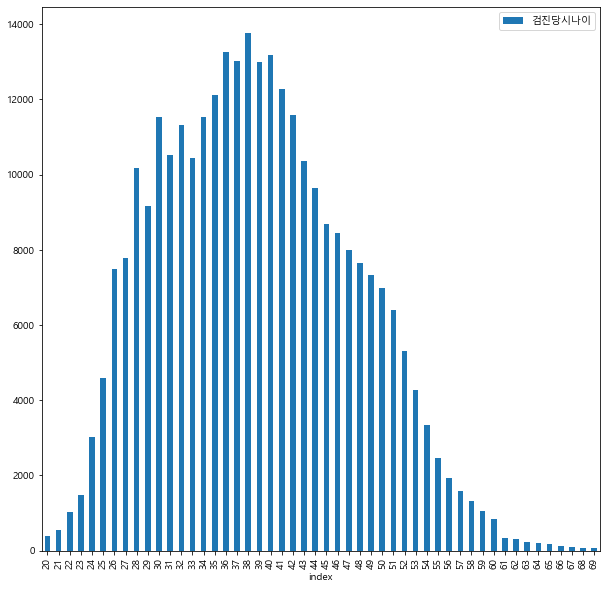

In [376]:
df_woman['검진당시나이'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='검진당시나이')

In [377]:
df_woman['검진당시나이'].value_counts().reset_index().sort_values('index')

,index,검진당시나이
40,20,398
39,21,542
37,22,1026
34,23,1486
30,24,3009
27,25,4578
22,26,7488
20,27,7778
14,28,10168
16,29,9176


# 검진항목 시각화

In [378]:
df_woman.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,백혈구(WBC),림프구 (Lymphocyte),분획호중구 (Seg Neutroph),호산구 (Eosinophil),단핵구 (Monocyte),호염기구 (Basophil),NLR,EBM,백혈구(WBC)_kde,NLR_kde,EBM_kde,kde_mean,target
count,300506.000000,3.005060e+05,3.005060e+05,300506.0,300506.000000,300506.000000,300506.000000,300506.000000,300506.000000,300506.000000,300506.000000,300506.000000,300506.000000,300506.000000,300506.000000,300506.000000,300506.000000,300506.000000
mean,2021.889287,4.837182e+05,1.454820e+06,2.0,38.796789,5.508065,34.248511,56.359114,2.238979,6.485814,0.611271,1.783599,9.328458,105.294622,101.840656,106.059924,104.066097,102.033880
std,1.586895,3.600781e+05,8.210632e+05,0.0,8.493031,1.339862,7.247129,7.219062,1.446836,1.533625,0.333250,0.617959,2.227966,41.492983,39.103325,39.267150,26.366594,13.186529
min,2010.000000,5.300000e+01,2.130000e+02,2.0,20.000000,1.800000,14.200000,33.100000,0.000000,2.500000,0.000000,0.610000,2.800000,0.010000,0.000000,0.000000,2.840000,51.000000
25%,2021.000000,2.143900e+05,6.227282e+05,2.0,32.000000,4.530000,29.200000,52.200000,1.100000,5.400000,0.400000,1.380000,7.800000,76.570000,82.330000,82.450000,87.870000,94.000000
50%,2022.000000,3.642855e+05,1.371072e+06,2.0,38.000000,5.360000,34.280000,56.340000,2.000000,6.400000,0.600000,1.780000,9.300000,117.980000,100.000000,114.550000,108.230000,104.000000
75%,2023.000000,8.011752e+05,2.173943e+06,2.0,45.000000,6.300000,39.000000,60.600000,2.900000,7.400000,0.800000,2.000000,10.700000,141.700000,136.190000,140.320000,123.910000,112.000000
max,2024.000000,1.473590e+06,2.871326e+06,2.0,69.000000,9.800000,54.500000,77.100000,7.650000,11.300000,1.650000,5.420000,20.200000,150.000000,150.000000,150.030000,149.990000,125.000000


<AxesSubplot:xlabel='검진당시나이'>

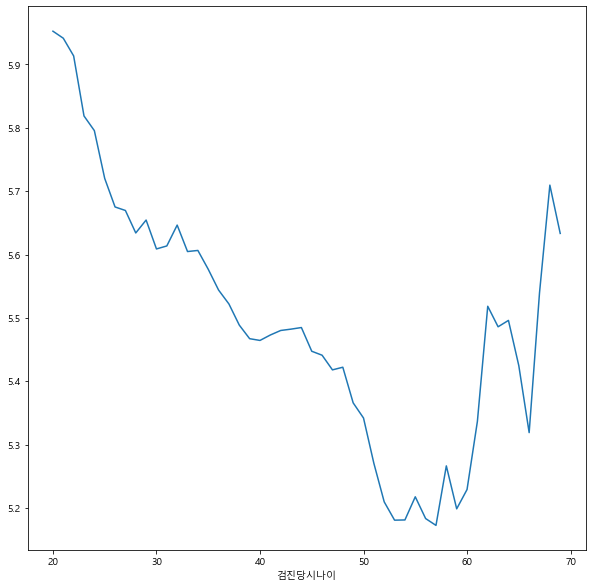

In [379]:
df_woman.groupby('검진당시나이').mean()[target_cols[0]].plot()

<AxesSubplot:xlabel='검진당시나이'>

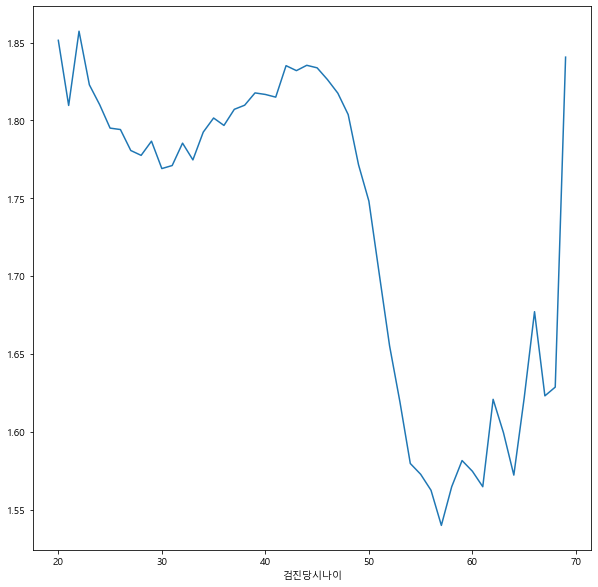

In [380]:
df_woman.groupby('검진당시나이').mean()[target_cols[1]].plot()

<AxesSubplot:xlabel='검진당시나이'>

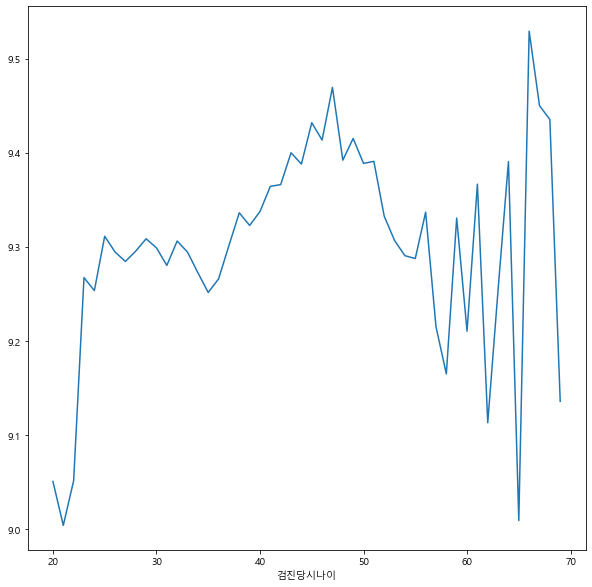

In [381]:
df_woman.groupby('검진당시나이').mean()[target_cols[2]].plot()

<AxesSubplot:xlabel='검진당시나이', ylabel='target'>

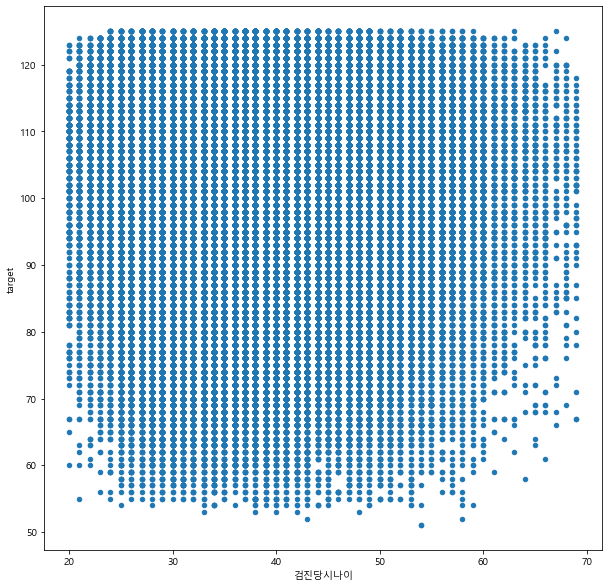

In [382]:
df_woman.plot.scatter(x='검진당시나이', y='target')

# 건강지수 Sampling

<AxesSubplot:xlabel='index'>

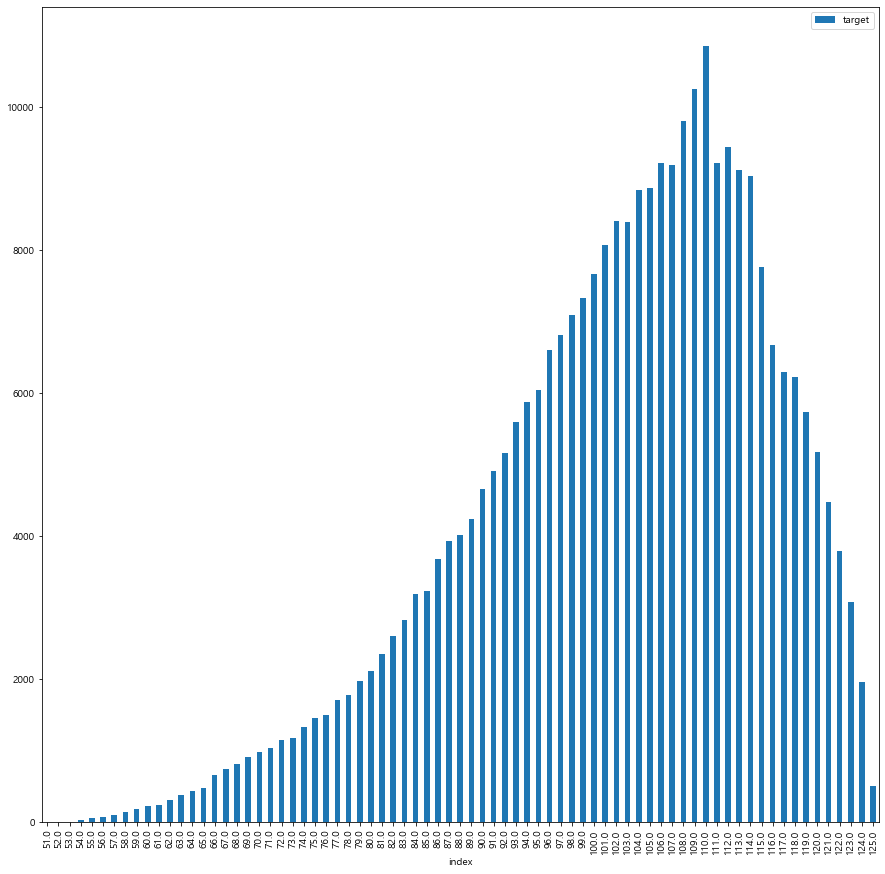

In [383]:
plt.rcParams["figure.figsize"] = (15, 15)
df_woman['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [384]:
df_woman['target'].value_counts().reset_index().sort_values('index')

,index,target
74,51.0,2
73,52.0,2
72,53.0,5
71,54.0,28
70,55.0,65
69,56.0,78
68,57.0,100
67,58.0,141
66,59.0,191
65,60.0,231


In [385]:
df_woman_sampling = pd.DataFrame()

# for target in range(int(df_woman['target'].min()), 100):
for target in range(50, 100):
    
#     print(target, 200 - target)
    left_len = len(df_woman[df_woman['target'] == target])
    right_len = len(df_woman[df_woman['target'] == (200 - target)])
    
#     print(target, left_len, right_len)
    
    if left_len >= right_len:
        if left_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == target].sample(left_len, replace=True, random_state=87)])
        if right_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == (200 - target)].sample(left_len, replace=True, random_state=87)])
    else:
        if left_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == target].sample(right_len, replace=True, random_state=87)])
        if right_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == (200 - target)].sample(right_len, replace=True, random_state=87)])   

df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == 100]])                    

In [386]:
# df_woman = df_woman_sampling.copy()

<AxesSubplot:xlabel='index'>

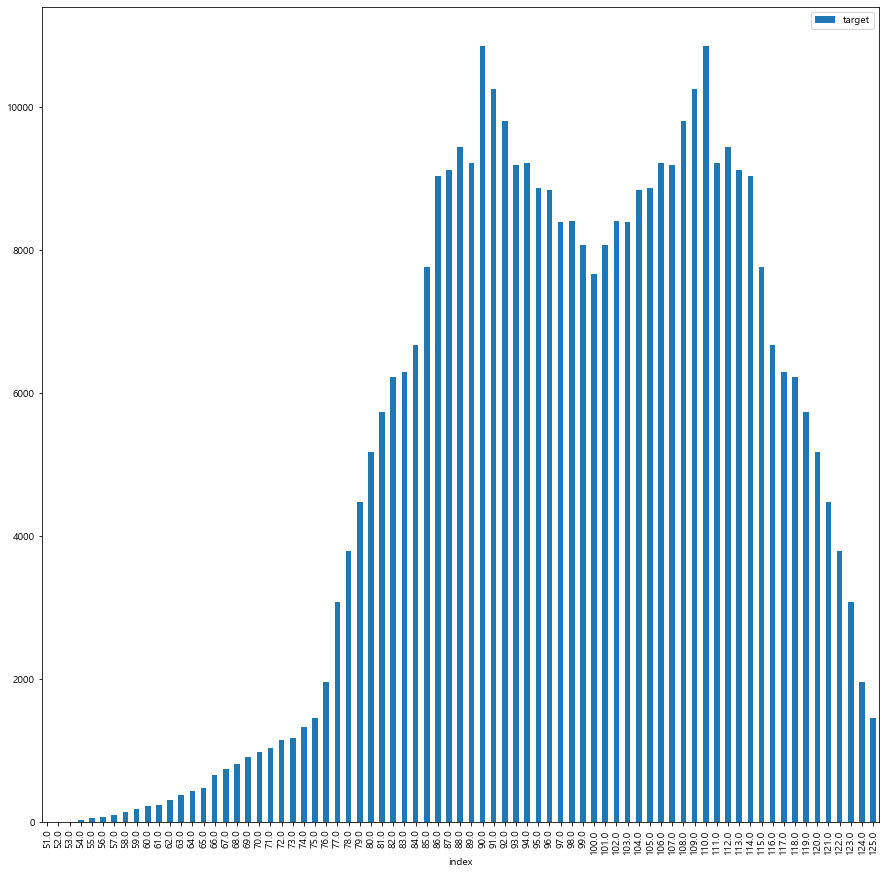

In [387]:
plt.rcParams["figure.figsize"] = (15, 15)
df_woman_sampling['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [388]:
df_woman_sampling['target'].value_counts().reset_index().sort_values('index')

,index,target
74,51.0,2
73,52.0,2
72,53.0,5
71,54.0,28
70,55.0,65
69,56.0,78
68,57.0,100
67,58.0,141
66,59.0,191
65,60.0,231


# 나이별 확인하기

In [389]:
# df_woman['검진당시나이'].value_counts()

In [390]:
# int(df_woman['검진당시나이'].value_counts().mean())

In [391]:
# df_woman['검진당시나이'].min()

In [392]:
# df_woman['검진당시나이'].max()

In [393]:
# df_woman.columns

In [394]:
# df_temp = None
# # sample_len = int(df_woman['검진당시나이'].value_counts().mean())
# # sample_len = 500
                 
# for age in range(df_woman['검진당시나이'].min(), df_woman['검진당시나이'].max()):
#     temp_ = df_woman[df_woman['검진당시나이'] == age].sample(n = sample_len, replace=True)
# #     df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(temp))
# #     print(df_impute.columns)
# #     df_impute.columns = df_man.columns
    
# #     np_imputed = mice(temp.values)
# #     np_imputed = fast_knn(temp.values, k=5)
# #     df_impute = pd.DataFrame(np_immputed)
# #     temp = df_impute
    
#     df_temp = pd.concat([df_temp, temp_])

In [395]:
# df_temp.info()

In [396]:
# df_temp.reset_index(drop=True, inplace=True)

In [397]:
# df_woman = df_temp.copy()

In [398]:
# df_woman['검진당시나이'].value_counts()

In [399]:
# df_woman[df_woman['검진당시나이']==20]

In [400]:
# df_woman[df_woman['검진당시나이']==20]['UID'].value_counts()

# model train

In [401]:
# train_columns = ['공복시혈당', '당화혈색소', '체질량지수', '허리둘레', '신장', '체중']
# train_columns = ['공복시혈당', '당화혈색소', '체질량지수', '허리둘레', '체중']

In [402]:
train_columns

['백혈구(WBC)', 'NLR', 'EBM']

In [403]:
# target_col = '검진당시나이'

In [404]:
target_col

'target'

## Min Max Scaling

In [405]:
from sklearn.preprocessing import MinMaxScaler

In [406]:
scaling_bool

False

In [407]:
if scaling_bool:
    scaler = MinMaxScaler()
    data_scaler = scaler.fit_transform(df_woman_sampling[train_columns])
    df_woman_scaled = pd.DataFrame(data=data_scaler, columns=train_columns)

In [408]:
if scaling_bool:
    X_train2, X_test2, y_train2, y_test2 = train_test_split(df_woman_scaled[train_columns], df_woman_sampling[target_col], test_size=0.25, random_state=87)
else:
    X_train2, X_test2, y_train2, y_test2 = train_test_split(df_woman_sampling[train_columns], df_woman_sampling[target_col], test_size=0.25, random_state=87)

## Linear Regression

In [409]:
# model2 = LinearRegression()

In [410]:
# model2.fit(X_train2, y_train2)

In [411]:
# model2.intercept_

In [412]:
# model2.coef_

## Randomized SearchCV, 파라미터 튜닝

In [413]:
model2 = XGBRegressor()

In [414]:
# A parameter grid for XGBoost
params = {
    'n_estimators':[500],
#     'min_child_weight':[4,5], 
#     'gamma':[i/10.0 for i in range(3,6)],  
#     'subsample':[i/10.0 for i in range(6,11)],
#     'colsample_bytree':[i/10.0 for i in range(6,11)], 
#     'max_depth': [2,3,4,6,7],
    'objective': ['reg:squarederror', 'reg:tweedie'],
    'booster': ['gbtree', 'gblinear'],
    'eval_metric': ['rmse'],
    'eta': [i/10.0 for i in range(3,6)],
}

In [415]:
# run randomized search
n_iter_search = 10

random_search = RandomizedSearchCV(model2, param_distributions=params,
                                   n_iter=n_iter_search, cv=5, scoring='neg_mean_squared_error')

In [416]:
import time
start = time.time()
random_search.fit(X_train2, y_train2)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))# best parameter

RandomizedSearchCV took 1340.76 seconds for 10 candidates parameter settings.


In [417]:
# best parameter
random_search.best_params_

{'objective': 'reg:tweedie',
 'n_estimators': 500,
 'eval_metric': 'rmse',
 'eta': 0.5,
 'booster': 'gbtree'}

In [418]:
# best score
random_search.best_score_

-7.002890600207738

In [419]:
model2 = random_search.best_estimator_
model2

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.5,
             eval_metric='rmse', gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.5, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=8,
             num_parallel_tree=1, objective='reg:tweedie', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

## Keras

In [420]:
# def build_model():
#     model = keras.Sequential([
#         layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
#         layers.Dense(64, activation='relu'),
#         layers.Dense(16, activation='relu'),
#         layers.Dense(4, activation='relu'),
#         layers.Dense(1)
#     ])

#     optimizer = keras.optimizers.RMSprop(0.001)
    
#     model.compile(loss='mse',
#                 optimizer=optimizer,
#                 metrics=['mae', 'mse'])
    
#     return model

In [421]:
# model = build_model()

In [422]:
# # 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
# class PrintDot(keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs):
#         if epoch % 10 == 0: print('')
#         print('.', end='')

# EPOCHS = 100

# # patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
# early_stop = EarlyStopping(monitor='val_loss', patience=10)

# history = model.fit(
#     X_train, y_train,
#     epochs=EPOCHS, validation_split=0.2, verbose=0,
#     callbacks=[early_stop, PrintDot()])
# #     callbacks=[PrintDot()])

In [423]:
# model.summary()

In [424]:
# hist = pd.DataFrame(history.history)
# hist['epoch'] = history.epoch
# hist.tail()

In [425]:
# def plot_history(history):
#     hist = pd.DataFrame(history.history)
#     hist['epoch'] = history.epoch

#     plt.figure(figsize=(8,12))

#     plt.subplot(2,1,1)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Abs Error [MPG]')
#     plt.plot(hist['epoch'], hist['mae'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
# #     plt.ylim([0,5])
#     plt.legend()

#     plt.subplot(2,1,2)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Square Error [$MPG^2$]')
#     plt.plot(hist['epoch'], hist['mse'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
# #     plt.ylim([0,20])
#     plt.legend()
#     plt.show()

In [426]:
# plot_history(history)

## pyTorch 신경망

In [427]:
np.shape(X_train)[1]

3

In [428]:
# class Regressor(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.fc1 = nn.Linear(np.shape(X_train)[1], 100) #첫 번째 레이어 
#         self.fc2 = nn.Linear(100, 50) #두 번째 레이어
#         self.fc3 = nn.Linear(50, 1) #출력 레이어 
# #         self.dropout = nn.Dropout(0.5) #연산 마다 50%의 노드를 랜덤하게 없앤다
# #         self.relu = nn.ReLU()
        
#     def forward(self, x):
#         x = F.relu(self.fc1(x)) #활성화 함수 적용                 
# #         x = self.dropout(F.relu(self.fc2(x))) #은닉층에서 전달할 때, 50% 를 dropout 
#         x = F.relu(self.fc2(x)) #활성화 함수 적용 
#         x = F.relu(self.fc3(x))
# #         x = self.fc1(x)
# #         x = self.fc2(x)
# #         x = self.fc3(x)
# #         x = self.relu(x)
#         return x

In [429]:
# model = Regressor()
# reg_loss = nn.MSELoss()
# # optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-7)
# optimizer = optim.Adam(model.parameters(), lr=0.001)

In [430]:
# epochs = 1000

In [431]:
# X_train  = torch.Tensor(X_train.to_numpy())
# X_test  = torch.Tensor(X_test.to_numpy())
# y_train  = torch.Tensor(y_train.to_numpy().reshape(-1, 1))
# y_test  = torch.Tensor(y_test.to_numpy().reshape(-1, 1))

In [432]:
# losses = []

# # 총 100번의 에포크 동안 모델 학습
# for epoch in range(epochs):
#     optimizer.zero_grad()      # 옵티마이저의 기울기 초기화
#     y_pred = model(X_train)          # 순전파 연산으로 예측값 계산
#     loss = reg_loss(y_pred, y_train)  # 손실 함수로 비용 계산
#     loss.backward()            # 역전파 연산으로 기울기 계산
#     optimizer.step()           # 옵티마이저를 통해 파라미터 업데이트

#     # 10번째 에포크마다 현재 에포크와 손실 값 출력
#     if epoch % 100 == 0:
#         print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, epochs, loss.item()))

#     # 손실 값을 리스트에 추가하여 추적
#     losses.append(loss.item())

In [433]:
# plt.plot(losses)

## coef 계산

In [434]:
# df_coef2 = pd.concat([pd.DataFrame(train_columns).reset_index(drop=True), pd.DataFrame(model2.coef_).reset_index(drop=True)], axis=1)

In [435]:
# df_coef2.columns = ['검사항목', 'coef']

In [436]:
# df_coef2['coef'] = df_coef2['coef'].round(4)

In [437]:
# df_coef2['abs_coef'] = df_coef2['coef'].abs()

In [438]:
# df_coef2.sort_values('abs_coef', ascending=False)

## Linear Regression Poly

In [439]:
# from sklearn.preprocessing import PolynomialFeatures
# poly2 = PolynomialFeatures(degree=1, include_bias=False)

In [440]:
# X_train2_poly = poly2.fit_transform(X_train2)
# X_test2_poly = poly2.fit_transform(X_test2)

In [441]:
# slr2 = LinearRegression()

In [442]:
# slr2.fit(X_train2_poly, y_train2)

In [443]:
# np.shape(X_train2)

In [444]:
# np.shape(X_train2_poly)

In [445]:
# np.shape(X_test2)

In [446]:
# np.shape(X_test2_poly)

In [447]:
# y_pred2_poly = slr2.predict(X_test2_poly)

In [448]:
# '''
# 성능 평가
# '''
# # MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
# print('MAE :',mean_absolute_error(y_test2, y_pred2_poly))
# # MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
# print('MSE :', mean_squared_error(y_test2, y_pred2_poly))
# #  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
# print('RMSE :', np.sqrt(mean_squared_error(y_test2, y_pred2_poly)))

In [449]:
# from sklearn.metrics import r2_score
# r2_score(y_test2, y_pred2_poly)

# model save

In [450]:
import pickle
with open(model_path_woman,'wb') as f:
    pickle.dump(model2, f)

In [451]:
import pickle
with open(model_path_woman, 'rb') as f:
    model2 = pickle.load(f)

# 성능 평가

## pyTorch 예측

In [452]:
if pyTorch_bool:
    # Get predictions, 
    with torch.no_grad():
        model2.eval()
        y_pred2 = model2(X_test2)
        y_pred2 = y_pred2.numpy()

## XGBRegressor

In [453]:
if XGB_bool:
    y_pred2 = model2.predict(X_test2)

In [454]:
'''
성능 평가
'''
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
print('MAE :',mean_absolute_error(y_test2, y_pred2))
# MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
print('MSE :', mean_squared_error(y_test2, y_pred2))
#  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
print('RMSE :', np.sqrt(mean_squared_error(y_test2, y_pred2)))

MAE : 1.8594253253082207
MSE : 6.792058789848559
RMSE : 2.6061578597330897


In [455]:
from sklearn.metrics import r2_score
r2_score(y_test2, y_pred2)

0.9621515815127091

In [456]:
model2.score(X_test2, y_test2)

0.9621515815127091

## feature importance

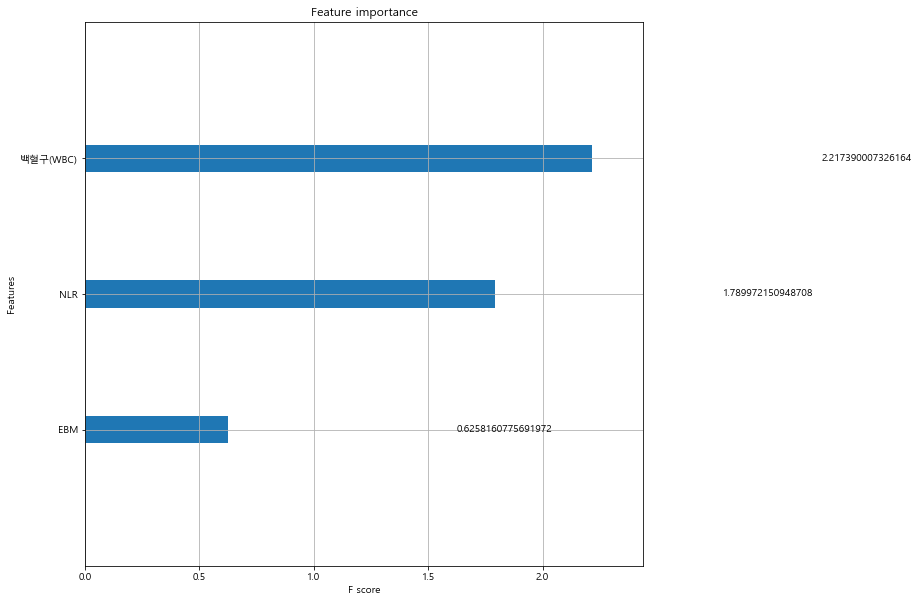

In [457]:
if XGB_bool:
    plt.rcParams["figure.figsize"] = (10, 10)
    xgboost.plot_importance(model2, importance_type='gain')

In [458]:
model2.feature_importances_

array([0.47858936, 0.38633782, 0.13507274], dtype=float32)

In [459]:
df_feature2 = pd.concat([pd.DataFrame(train_columns), pd.DataFrame(model2.feature_importances_)], axis=1)
df_feature2.columns = ['columns', 'feature_importance']

In [460]:
df_feature2.sort_values('feature_importance', ascending=False)

,columns,feature_importance
0,백혈구(WBC),0.478589
1,NLR,0.386338
2,EBM,0.135073


# 실제나이 - 예측나이 결과

In [461]:
df_test2 = pd.concat([pd.DataFrame(y_test2).reset_index(drop=True), pd.DataFrame(y_pred2).reset_index(drop=True)], axis=1)

In [462]:
df_test2.head()

,target,0
0,84.0,85.846878
1,108.0,104.030571
2,118.0,115.371574
3,113.0,110.650444
4,108.0,108.411232


In [463]:
df_test2.columns

Index(['target', 0], dtype='object')

In [464]:
df_test2.columns = ['실제지수', '예측지수']

In [465]:
df_test2['diff'] = df_test2['예측지수'] - df_test2['실제지수']

In [466]:
df_test2.head()

,실제지수,예측지수,diff
0,84.0,85.846878,1.846878
1,108.0,104.030571,-3.969429
2,118.0,115.371574,-2.628426
3,113.0,110.650444,-2.349556
4,108.0,108.411232,0.411232


In [467]:
df_test2['diff_int'] = df_test2['diff'].round(0)

In [468]:
len(df_test2)

95528

In [469]:
df_test2.head()

,실제지수,예측지수,diff,diff_int
0,84.0,85.846878,1.846878,2.0
1,108.0,104.030571,-3.969429,-4.0
2,118.0,115.371574,-2.628426,-3.0
3,113.0,110.650444,-2.349556,-2.0
4,108.0,108.411232,0.411232,0.0


<AxesSubplot:>

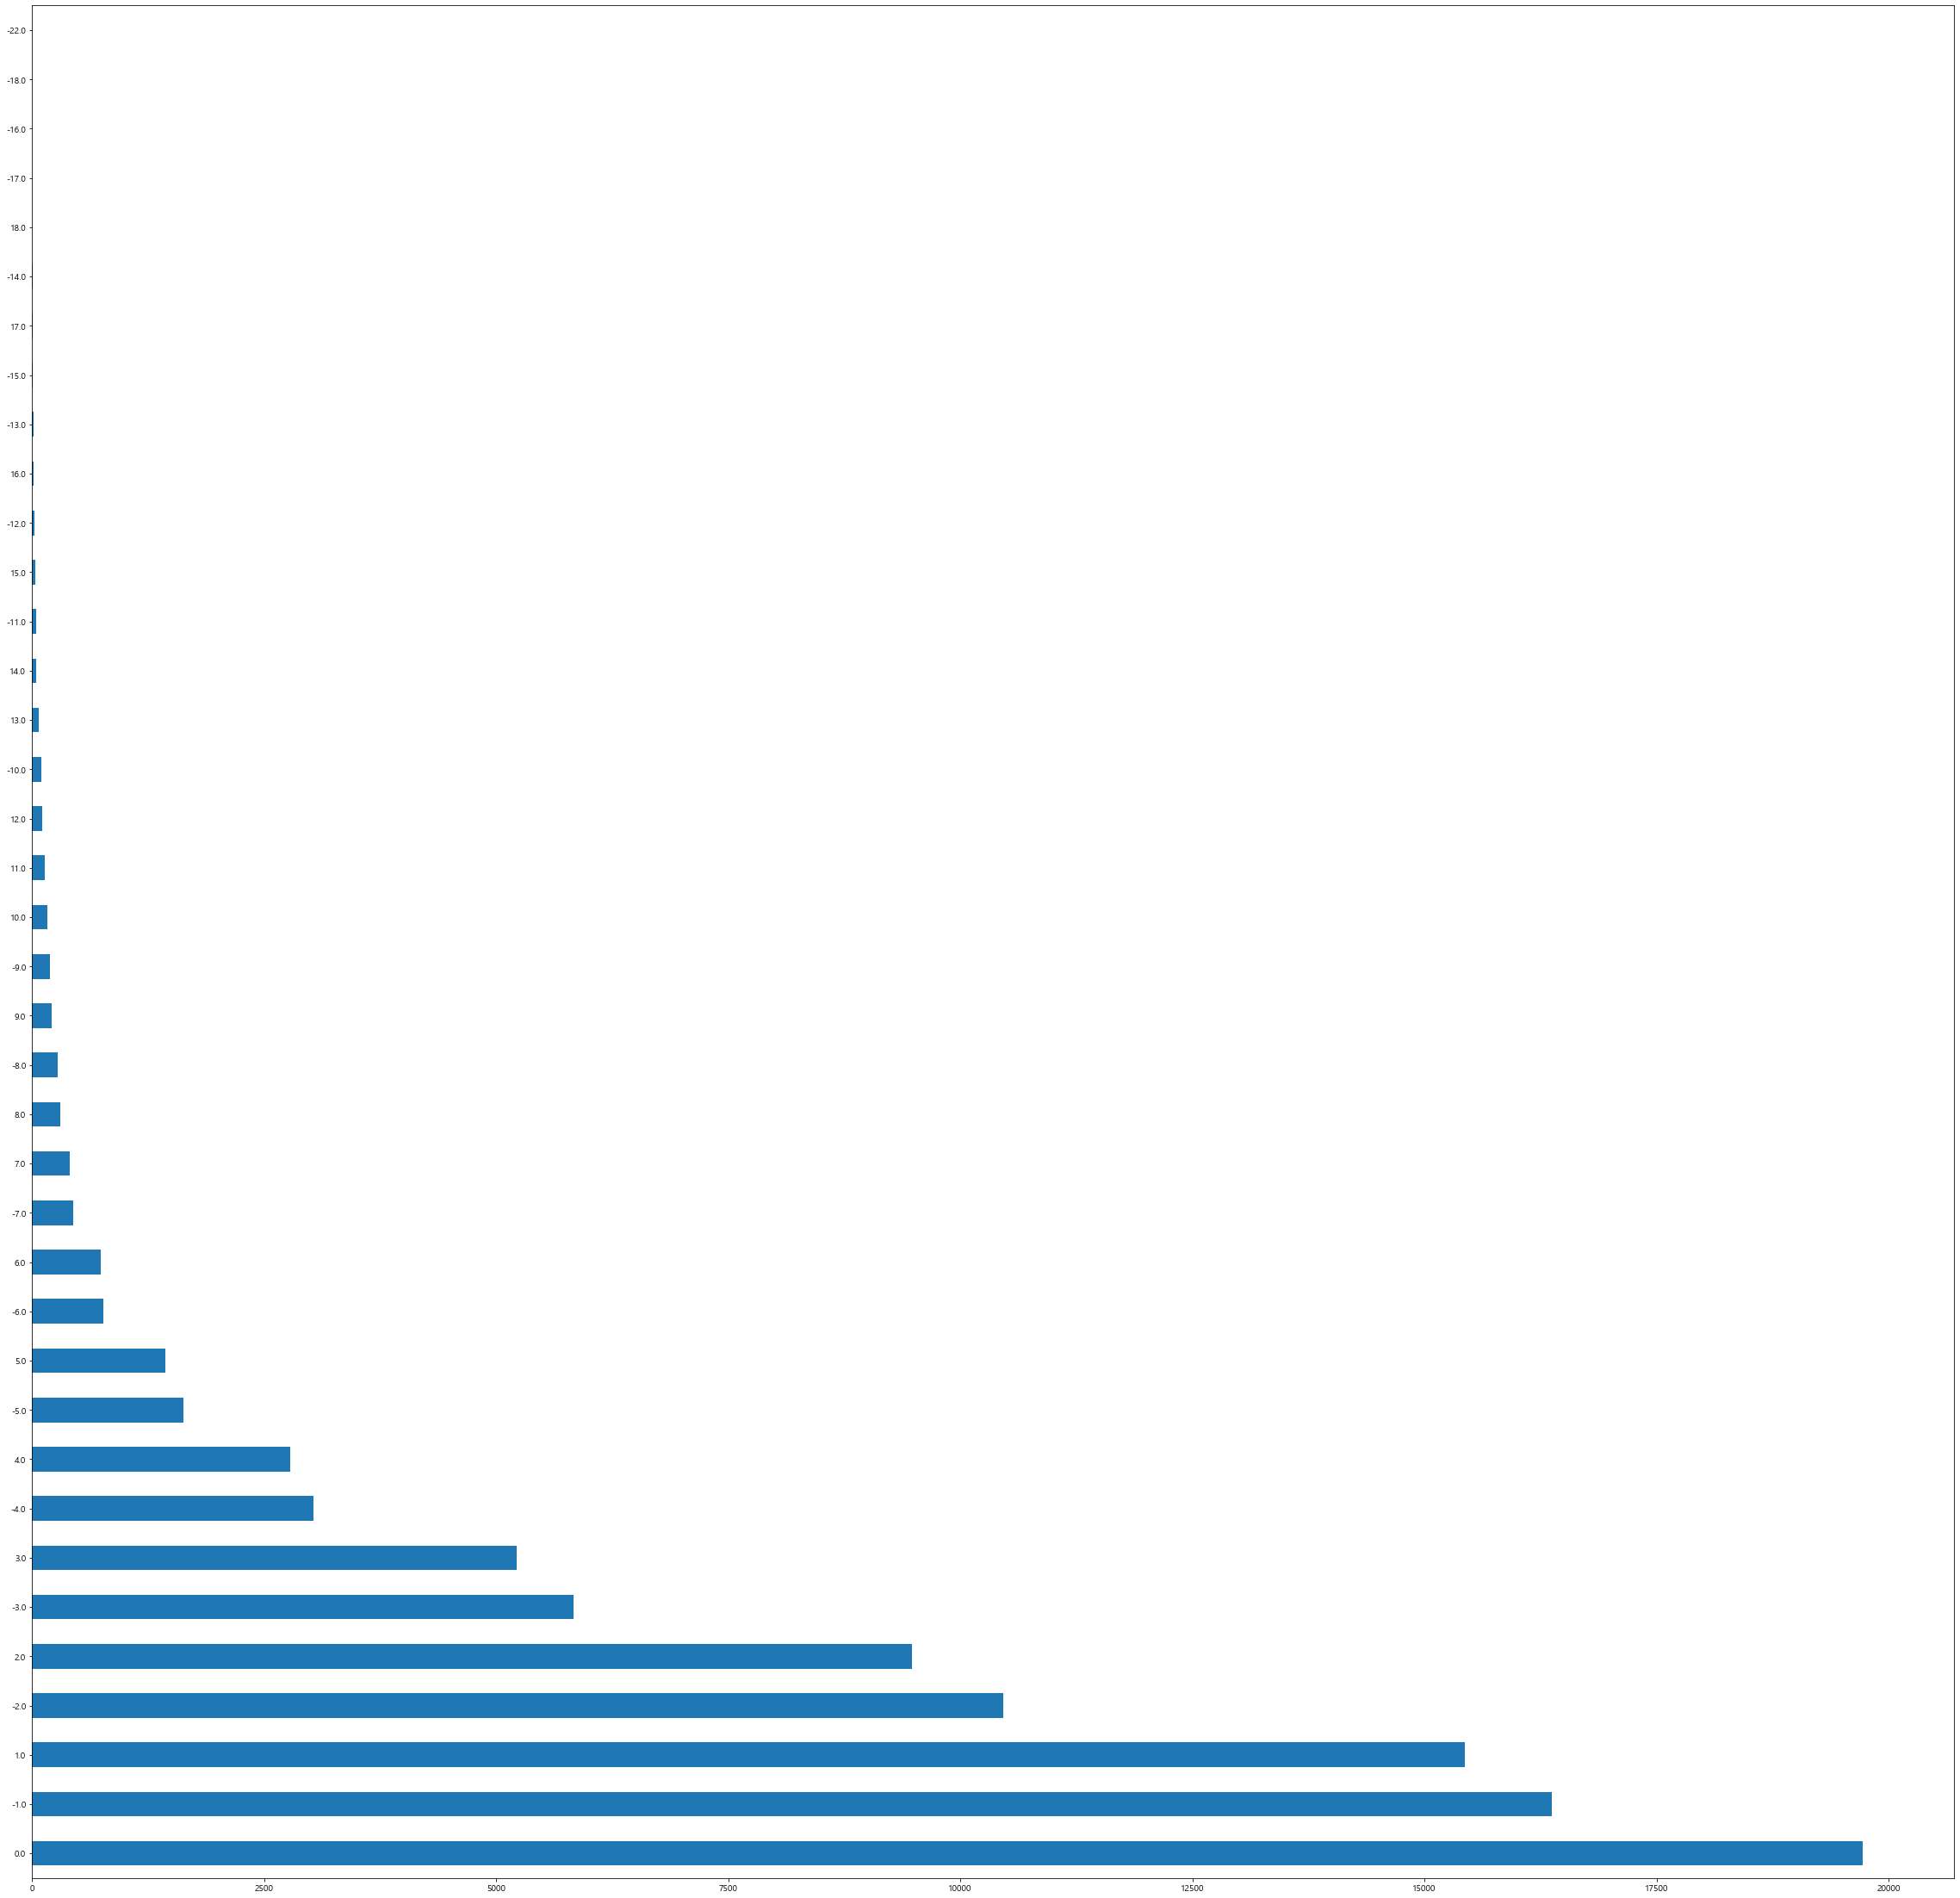

In [470]:
plt.figure(figsize=(40, 40))
df_test2['diff_int'].value_counts().plot(kind='barh')
# plt.savefig('./output/png/숙취나이_결측치제거_20대_여자.png')

# 예측 나이 분포

In [471]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model2.eval()
        X_train_pred2 = model2(X_train2)
        X_train_pred2 = X_train_pred2.numpy()

    df_train2 = pd.DataFrame(X_train_pred2).reset_index(drop=True)
    y_test2 = pd.DataFrame(y_test2.numpy())

In [472]:
if XGB_bool:
    df_train2 = pd.DataFrame(model2.predict(X_train2)).reset_index(drop=True)

In [473]:
df_train2 = pd.DataFrame(model2.predict(X_train2)).reset_index(drop=True)

In [474]:
df_train2.round(0).value_counts()

109.0    8353
110.0    7878
89.0     7726
90.0     7718
108.0    7699
111.0    7684
92.0     7598
112.0    7419
91.0     7388
93.0     7233
113.0    7139
107.0    7100
87.0     7052
88.0     7038
106.0    7029
94.0     7007
95.0     6791
86.0     6753
114.0    6725
104.0    6697
96.0     6661
97.0     6508
103.0    6491
105.0    6417
102.0    6315
101.0    6188
98.0     6180
99.0     6129
85.0     5810
100.0    5751
84.0     5259
115.0    5257
116.0    5073
117.0    4914
83.0     4764
118.0    4644
82.0     4591
119.0    4553
81.0     4363
120.0    3725
80.0     3598
121.0    3289
79.0     3168
122.0    2594
78.0     2539
123.0    2068
77.0     1874
76.0     1385
75.0     1125
124.0    1108
74.0      897
73.0      884
72.0      835
71.0      699
70.0      674
69.0      663
68.0      593
67.0      566
66.0      457
65.0      348
64.0      287
63.0      265
62.0      239
60.0      179
61.0      177
59.0      151
58.0       92
57.0       68
56.0       60
55.0       41
54.0       23
125.0 

In [475]:
y_test2.value_counts()

110.0    2713
90.0     2661
91.0     2537
109.0    2480
92.0     2463
108.0    2448
88.0     2421
112.0    2401
94.0     2370
89.0     2335
111.0    2303
106.0    2290
93.0     2279
107.0    2275
96.0     2272
87.0     2251
86.0     2245
113.0    2241
95.0     2232
104.0    2218
114.0    2211
105.0    2182
97.0     2115
98.0     2098
101.0    2088
103.0    2063
102.0    2062
99.0     2048
115.0    2030
100.0    1917
85.0     1906
116.0    1682
84.0     1666
83.0     1579
82.0     1578
117.0    1549
118.0    1539
119.0    1435
81.0     1427
80.0     1278
120.0    1264
121.0    1127
79.0     1105
122.0     969
78.0      956
77.0      793
123.0     784
124.0     502
76.0      425
125.0     398
75.0      378
73.0      344
72.0      315
74.0      314
71.0      258
70.0      228
68.0      220
69.0      216
67.0      170
66.0      169
64.0      136
65.0      123
63.0      100
62.0       77
61.0       67
60.0       56
59.0       45
58.0       35
57.0       25
56.0       25
55.0       12
54.0  

In [476]:
df_plot = pd.DataFrame(y_test2.value_counts())

In [477]:
df_plot.columns = ['count']

In [478]:
df_plot.reset_index(inplace=True)

In [479]:
df_plot = df_plot.sort_values('index', ascending=True)

In [480]:
df_plot.set_index('index', inplace=True)

<AxesSubplot:xlabel='index'>

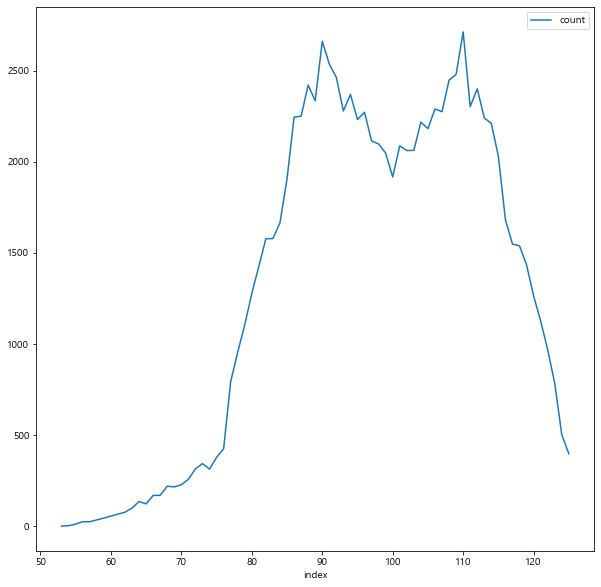

In [481]:
df_plot.plot()

In [482]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model2.eval()
        X_test_pred2 = model2(X_test2)
        X_test_pred2 = X_test_pred2.numpy()
    df_test2 = pd.DataFrame(X_test_pred2).reset_index(drop=True)

In [483]:
if XGB_bool:
    df_test2 = pd.DataFrame(model2.predict(X_test2)).reset_index(drop=True)

In [484]:
df_test2.round(0).value_counts()

109.0    2674
90.0     2663
110.0    2569
108.0    2545
89.0     2507
92.0     2493
111.0    2467
112.0    2427
93.0     2419
91.0     2419
107.0    2410
94.0     2396
113.0    2395
87.0     2352
106.0    2340
88.0     2322
95.0     2299
114.0    2280
96.0     2256
97.0     2255
104.0    2248
86.0     2170
102.0    2158
103.0    2149
105.0    2128
98.0     2096
99.0     2086
85.0     2035
101.0    2025
100.0    1933
115.0    1841
84.0     1704
116.0    1634
117.0    1625
83.0     1621
118.0    1516
82.0     1508
119.0    1506
81.0     1478
120.0    1181
80.0     1177
121.0    1087
79.0     1019
122.0     911
78.0      836
123.0     738
77.0      579
76.0      481
124.0     388
75.0      350
74.0      332
73.0      305
71.0      279
72.0      271
69.0      223
68.0      200
70.0      197
67.0      173
66.0      156
65.0      137
64.0      120
63.0       88
62.0       88
61.0       68
60.0       50
59.0       44
58.0       39
57.0       26
56.0       21
55.0        7
54.0        4
125.0 

In [485]:
df_plot2 = pd.DataFrame(df_test2.round(0).value_counts())

In [486]:
df_plot2.columns = ['count']

In [487]:
df_plot2.reset_index(inplace=True)

In [488]:
df_plot2

,0,count
0,109.0,2674
1,90.0,2663
2,110.0,2569
3,108.0,2545
4,89.0,2507
5,92.0,2493
6,111.0,2467
7,112.0,2427
8,93.0,2419
9,91.0,2419


In [489]:
df_plot2 = df_plot2.sort_values(0, ascending=True)

In [490]:
df_plot2.set_index(0, inplace=True)

In [491]:
df_plot2

,count
0,
51.0,1
54.0,4
55.0,7
56.0,21
57.0,26
58.0,39
59.0,44
60.0,50
61.0,68


<AxesSubplot:xlabel='0'>

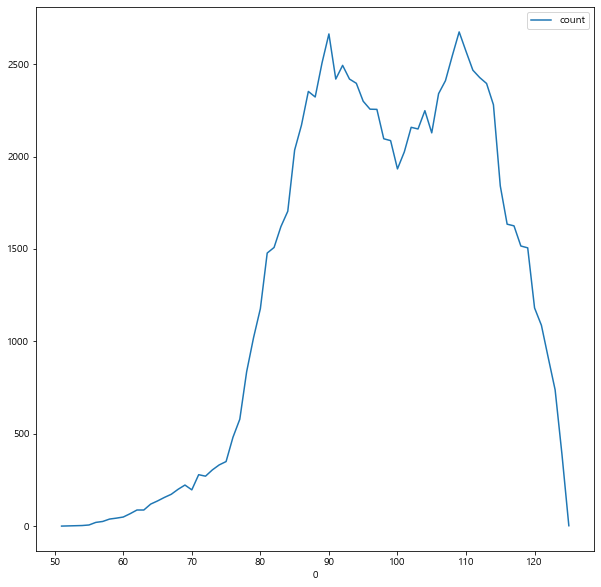

In [492]:
df_plot2.plot()

# 시각화

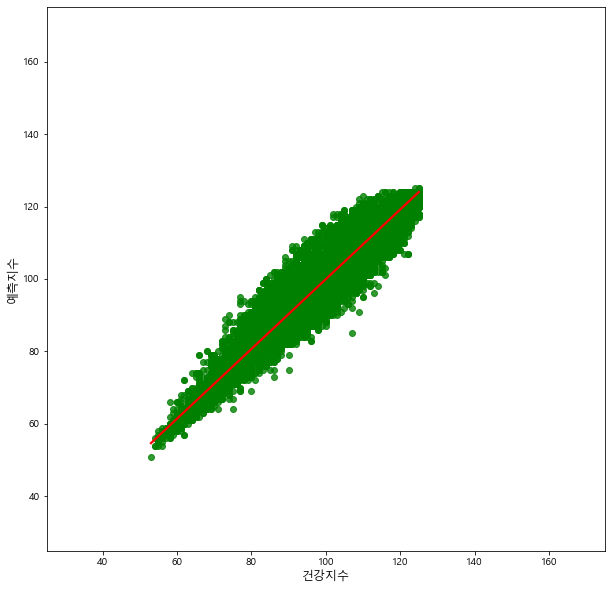

In [493]:
plt.rcParams["figure.figsize"] = (10, 10)
df_scatter = pd.concat([pd.DataFrame(y_test2).reset_index(drop=True), df_test2.round(0)], axis = 1)
df_scatter.columns = ['건강지수', '예측지수']

import seaborn as sns

# plt.figure(figsize=(10, 10))
# plt.scatter(df_scatterx='나이', y='예측나이', s=9, cmap='Reds', color='green', trendline="ols")
# plt.colorbar()
# sns.scatterplot(x=df_scatter['나이'], y=df_scatter['예측나이'], color='green')
sns.regplot(x=df_scatter['건강지수'], y=df_scatter['예측지수'], scatter_kws={'color':'green'}, line_kws={'color':'red'})
plt.xlabel('건강지수', fontsize=12)
plt.ylabel('예측지수', fontsize=12)
plt.xlim([25, 175])
plt.ylim([25, 175])
plt.show()

# 여성 데이터 전체 계산

In [494]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,백혈구(WBC),림프구 (Lymphocyte),분획호중구 (Seg Neutroph),호산구 (Eosinophil),단핵구 (Monocyte),호염기구 (Basophil),NLR,EBM,백혈구(WBC)_kde,NLR_kde,EBM_kde,kde_mean,target
0,2021,53,2632765,2,26,4.77,46.1,44.5,1.9,7.1,0.4,0.97,9.4,130.14,78.96,146.13,112.87,106.0
1,2024,53,2658222,2,29,4.74,45.8,45.4,2.1,6.3,0.4,0.99,8.8,141.43,90.33,149.18,122.54,111.0
2,2020,54,497669,2,30,5.76,25.6,66.2,1.4,5.3,0.4,2.59,7.1,130.49,37.93,104.51,88.27,94.0
3,2022,54,1319859,2,32,6.10,30.3,62.5,2.4,3.7,1.1,2.06,7.2,118.47,89.34,125.57,108.24,104.0
4,2024,54,2750990,2,34,6.53,26.7,66.8,1.3,4.2,0.3,2.50,5.8,76.00,42.96,54.27,58.44,79.0


In [495]:
df_woman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300506 entries, 0 to 300505
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   검진년도                  300506 non-null  int64  
 1   UID                   300506 non-null  int64  
 2   CU_REC_ID             300506 non-null  int64  
 3   SEX                   300506 non-null  int64  
 4   검진당시나이                300506 non-null  int64  
 5   백혈구(WBC)              300506 non-null  float64
 6   림프구 (Lymphocyte)      300506 non-null  float64
 7   분획호중구 (Seg Neutroph)  300506 non-null  float64
 8   호산구 (Eosinophil)      300506 non-null  float64
 9   단핵구 (Monocyte)        300506 non-null  float64
 10  호염기구 (Basophil)       300506 non-null  float64
 11  NLR                   300506 non-null  float64
 12  EBM                   300506 non-null  float64
 13  백혈구(WBC)_kde          300506 non-null  float64
 14  NLR_kde               300506 non-null  float64
 15  

In [496]:
df_woman[df_woman['UID'] == 196909]

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,백혈구(WBC),림프구 (Lymphocyte),분획호중구 (Seg Neutroph),호산구 (Eosinophil),단핵구 (Monocyte),호염기구 (Basophil),NLR,EBM,백혈구(WBC)_kde,NLR_kde,EBM_kde,kde_mean,target
65855,2021,196909,2495703,2,28,6.21,37.7,51.2,1.6,8.4,1.1,1.36,11.1,120.62,147.15,86.12,124.33,112.0
65856,2022,196909,2495702,2,29,8.78,24.5,67.9,0.3,6.7,0.6,2.77,7.6,19.34,30.22,119.66,43.76,72.0
65857,2023,196909,2495700,2,30,7.73,32.5,60.6,0.8,5.6,0.5,1.86,6.9,36.32,112.70,96.03,78.81,89.0
65858,2024,196909,2495697,2,31,5.75,31.5,60.5,0.7,6.8,0.5,1.92,8.0,142.14,101.02,137.26,124.72,112.0


In [497]:
if scaling_bool:
    df_pred2 = df_woman_scaled.copy()
else:
    df_pred2 = df_woman.copy()

In [498]:
len(df_pred2)

300506

In [499]:
df_pred2.reset_index(drop=True, inplace=True)

In [500]:
X_test2

,백혈구(WBC),NLR,EBM
92373,7.03,2.45,10.70
209130,4.25,1.78,9.35
188404,5.49,1.60,11.30
280470,5.80,1.12,10.40
117981,4.32,1.23,11.40
...,...,...,...
234397,6.50,3.25,7.80
166161,4.73,1.09,11.00
5334,5.20,1.75,9.70
151027,4.20,1.46,14.00


In [501]:
df_pred2.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '백혈구(WBC)',
       '림프구 (Lymphocyte)', '분획호중구 (Seg Neutroph)', '호산구 (Eosinophil)',
       '단핵구 (Monocyte)', '호염기구 (Basophil)', 'NLR', 'EBM', '백혈구(WBC)_kde',
       'NLR_kde', 'EBM_kde', 'kde_mean', 'target'],
      dtype='object')

In [502]:
df_pred2[train_columns]

,백혈구(WBC),NLR,EBM
0,4.77,0.97,9.4
1,4.74,0.99,8.8
2,5.76,2.59,7.1
3,6.10,2.06,7.2
4,6.53,2.50,5.8
...,...,...,...
300501,4.61,1.61,8.9
300502,6.43,1.50,7.7
300503,5.89,1.19,11.0
300504,7.67,2.09,7.2


In [503]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model2.eval()
        pred_data2 = model2(torch.Tensor(df_pred2[train_columns].to_numpy()))
        pred_data2 = pred_data2.numpy()

In [504]:
if XGB_bool:
    # Get predictions
    # pred_data = model.predict(df_pred[train_columns])
    pred_data2 = model2.predict(df_pred2[train_columns])

In [505]:
pred_data2

array([109.835434, 112.09738 ,  94.858185, ..., 110.84171 ,  87.52904 ,
       115.69363 ], dtype=float32)

In [506]:
df_output2 = pd.concat([df_pred2, pd.DataFrame(pred_data2, columns=['예측지수']).reset_index(drop=True)], axis=1)

In [507]:
if scaling_bool:
    df_output2 = pd.concat([df_woman[['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이']], df_output2], axis=1)

In [508]:
df_output2.head(10)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,백혈구(WBC),림프구 (Lymphocyte),분획호중구 (Seg Neutroph),호산구 (Eosinophil),단핵구 (Monocyte),호염기구 (Basophil),NLR,EBM,백혈구(WBC)_kde,NLR_kde,EBM_kde,kde_mean,target,예측지수
0,2021,53,2632765,2,26,4.77,46.1,44.5,1.9,7.1,0.4,0.97,9.4,130.14,78.96,146.13,112.87,106.0,109.835434
1,2024,53,2658222,2,29,4.74,45.8,45.4,2.1,6.3,0.4,0.99,8.8,141.43,90.33,149.18,122.54,111.0,112.097382
2,2020,54,497669,2,30,5.76,25.6,66.2,1.4,5.3,0.4,2.59,7.1,130.49,37.93,104.51,88.27,94.0,94.858185
3,2022,54,1319859,2,32,6.10,30.3,62.5,2.4,3.7,1.1,2.06,7.2,118.47,89.34,125.57,108.24,104.0,101.052742
4,2024,54,2750990,2,34,6.53,26.7,66.8,1.3,4.2,0.3,2.50,5.8,76.00,42.96,54.27,58.44,79.0,80.771370
5,2022,56,1351361,2,33,4.31,36.0,55.0,2.0,6.0,1.0,1.53,9.0,121.75,149.23,140.09,136.41,118.0,118.044075
6,2023,56,2032999,2,34,4.60,41.0,48.0,4.0,6.0,1.0,1.17,11.0,128.41,128.74,93.83,121.63,111.0,112.554260
7,2021,59,701026,2,29,4.95,41.0,51.0,1.0,6.0,1.0,1.24,8.0,141.21,138.94,136.15,139.29,120.0,120.303139
8,2022,59,1376992,2,30,4.78,39.0,52.0,2.0,6.0,1.0,1.33,9.0,147.69,149.60,148.58,148.63,124.0,122.007484
9,2019,69,1484771,2,33,5.86,31.6,59.1,1.9,6.7,0.7,1.87,9.3,129.39,124.32,134.77,128.44,114.0,113.984451


## 예측지수 성능평가

In [509]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output2['target'], df_output2['예측지수'])

1.8946081727802058

# target으로 나이 계산

In [510]:
df_output2['예측나이'] = ((100 - df_output2['예측지수']) / 5) + df_output2['검진당시나이']
df_output2['예측나이'] = df_output2['예측나이'].round(2)

In [511]:
df_output2.head(30)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,백혈구(WBC),림프구 (Lymphocyte),분획호중구 (Seg Neutroph),호산구 (Eosinophil),단핵구 (Monocyte),호염기구 (Basophil),NLR,EBM,백혈구(WBC)_kde,NLR_kde,EBM_kde,kde_mean,target,예측지수,예측나이
0,2021,53,2632765,2,26,4.77,46.1,44.50,1.9,7.1,0.4,0.97,9.4,130.14,78.96,146.13,112.87,106.0,109.835434,24.03
1,2024,53,2658222,2,29,4.74,45.8,45.40,2.1,6.3,0.4,0.99,8.8,141.43,90.33,149.18,122.54,111.0,112.097382,26.58
2,2020,54,497669,2,30,5.76,25.6,66.20,1.4,5.3,0.4,2.59,7.1,130.49,37.93,104.51,88.27,94.0,94.858185,31.03
3,2022,54,1319859,2,32,6.10,30.3,62.50,2.4,3.7,1.1,2.06,7.2,118.47,89.34,125.57,108.24,104.0,101.052742,31.79
4,2024,54,2750990,2,34,6.53,26.7,66.80,1.3,4.2,0.3,2.50,5.8,76.00,42.96,54.27,58.44,79.0,80.771370,37.85
5,2022,56,1351361,2,33,4.31,36.0,55.00,2.0,6.0,1.0,1.53,9.0,121.75,149.23,140.09,136.41,118.0,118.044075,29.39
6,2023,56,2032999,2,34,4.60,41.0,48.00,4.0,6.0,1.0,1.17,11.0,128.41,128.74,93.83,121.63,111.0,112.554260,31.49
7,2021,59,701026,2,29,4.95,41.0,51.00,1.0,6.0,1.0,1.24,8.0,141.21,138.94,136.15,139.29,120.0,120.303139,24.94
8,2022,59,1376992,2,30,4.78,39.0,52.00,2.0,6.0,1.0,1.33,9.0,147.69,149.60,148.58,148.63,124.0,122.007484,25.60
9,2019,69,1484771,2,33,5.86,31.6,59.10,1.9,6.7,0.7,1.87,9.3,129.39,124.32,134.77,128.44,114.0,113.984451,30.20


## 예측나이 성능평가

In [512]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output2['검진당시나이'], df_output2['예측나이'])

2.161452649863896

# 최종 산출

In [513]:
df_output2.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,백혈구(WBC),림프구 (Lymphocyte),분획호중구 (Seg Neutroph),호산구 (Eosinophil),단핵구 (Monocyte),호염기구 (Basophil),NLR,EBM,백혈구(WBC)_kde,NLR_kde,EBM_kde,kde_mean,target,예측지수,예측나이
0,2021,53,2632765,2,26,4.77,46.1,44.5,1.9,7.1,0.4,0.97,9.4,130.14,78.96,146.13,112.87,106.0,109.835434,24.03
1,2024,53,2658222,2,29,4.74,45.8,45.4,2.1,6.3,0.4,0.99,8.8,141.43,90.33,149.18,122.54,111.0,112.097382,26.58
2,2020,54,497669,2,30,5.76,25.6,66.2,1.4,5.3,0.4,2.59,7.1,130.49,37.93,104.51,88.27,94.0,94.858185,31.03
3,2022,54,1319859,2,32,6.10,30.3,62.5,2.4,3.7,1.1,2.06,7.2,118.47,89.34,125.57,108.24,104.0,101.052742,31.79
4,2024,54,2750990,2,34,6.53,26.7,66.8,1.3,4.2,0.3,2.50,5.8,76.00,42.96,54.27,58.44,79.0,80.771370,37.85


# DataMart csv

In [514]:
df_copy = df.copy()

In [515]:
df_copy.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,백혈구(WBC),림프구 (Lymphocyte),분획호중구 (Seg Neutroph),호산구 (Eosinophil),단핵구 (Monocyte),호염기구 (Basophil)
0,2010,7282,2520,1,42,6.56,46.5,42.0,1.1,9.9,0.5
1,2010,7490,3638,1,39,6.50,41.0,48.0,3.0,8.0,0.0
2,2010,7915,3997,1,36,5.14,22.8,68.3,2.1,6.2,0.6
3,2010,8056,4745,1,42,7.00,39.0,50.0,3.0,8.0,0.0
4,2010,8457,3929,1,38,7.01,46.2,45.3,2.4,6.0,0.1


In [516]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 11 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   검진년도                  1213899 non-null  int64  
 1   UID                   1213899 non-null  int64  
 2   CU_REC_ID             1213899 non-null  int64  
 3   SEX                   1213899 non-null  int64  
 4   검진당시나이                1213899 non-null  int64  
 5   백혈구(WBC)              1114257 non-null  float64
 6   림프구 (Lymphocyte)      1084766 non-null  float64
 7   분획호중구 (Seg Neutroph)  883969 non-null   float64
 8   호산구 (Eosinophil)      1075133 non-null  float64
 9   단핵구 (Monocyte)        1076836 non-null  float64
 10  호염기구 (Basophil)       1061163 non-null  float64
dtypes: float64(6), int64(5)
memory usage: 101.9 MB


In [517]:
minimums

[1.7999999999999998,
 14.150000000000004,
 33.1,
 -2.35,
 2.4999999999999996,
 -0.35]

In [518]:
maximums

[9.8, 54.55, 77.1, 7.65, 11.3, 1.65]

In [519]:
train_columns

['백혈구(WBC)', 'NLR', 'EBM']

In [520]:
target_cols_org

['백혈구(WBC)',
 '림프구 (Lymphocyte)',
 '분획호중구 (Seg Neutroph)',
 '호산구 (Eosinophil)',
 '단핵구 (Monocyte)',
 '호염기구 (Basophil)']

In [521]:
for idx, col in enumerate(target_cols_org):
    df_copy.loc[df_copy[col] < minimums[idx], col] = minimums[idx]
    df_copy.loc[df_copy[col] > maximums[idx], col] = maximums[idx]

## NLR

In [522]:
df_copy['NLR'] = df_copy['분획호중구 (Seg Neutroph)'] / df_copy['림프구 (Lymphocyte)']
df_copy['NLR'] = df_copy['NLR'].round(2)

## EBM

In [523]:
df_copy['EBM'] = df_copy['호산구 (Eosinophil)'] + df_copy['단핵구 (Monocyte)'] + df_copy['호염기구 (Basophil)']
df_copy['EBM'] = df_copy['EBM'].round(2)

In [524]:
df_woman_csv = df_copy[df_copy['SEX'] == 2]
len(df_woman_csv)

448440

In [525]:
df_woman_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,백혈구(WBC),림프구 (Lymphocyte),분획호중구 (Seg Neutroph),호산구 (Eosinophil),단핵구 (Monocyte),호염기구 (Basophil),NLR,EBM
10,2010,15894,2533,2,29,4.6,39.7,46.2,5.6,7.1,1.4,1.16,14.1
22,2010,42223,1364,2,24,8.1,20.1,71.6,1.3,6.3,0.7,3.56,8.3
37,2011,364096,6645,2,32,4.4,23.9,NaN,0.1,11.2,0.4,NaN,11.7
45,2010,120518,3595,2,30,6.0,41.0,54.0,2.0,3.0,0.0,1.32,5.0
63,2011,698706,6600,2,36,9.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 검진 항목 all 결측치 지우기

In [526]:
target_cols

['백혈구(WBC)', 'NLR', 'EBM']

In [527]:
df_woman_csv.dropna(subset=target_cols, how='all', inplace=True)

In [528]:
df_woman_csv.reset_index(drop=True, inplace=True)

In [529]:
len(df_woman_csv)

411682

## fillna

In [530]:
df_woman.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '백혈구(WBC)',
       '림프구 (Lymphocyte)', '분획호중구 (Seg Neutroph)', '호산구 (Eosinophil)',
       '단핵구 (Monocyte)', '호염기구 (Basophil)', 'NLR', 'EBM', '백혈구(WBC)_kde',
       'NLR_kde', 'EBM_kde', 'kde_mean', 'target'],
      dtype='object')

In [531]:
df_woman_csv.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '백혈구(WBC)',
       '림프구 (Lymphocyte)', '분획호중구 (Seg Neutroph)', '호산구 (Eosinophil)',
       '단핵구 (Monocyte)', '호염기구 (Basophil)', 'NLR', 'EBM'],
      dtype='object')

In [532]:
df_woman_csv.fillna(df_woman.mean().round(2), inplace=True)

## 백혈구(WBC) 스크리닝

In [533]:
screening = 10

In [534]:
scr_col = '백혈구(WBC)'

In [535]:
df_woman_csv[df_woman_csv[scr_col] > screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,백혈구(WBC),림프구 (Lymphocyte),분획호중구 (Seg Neutroph),호산구 (Eosinophil),단핵구 (Monocyte),호염기구 (Basophil),NLR,EBM


In [536]:
len(df_woman_csv[df_woman_csv[scr_col] > screening])

0

In [537]:
df_woman_csv.loc[df_woman_csv[scr_col] > screening, scr_col] = screening

In [538]:
df_woman_csv[df_woman_csv[scr_col] > screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,백혈구(WBC),림프구 (Lymphocyte),분획호중구 (Seg Neutroph),호산구 (Eosinophil),단핵구 (Monocyte),호염기구 (Basophil),NLR,EBM


In [539]:
len(df_woman_csv[df_woman_csv[scr_col] > screening])

0

In [540]:
len(df_woman_csv)

411682

## 모델 예측

In [541]:
train_columns

['백혈구(WBC)', 'NLR', 'EBM']

In [542]:
df_woman_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,백혈구(WBC),림프구 (Lymphocyte),분획호중구 (Seg Neutroph),호산구 (Eosinophil),단핵구 (Monocyte),호염기구 (Basophil),NLR,EBM
0,2010,15894,2533,2,29,4.6,39.70,46.20,5.60,7.10,1.40,1.16,14.10
1,2010,42223,1364,2,24,8.1,20.10,71.60,1.30,6.30,0.70,3.56,8.30
2,2011,364096,6645,2,32,4.4,23.90,56.36,0.10,11.20,0.40,1.78,11.70
3,2010,120518,3595,2,30,6.0,41.00,54.00,2.00,3.00,0.00,1.32,5.00
4,2011,698706,6600,2,36,9.8,34.25,56.36,2.24,6.49,0.61,1.78,9.33


In [543]:
if XGB_bool:
    # Get predictions
    # pred_data = model.predict(df_pred[train_columns])
    pred_data2 = model2.predict(df_woman_csv[train_columns])

In [544]:
pred_data2 = pred_data2.round(0)

In [545]:
df_woman_csv = pd.concat([df_woman_csv, pd.DataFrame(pred_data2, columns=['예측지수']).reset_index(drop=True)], axis=1)

In [546]:
df_woman_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,백혈구(WBC),림프구 (Lymphocyte),분획호중구 (Seg Neutroph),호산구 (Eosinophil),단핵구 (Monocyte),호염기구 (Basophil),NLR,EBM,예측지수
0,2010,15894,2533,2,29,4.6,39.70,46.20,5.60,7.10,1.40,1.16,14.10,103.0
1,2010,42223,1364,2,24,8.1,20.10,71.60,1.30,6.30,0.70,3.56,8.30,72.0
2,2011,364096,6645,2,32,4.4,23.90,56.36,0.10,11.20,0.40,1.78,11.70,104.0
3,2010,120518,3595,2,30,6.0,41.00,54.00,2.00,3.00,0.00,1.32,5.00,105.0
4,2011,698706,6600,2,36,9.8,34.25,56.36,2.24,6.49,0.61,1.78,9.33,82.0


### 성능 평가

In [547]:
# # MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
# print('MAE :',mean_absolute_error(df_woman_csv['target'], df_woman_csv['예측지수']))

In [548]:
# r2_score(df_woman_csv['target'], df_woman_csv['예측지수'])

## 예측나이 계산

In [549]:
df_woman_csv['예측나이'] = ((100 - df_woman_csv['예측지수']) / 5) + df_woman_csv['검진당시나이']
df_woman_csv['예측나이'] = df_woman_csv['예측나이'].round(2)

### 성능 평가

In [550]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
print('MAE :',mean_absolute_error(df_woman_csv['검진당시나이'], df_woman_csv['예측나이']))

MAE : 2.334042780592788


In [551]:
r2_score(df_woman_csv['검진당시나이'], df_woman_csv['예측나이'])

0.884826251857856

In [552]:
df_woman_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,백혈구(WBC),림프구 (Lymphocyte),분획호중구 (Seg Neutroph),호산구 (Eosinophil),단핵구 (Monocyte),호염기구 (Basophil),NLR,EBM,예측지수,예측나이
0,2010,15894,2533,2,29,4.6,39.70,46.20,5.60,7.10,1.40,1.16,14.10,103.0,28.4
1,2010,42223,1364,2,24,8.1,20.10,71.60,1.30,6.30,0.70,3.56,8.30,72.0,29.6
2,2011,364096,6645,2,32,4.4,23.90,56.36,0.10,11.20,0.40,1.78,11.70,104.0,31.2
3,2010,120518,3595,2,30,6.0,41.00,54.00,2.00,3.00,0.00,1.32,5.00,105.0,29.0
4,2011,698706,6600,2,36,9.8,34.25,56.36,2.24,6.49,0.61,1.78,9.33,82.0,39.6


In [553]:
df_woman_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411682 entries, 0 to 411681
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   검진년도                  411682 non-null  int64  
 1   UID                   411682 non-null  int64  
 2   CU_REC_ID             411682 non-null  int64  
 3   SEX                   411682 non-null  int64  
 4   검진당시나이                411682 non-null  int64  
 5   백혈구(WBC)              411682 non-null  float64
 6   림프구 (Lymphocyte)      411682 non-null  float64
 7   분획호중구 (Seg Neutroph)  411682 non-null  float64
 8   호산구 (Eosinophil)      411682 non-null  float64
 9   단핵구 (Monocyte)        411682 non-null  float64
 10  호염기구 (Basophil)       411682 non-null  float64
 11  NLR                   411682 non-null  float64
 12  EBM                   411682 non-null  float64
 13  예측지수                  411682 non-null  float32
 14  예측나이                  411682 non-null  float64
dtype

# 최종 UID별 확인

In [554]:
# 성윤..
df_woman_csv[df_woman_csv['UID'] == 261581].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,백혈구(WBC),림프구 (Lymphocyte),분획호중구 (Seg Neutroph),호산구 (Eosinophil),단핵구 (Monocyte),호염기구 (Basophil),NLR,EBM,예측지수,예측나이
108967,2021,261581,806568,2,50,4.73,41.9,49.50,0.6,7.2,0.8,1.18,8.6,119.0,46.2
108975,2021,261581,2243879,2,50,4.73,41.9,49.50,0.6,7.2,0.8,1.18,8.6,119.0,46.2
108976,2021,261581,2418909,2,50,4.73,41.9,49.50,0.6,7.2,0.8,1.18,8.6,119.0,46.2
108977,2021,261581,2418910,2,50,4.73,41.9,49.50,0.6,7.2,0.8,1.18,8.6,119.0,46.2
169934,2022,261581,751339,2,51,4.90,41.2,48.80,1.2,8.0,0.8,1.18,10.0,118.0,47.4
169937,2022,261581,2243878,2,51,4.90,41.2,48.80,1.2,8.0,0.8,1.18,10.0,118.0,47.4
260031,2023,261581,1519764,2,52,5.95,30.4,62.40,0.5,6.2,0.5,2.05,7.2,105.0,51.0
260032,2023,261581,2243877,2,52,5.95,30.4,62.40,0.5,6.2,0.5,2.05,7.2,105.0,51.0
377508,2024,261581,2418911,2,53,4.39,44.9,56.36,1.6,6.4,0.5,1.78,8.5,111.0,50.8


In [555]:
# 차종..
df_woman_csv[df_woman_csv['UID'] == 477944].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,백혈구(WBC),림프구 (Lymphocyte),분획호중구 (Seg Neutroph),호산구 (Eosinophil),단핵구 (Monocyte),호염기구 (Basophil),NLR,EBM,예측지수,예측나이
54286,2022,477944,956268,2,31,5.54,30.5,60.1,0.7,7.8,0.9,1.97,9.4,114.0,28.2
201183,2022,477944,2212776,2,31,5.54,30.5,60.1,0.7,7.8,0.9,1.97,9.4,114.0,28.2
303617,2023,477944,1454346,2,32,4.65,38.1,49.6,1.5,9.7,1.1,1.30,12.3,113.0,29.4
303618,2023,477944,2212775,2,32,4.65,38.1,49.6,1.5,9.7,1.1,1.30,12.3,113.0,29.4
389853,2024,477944,2362855,2,33,7.81,25.6,65.7,0.4,7.7,0.6,2.57,8.7,81.0,36.8


In [556]:
# 성혜빈
df_woman_csv[df_woman_csv['UID'] == 896916].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,백혈구(WBC),림프구 (Lymphocyte),분획호중구 (Seg Neutroph),호산구 (Eosinophil),단핵구 (Monocyte),호염기구 (Basophil),NLR,EBM,예측지수,예측나이
328851,2023,896916,1459636,2,28,4.89,39.7,49.7,1.4,8.4,0.8,1.25,10.6,117.0,24.6
328840,2023,896916,1842092,2,28,4.89,39.7,49.7,1.4,8.4,0.8,1.25,10.6,117.0,24.6
328852,2023,896916,2031853,2,28,4.89,39.7,49.7,1.4,8.4,0.8,1.25,10.6,117.0,24.6
328853,2023,896916,2253054,2,28,4.89,39.7,49.7,1.4,8.4,0.8,1.25,10.6,117.0,24.6
323118,2023,896916,2257188,2,28,4.89,39.7,49.7,1.4,8.4,0.8,1.25,10.6,117.0,24.6
400662,2024,896916,2253058,2,29,3.11,51.4,33.5,2.3,11.3,0.3,0.65,13.9,61.0,36.8


# 최종 CSV 병합 Extract

In [557]:
len(df_man_csv)

707627

In [558]:
len(df_woman_csv)

411682

In [559]:
df_csv = pd.concat([df_man_csv, df_woman_csv])

In [560]:
df_csv.to_csv(csv_path)